stackingのアンサンブル用シート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [2]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)

####LightGBMのGBDT###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets,test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']
valid_LGBM_GBDT = np.zeros(X_train.shape[0])
test_LGBM_GBDT = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start GBDT training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_LGBM_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  2.960577442860017e-06,
        'max_bin': 333,
        'num_leaves': 70,
    }
    model_LGBM_GBDT = lgb.train(
                        params_LGBM_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=100,
                        categorical_feature = category_lists
                        )
    valid_LGBM_GBDT[valid_index] = model_LGBM_GBDT.predict(X_val)
    test_LGBM_GBDT[:,fold_id] = model_LGBM_GBDT.predict(X_test)

###LightGBMのDART###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, building, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_building, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D','S', 'バス・トイレ別','カテゴリ建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満','コンロ2口']
valid_LGBM_DART = np.zeros(X_train.shape[0])
test_LGBM_DART = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start DART training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves':111
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_LGBM_DART[valid_index] = model_DART.predict(X_val)
    test_LGBM_DART[:,fold_id] = model_DART.predict(X_test)

###GOSS###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2,bt75and100m2, area_per_rooms, kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満',  'コンロ2口']
valid_LGBM_GOSS = np.zeros(X_train.shape[0])
test_LGBM_GOSS = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start GOSS training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_LGBM_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }
    model_LGBM_GOSS = lgb.train(
                        params_LGBM_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=100,
                        categorical_feature = category_lists
                        )
    valid_LGBM_GOSS[valid_index] = model_LGBM_GOSS.predict(X_val)
    test_LGBM_GOSS[:,fold_id] = model_LGBM_GOSS.predict(X_test)

###XGBoostのGBDT###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2,bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 'コンロ2口']
valid_XGB_GBDT = np.zeros(X_train.shape[0])
test_XGB_GBDT = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    # evals = [(X_tr, 'train'), (X_tr, 'eval')]
    # evals_result = {} 
    
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        # 回帰問題
                        objective='reg:linear',
                        # 学習用の指標 (RMSE)
                        eval_metric='rmse',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584,
                        
                        # evals=evals,

                        # evals_result=evals_result
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=100)
    valid_XGB_GBDT[valid_index] = xgb_reg.predict(X_val)
    test_XGB_GBDT[:,fold_id] = xgb_reg.predict(X_test)

###XGBoostのDART###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, building, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_building, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']
valid_XGB_DART = np.zeros(X_train.shape[0])
test_XGB_DART = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    # evals = [(sX_tr, 'train'), (sX_tr, 'eval')]
    # evals_result = {} 
    
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        # 回帰問題
                        objective='reg:linear',
                        # 学習用の指標 (RMSE)
                        eval_metric='rmse',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='dart',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584,
                        
                        # evals=evals,

                        # evals_result=evals_result
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB_DART[valid_index] = xgb_reg.predict(X_val)
    test_XGB_DART[:,fold_id] = xgb_reg.predict(X_test)

###CatBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over110m2, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, 
kitchen_points[['コンロ2口','コンロ3口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings,test_over110m2, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口','コンロ3口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅',  'L', 'D','S', 'バス・トイレ別','建物構造','110m^2以上','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満',
'コンロ2口','コンロ3口']
valid_CatBoost = np.zeros(X_train.shape[0])
test_CatBoost = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start CatBoost training...')
    Cat_model = CatBoostRegressor(
                        loss_function='RMSE', 
                        iterations = 5000, 
                        use_best_model=True,
                        learning_rate=0.05, 
                        depth=7, 
                        l2_leaf_reg= 1.7538232373118053e-06, 
                        random_strength=26, 
                        bagging_temperature = 12.500712230836259,
                        od_type='Iter',
                        od_wait = 10
    )
    train_pool = Pool(X_tr, label=y_tr, cat_features=category_lists)
    valid_pool = Pool(X_val, label=y_val, cat_features=category_lists)

    Cat_model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=10)
    valid_CatBoost[valid_index] = Cat_model.predict(X_val)
    test_CatBoost[:,fold_id] = Cat_model.predict(X_test)

valid_pred_LGBM_GBDT = pd.DataFrame(valid_LGBM_GBDT)
valid_pred_LGBM_DART = pd.DataFrame(valid_LGBM_DART)
valid_pred_LGBM_GOSS = pd.DataFrame(valid_LGBM_GOSS)
valid_pred_XGB_GBDT = pd.DataFrame(valid_XGB_GBDT)
valid_pred_XGB_DART = pd.DataFrame(valid_XGB_DART)
valid_pred_CatBoost = pd.DataFrame(valid_CatBoost)
#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
blend_X_train = pd.concat([valid_pred_LGBM_GBDT,valid_pred_LGBM_DART,valid_pred_LGBM_GOSS,valid_pred_XGB_GBDT, valid_pred_XGB_DART,valid_pred_CatBoost],axis=1)
blend_X_train.columns = ['LGBMのGBDTの予測', 'LGBMのDARTの予測', 'LGBMのGOSSの予測', 'XGBのGBDTの予測','XGBのDARTの予測', 'CatBoostの予測']
blend_X_train.to_csv('../data/handmade_data/train_blend.csv',index=False)

# blend_model = lgb.LGBMRegressor()

pred_LGBM_GBDT = test_LGBM_GBDT.mean(axis=1)
pred_LGBM_DART = test_LGBM_DART.mean(axis=1)
pred_LGBM_GOSS = test_LGBM_GOSS.mean(axis=1)
pred_XGB_GBDT = test_XGB_GBDT.mean(axis=1)
pred_XGB_DART = test_XGB_DART.mean(axis=1)
pred_CatBoost = test_CatBoost.mean(axis=1)

pred_LGBM_GBDT = pd.DataFrame(pred_LGBM_GBDT)
pred_LGBM_DART = pd.DataFrame(pred_LGBM_DART)
pred_LGBM_GOSS = pd.DataFrame(pred_LGBM_GOSS)
pred_XGB_GBDT = pd.DataFrame(pred_XGB_GBDT)
pred_XGB_DART = pd.DataFrame(pred_XGB_DART)
pred_CatBoost = pd.DataFrame(pred_CatBoost)
#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_LGBM_GBDT, pred_LGBM_DART, pred_LGBM_GOSS, pred_XGB_GBDT, pred_XGB_DART, pred_CatBoost], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

# ブレンドモデルが訓練した時のvalidのRMSE
# blend_model = lgb.LGBMRegressor(
#             objective='rmse', 
#             seed=0, 
#             num_threads=1, 
#             learning_rate=0.05,
#             reg_lambda= 2.7630799986965487e-05,
#             max_bin=392,
#             num_leaves=119,
#         )

blend_valid_rmses_list = []
blend_model = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, max_depth=6, n_jobs=-1, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    X_tr = blend_X_train.loc[train_index,:]
    X_val = blend_X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start blend training...')
    # blend_model.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], verbose=10)
    # xgbc2_params = {
    # # 'n_eetimators': 100, 
    # # 'max_depth': 5, 
    # # 'random_state': 42, 
    # 'objective':'reg:linear',
    # #学習のラウンド数 early_stoppingを利用するので多めに指定
    # 'n_estimators':50000,
    # #boosterに何を用いるか 初期値もgbtreeです
    # 'booster':'gbtree',
    # #学習率
    # 'learning_rate':0.05,
    # #木の最大深さ
    # 'max_depth':8,
    # #シード値
    # 'random_state':0,
    #     #正則化
    # 'reg_alfa':3.860866271460544e-06,

    # 'sub_sample':0.12885368066372738,

    # 'colsample_bytree':0.6439324290786468,

    # 'min_child_weight':0.0163345876110695
    # }
    # blend_model = xgboost.XGBRegressor(**xgbc2_params)
    # blend_model = LinearRegression()
    blend_model.fit(sX_tr, sy_tr)
    # blend_pred_y_val = blend_model.predict(sX_val)
    pred_y_val = blend_model.predict(X_val)
    # rmse = mean_squared_error(y_val, blend_pred_y_val, squared=False)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    
    blend_valid_rmses_list.append(rmse)

blend_valid_rmse = np.mean(blend_valid_rmses_list)
print("rmses of blend model",blend_valid_rmses_list)
print("the valid rmse of blend model",blend_valid_rmse)
#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(test_blend)
blend_pred = pd.DataFrame(blend_pred)

Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2559
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 21
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 100 rounds
[10]	training's rmse: 49332.9	valid_1's rmse: 46080.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 35027.2	valid_1's rmse: 32684.7
[30]	training's rmse: 26604.5	valid_1's rmse: 25235.8
[40]	training's rmse: 21539.1	valid_1's rmse: 21242
[50]	training's rmse: 18444	valid_1's rmse: 19286.8
[60]	training's rmse: 16464.6	valid_1's rmse: 18426.4
[70]	training's rmse: 15166.8	valid_1's rmse: 18058.3
[80]	training's rmse: 14243.7	valid_1's rmse: 17749
[90]	training's rmse: 13551.4	valid_1's rmse: 17194.9
[100]	training's rmse: 13007.8	valid_1's rmse: 16939.4
[110]	training's rmse: 12533.2	valid_1's rmse: 16627.8
[120]	training's rmse: 12090.3	valid_1's rmse: 16434.8
[130]	training's rmse: 11717.9	valid_1's rmse: 16289.2
[140]	training's rmse: 11395.9	valid_1's rmse: 16156.6
[150]	training's rmse: 11095.3	valid_1's rmse: 16040.2
[160]	training's rmse: 10796.8	valid_1's rmse: 15979.2
[170]	training's rmse: 10527.3	valid_1's rmse: 15878.3
[180]	training's rmse: 10305.7	valid_1's rmse: 15841.6
[190]	training's rmse: 10056.6	valid_1's rmse: 15785.5
[200]	training's rmse: 9

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 35752.5	valid_1's rmse: 33732.9
[30]	training's rmse: 27644.2	valid_1's rmse: 25779.5
[40]	training's rmse: 22897.9	valid_1's rmse: 21620.1
[50]	training's rmse: 19984.9	valid_1's rmse: 19269.9
[60]	training's rmse: 18257.9	valid_1's rmse: 18106.3
[70]	training's rmse: 17028.5	valid_1's rmse: 17604.9
[80]	training's rmse: 16039.7	valid_1's rmse: 17213.5
[90]	training's rmse: 15248.9	valid_1's rmse: 16969.1
[100]	training's rmse: 14624.1	valid_1's rmse: 16851
[110]	training's rmse: 14047.8	valid_1's rmse: 16752
[120]	training's rmse: 13511.5	valid_1's rmse: 16664.1
[130]	training's rmse: 13070.1	valid_1's rmse: 16638.1
[140]	training's rmse: 12667.2	valid_1's rmse: 16667.5
[150]	training's rmse: 12285.2	valid_1's rmse: 16657.4
[160]	training's rmse: 11967.5	valid_1's rmse: 16626.8
[170]	training's rmse: 11659	valid_1's rmse: 16647.3
[180]	training's rmse: 11388.7	valid_1's rmse: 16691.5
[190]	training's rmse: 11122.6	valid_1's rmse: 16704
[200]	training's rmse: 108

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[10]	training's rmse: 49908.9	valid_1's rmse: 42062.3
[20]	training's rmse: 35897.9	valid_1's rmse: 29621.5
[30]	training's rmse: 27664.3	valid_1's rmse: 22696.8
[40]	training's rmse: 22797.1	valid_1's rmse: 18870
[50]	training's rmse: 19789.3	valid_1's rmse: 16836.9
[60]	training's rmse: 17955.2	valid_1's rmse: 15686.4
[70]	training's rmse: 16747	valid_1's rmse: 15014.1
[80]	training's rmse: 15860.2	valid_1's rmse: 14564.7
[90]	training's rmse: 15117.8	valid_1's rmse: 14157.9
[100]	training's rmse: 14505.7	valid_1's rmse: 13929.5
[110]	training's rmse: 13991.7	valid_1's rmse: 13739.2
[120]	training's rmse: 13506.9	valid_1's rmse: 13576.9
[130]	training's rmse: 13059.7	valid_1's rmse: 13436.8
[140]	training's rmse: 12701.9	valid_1's rmse: 13325.9
[150]	training's rmse: 12319	valid_1's rmse: 13228
[160]	training's rmse: 12004.7	valid_1's rmse: 13162.1
[170]	training's rmse: 11702.6	valid_1's rmse: 13080.3
[180]	training's rmse: 11455.2	valid_1's rmse: 13048.8
[190]	training's rmse: 1119

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 27066.3	valid_1's rmse: 23493.3
[40]	training's rmse: 22213.3	valid_1's rmse: 19470.3
[50]	training's rmse: 19352.1	valid_1's rmse: 17304.2
[60]	training's rmse: 17504.4	valid_1's rmse: 16042
[70]	training's rmse: 16351.3	valid_1's rmse: 15371.9
[80]	training's rmse: 15550.1	valid_1's rmse: 15034.6
[90]	training's rmse: 14872.1	valid_1's rmse: 14774
[100]	training's rmse: 14277.1	valid_1's rmse: 14565.4
[110]	training's rmse: 13763.2	valid_1's rmse: 14378.8
[120]	training's rmse: 13299.5	valid_1's rmse: 14202.3
[130]	training's rmse: 12876.4	valid_1's rmse: 14111.9
[140]	training's rmse: 12496.6	valid_1's rmse: 14083
[150]	training's rmse: 12157.4	valid_1's rmse: 14034.9
[160]	training's rmse: 11837.5	valid_1's rmse: 13974.6
[170]	training's rmse: 11555.5	valid_1's rmse: 13925.8
[180]	training's rmse: 11273	valid_1's rmse: 13916.9
[190]	training's rmse: 11023.2	valid_1's rmse: 13867.8
[200]	training's rmse: 10788.5	valid_1's rmse: 13823.9
[210]	training's rmse: 10

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 35514.8	valid_1's rmse: 36216.1
[30]	training's rmse: 27698.1	valid_1's rmse: 28413
[40]	training's rmse: 23159.5	valid_1's rmse: 23839.5
[50]	training's rmse: 20217.8	valid_1's rmse: 21186.9
[60]	training's rmse: 18438.6	valid_1's rmse: 19709
[70]	training's rmse: 17215	valid_1's rmse: 18791.5
[80]	training's rmse: 16325.3	valid_1's rmse: 18149.6
[90]	training's rmse: 15588.6	valid_1's rmse: 17616.8
[100]	training's rmse: 15002.3	valid_1's rmse: 17298.4
[110]	training's rmse: 14495.5	valid_1's rmse: 17029.8
[120]	training's rmse: 14037.4	valid_1's rmse: 16778
[130]	training's rmse: 13647.7	valid_1's rmse: 16617.1
[140]	training's rmse: 13282.8	valid_1's rmse: 16378.9
[150]	training's rmse: 12924	valid_1's rmse: 16227.9
[160]	training's rmse: 12616.2	valid_1's rmse: 16057.8
[170]	training's rmse: 12307	valid_1's rmse: 15967.7
[180]	training's rmse: 11994.1	valid_1's rmse: 15860.5
[190]	training's rmse: 11740.1	valid_1's rmse: 15802.8
[200]	training's rmse: 11493.7

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'コンロ2口', 'バス・トイレ別', '定期借家', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[10]	training's rmse: 51737.6	valid_1's rmse: 47702.4
[20]	training's rmse: 37735.9	valid_1's rmse: 34216
[30]	training's rmse: 30320.2	valid_1's rmse: 27315.8
[40]	training's rmse: 27306	valid_1's rmse: 24753.8
[50]	training's rmse: 30788.9	valid_1's rmse: 28298.2
[60]	training's rmse: 35096	valid_1's rmse: 33080.1
[70]	training's rmse: 36879.8	valid_1's rmse: 35109.3
[80]	training's rmse: 31845.2	valid_1's rmse: 30180
[90]	training's rmse: 31712.7	valid_1's rmse: 29835.6
[100]	training's rmse: 33735.4	valid_1's rmse: 32112.4
[110]	training's rmse: 40599.3	valid_1's rmse: 38866.9
[120]	training's rmse: 32412.8	valid_1's rmse: 31042.6
[130]	training's rmse: 29292.2	valid_1's rmse: 28012.5
[140]	training's rmse: 32049.8	valid_1's rmse: 31091.4
[150]	training's rmse: 30479.8	valid_1's rmse: 29529.7
[160]	training's rmse: 35218.3	valid_1's rmse: 34071.6
[170]	training's rmse: 28624.3	valid_1's rmse: 27979.5
[180]	training's rmse: 27442.5	valid_1's rmse: 26891.4
[190]	training's rmse: 2353

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'コンロ2口', 'バス・トイレ別', '定期借家', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[10]	training's rmse: 51827.6	valid_1's rmse: 49300.4
[20]	training's rmse: 38341.6	valid_1's rmse: 36014.9
[30]	training's rmse: 31270	valid_1's rmse: 29170.9
[40]	training's rmse: 28339.7	valid_1's rmse: 26316.1
[50]	training's rmse: 31711.5	valid_1's rmse: 29862.7
[60]	training's rmse: 35959.4	valid_1's rmse: 34440.3
[70]	training's rmse: 37752.5	valid_1's rmse: 36404.1
[80]	training's rmse: 32903.9	valid_1's rmse: 31368
[90]	training's rmse: 32765.9	valid_1's rmse: 31117.6
[100]	training's rmse: 34740.1	valid_1's rmse: 33239.9
[110]	training's rmse: 41375.5	valid_1's rmse: 39865.2
[120]	training's rmse: 33522.9	valid_1's rmse: 32002.2
[130]	training's rmse: 30484.5	valid_1's rmse: 29005.8
[140]	training's rmse: 33208.5	valid_1's rmse: 31944.7
[150]	training's rmse: 31671.6	valid_1's rmse: 30374.8
[160]	training's rmse: 36227.2	valid_1's rmse: 34887.1
[170]	training's rmse: 29785.6	valid_1's rmse: 28703.4
[180]	training's rmse: 28717.8	valid_1's rmse: 27772.7
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'コンロ2口', 'バス・トイレ別', '定期借家', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[20]	training's rmse: 38761.8	valid_1's rmse: 32054.6
[30]	training's rmse: 31740.1	valid_1's rmse: 25574.9
[40]	training's rmse: 28834	valid_1's rmse: 23006.5
[50]	training's rmse: 32065.9	valid_1's rmse: 26505.2
[60]	training's rmse: 36240.8	valid_1's rmse: 31464.7
[70]	training's rmse: 37922.8	valid_1's rmse: 33628.7
[80]	training's rmse: 33044.3	valid_1's rmse: 28626.9
[90]	training's rmse: 32957.4	valid_1's rmse: 28313.1
[100]	training's rmse: 34940.5	valid_1's rmse: 30690.7
[110]	training's rmse: 41514.8	valid_1's rmse: 37469.5
[120]	training's rmse: 33569.7	valid_1's rmse: 29650.8
[130]	training's rmse: 30560.1	valid_1's rmse: 26587
[140]	training's rmse: 33260.3	valid_1's rmse: 29708.9
[150]	training's rmse: 31785	valid_1's rmse: 28094.9
[160]	training's rmse: 36307.2	valid_1's rmse: 32717.8
[170]	training's rmse: 29674.4	valid_1's rmse: 26490.6
[180]	training's rmse: 28610	valid_1's rmse: 25525.9
[190]	training's rmse: 24788.2	valid_1's rmse: 22026.1
[200]	training's rmse: 240

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'コンロ2口', 'バス・トイレ別', '定期借家', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[10]	training's rmse: 52438	valid_1's rmse: 46935.1
[20]	training's rmse: 38539.3	valid_1's rmse: 33549.1
[30]	training's rmse: 31388.9	valid_1's rmse: 26879.8
[40]	training's rmse: 28345.9	valid_1's rmse: 24438.8
[50]	training's rmse: 31811.9	valid_1's rmse: 27960.6
[60]	training's rmse: 35854.2	valid_1's rmse: 32579.6
[70]	training's rmse: 37646.9	valid_1's rmse: 34581.2
[80]	training's rmse: 32737.2	valid_1's rmse: 29558.4
[90]	training's rmse: 32561.3	valid_1's rmse: 29279.4
[100]	training's rmse: 34504.8	valid_1's rmse: 31490.4
[110]	training's rmse: 41209	valid_1's rmse: 38256
[120]	training's rmse: 33246.8	valid_1's rmse: 30339.5
[130]	training's rmse: 30253.8	valid_1's rmse: 27221.8
[140]	training's rmse: 32986	valid_1's rmse: 30388.4
[150]	training's rmse: 31454.1	valid_1's rmse: 28714.6
[160]	training's rmse: 36112.6	valid_1's rmse: 33372.6
[170]	training's rmse: 29464.3	valid_1's rmse: 27111.8
[180]	training's rmse: 28401.5	valid_1's rmse: 26193.2
[190]	training's rmse: 2459

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'コンロ2口', 'バス・トイレ別', '定期借家', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[10]	training's rmse: 51166.7	valid_1's rmse: 53744
[20]	training's rmse: 37880.5	valid_1's rmse: 39905.7
[30]	training's rmse: 30834.8	valid_1's rmse: 32371
[40]	training's rmse: 27824.9	valid_1's rmse: 29318.6
[50]	training's rmse: 31224.2	valid_1's rmse: 32868.4
[60]	training's rmse: 35443.4	valid_1's rmse: 37038
[70]	training's rmse: 37291.8	valid_1's rmse: 38793.4
[80]	training's rmse: 32338.4	valid_1's rmse: 33860.1
[90]	training's rmse: 32177.6	valid_1's rmse: 33831.6
[100]	training's rmse: 34201.3	valid_1's rmse: 35754.2
[110]	training's rmse: 40917.5	valid_1's rmse: 42511.5
[120]	training's rmse: 32924	valid_1's rmse: 34465.9
[130]	training's rmse: 29863.2	valid_1's rmse: 31478.9
[140]	training's rmse: 32627.2	valid_1's rmse: 34212.6
[150]	training's rmse: 31087.9	valid_1's rmse: 32702.9
[160]	training's rmse: 35682.7	valid_1's rmse: 37306.9
[170]	training's rmse: 29215	valid_1's rmse: 30737.1
[180]	training's rmse: 28184.9	valid_1's rmse: 29733.7
[190]	training's rmse: 24510	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[10]	training's rmse: 49157.4	valid_1's rmse: 45291.8
[20]	training's rmse: 34575.4	valid_1's rmse: 31613.6
[30]	training's rmse: 26014.3	valid_1's rmse: 24228.5
[40]	training's rmse: 21339.2	valid_1's rmse: 20768.5
[50]	training's rmse: 18447.3	valid_1's rmse: 18941
[60]	training's rmse: 16715.6	valid_1's rmse: 18005.8
[70]	training's rmse: 15593.4	valid_1's rmse: 17529.4
[80]	training's rmse: 14774.8	valid_1's rmse: 17405.4
[90]	training's rmse: 14146.5	valid_1's rmse: 17230.5
[100]	training's rmse: 13560	valid_1's rmse: 17154.8
[110]	training's rmse: 13068.6	valid_1's rmse: 17169.3
[120]	training's rmse: 12669.7	valid_1's rmse: 17157.2
[130]	training's rmse: 12277.6	valid_1's rmse: 16996.8
[140]	training's rmse: 11936	valid_1's rmse: 16939.3
[150]	training's rmse: 11603.9	valid_1's rmse: 16928.4
[160]	training's rmse: 11302.7	valid_1's rmse: 16853.7
[170]	training's rmse: 11009.3	valid_1's rmse: 16875
[180]	training's rmse: 10738	valid_1's rmse: 16820.1
[190]	training's rmse: 10491.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 27037	valid_1's rmse: 24587.3
[40]	training's rmse: 22500.2	valid_1's rmse: 20802.4
[50]	training's rmse: 19896.2	valid_1's rmse: 18648.9
[60]	training's rmse: 18187.8	valid_1's rmse: 17534
[70]	training's rmse: 17070.8	valid_1's rmse: 17143.6
[80]	training's rmse: 16258.7	valid_1's rmse: 16841.5
[90]	training's rmse: 15595.9	valid_1's rmse: 16563.2
[100]	training's rmse: 15080.9	valid_1's rmse: 16507.9
[110]	training's rmse: 14601.2	valid_1's rmse: 16428.7
[120]	training's rmse: 14150.3	valid_1's rmse: 16360.6
[130]	training's rmse: 13715.7	valid_1's rmse: 16288.9
[140]	training's rmse: 13342.1	valid_1's rmse: 16376.7
[150]	training's rmse: 13014.2	valid_1's rmse: 16417
[160]	training's rmse: 12717.7	valid_1's rmse: 16395.3
[170]	training's rmse: 12428.4	valid_1's rmse: 16386.3
[180]	training's rmse: 12142	valid_1's rmse: 16355.5
[190]	training's rmse: 11853.9	valid_1's rmse: 16343.5
[200]	training's rmse: 11600.7	valid_1's rmse: 16320.2
[210]	training's rmse: 11

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[40]	training's rmse: 22844.5	valid_1's rmse: 18161.4
[50]	training's rmse: 20065	valid_1's rmse: 16137.6
[60]	training's rmse: 18308.3	valid_1's rmse: 15198
[70]	training's rmse: 17186.5	valid_1's rmse: 14646.2
[80]	training's rmse: 16303.3	valid_1's rmse: 14213.5
[90]	training's rmse: 15603.4	valid_1's rmse: 13847.2
[100]	training's rmse: 14945.1	valid_1's rmse: 13661.2
[110]	training's rmse: 14432.1	valid_1's rmse: 13516
[120]	training's rmse: 13962.7	valid_1's rmse: 13389.1
[130]	training's rmse: 13503.7	valid_1's rmse: 13269.7
[140]	training's rmse: 13132.7	valid_1's rmse: 13187.9
[150]	training's rmse: 12762.9	valid_1's rmse: 13123.3
[160]	training's rmse: 12470.5	valid_1's rmse: 13065.4
[170]	training's rmse: 12160.2	valid_1's rmse: 12972.4
[180]	training's rmse: 11862.4	valid_1's rmse: 12916.7
[190]	training's rmse: 11582.3	valid_1's rmse: 12856.2
[200]	training's rmse: 11338.2	valid_1's rmse: 12797.7
[210]	training's rmse: 11111.2	valid_1's rmse: 12745.8
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 26899.1	valid_1's rmse: 22721.7
[40]	training's rmse: 22303.2	valid_1's rmse: 18609.1
[50]	training's rmse: 19613.8	valid_1's rmse: 16748.7
[60]	training's rmse: 17923.9	valid_1's rmse: 15636.4
[70]	training's rmse: 16746.4	valid_1's rmse: 14996.2
[80]	training's rmse: 15865.4	valid_1's rmse: 14630
[90]	training's rmse: 15123.8	valid_1's rmse: 14374.4
[100]	training's rmse: 14529.8	valid_1's rmse: 14124.1
[110]	training's rmse: 14055.7	valid_1's rmse: 13960.3
[120]	training's rmse: 13624.4	valid_1's rmse: 13810.6
[130]	training's rmse: 13225.8	valid_1's rmse: 13667.6
[140]	training's rmse: 12897.8	valid_1's rmse: 13546.1
[150]	training's rmse: 12549.3	valid_1's rmse: 13431.3
[160]	training's rmse: 12264.1	valid_1's rmse: 13348
[170]	training's rmse: 11950.6	valid_1's rmse: 13220.2
[180]	training's rmse: 11680	valid_1's rmse: 13135.4
[190]	training's rmse: 11426	valid_1's rmse: 13098.6
[200]	training's rmse: 11209.7	valid_1's rmse: 13029.7
[210]	training's rmse: 10

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 26828.4	valid_1's rmse: 27498.6
[40]	training's rmse: 22374.4	valid_1's rmse: 22797.4
[50]	training's rmse: 19827.3	valid_1's rmse: 20103.7
[60]	training's rmse: 18136.2	valid_1's rmse: 18459.2
[70]	training's rmse: 17088.5	valid_1's rmse: 17625.9
[80]	training's rmse: 16292.6	valid_1's rmse: 16997.6
[90]	training's rmse: 15635.9	valid_1's rmse: 16566.5
[100]	training's rmse: 15094	valid_1's rmse: 16296.5
[110]	training's rmse: 14555.8	valid_1's rmse: 16044.1
[120]	training's rmse: 14140.6	valid_1's rmse: 15837
[130]	training's rmse: 13726.7	valid_1's rmse: 15675.8
[140]	training's rmse: 13310.1	valid_1's rmse: 15620.9
[150]	training's rmse: 12964.5	valid_1's rmse: 15541.4
[160]	training's rmse: 12670.7	valid_1's rmse: 15434.1
[170]	training's rmse: 12369.8	valid_1's rmse: 15349.7
[180]	training's rmse: 12112	valid_1's rmse: 15288.4
[190]	training's rmse: 11853.7	valid_1's rmse: 15168
[200]	training's rmse: 11614.8	valid_1's rmse: 15153
[210]	training's rmse: 1138

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:70724.48897
[14]	validation_0-rmse:67579.63543
[15]	validation_0-rmse:64578.74349
[16]	validation_0-rmse:61680.36866
[17]	validation_0-rmse:58913.88595
[18]	validation_0-rmse:56520.44127
[19]	validation_0-rmse:54167.35367
[20]	validation_0-rmse:51792.85266
[21]	validation_0-rmse:49558.77448
[22]	validation_0-rmse:47562.39765
[23]	validation_0-rmse:45642.29045
[24]	validation_0-rmse:43821.42341
[25]	validation_0-rmse:42124.44980
[26]	validation_0-rmse:40556.17364
[27]	validation_0-rmse:38946.13189
[28]	validation_0-rmse:37509.63285
[29]	validation_0-rmse:36029.81707
[30]	validation_0-rmse:34754.37534
[31]	validation_0-rmse:33588.51481
[32]	validation_0-rmse:32481.82880
[33]	validation_0-rmse:31450.11823
[34]	validation_0-rmse:30536.69990
[35]	validation_0-rmse:29606.17023
[36]	validation_0-rmse:28754.27031
[37]	validation_0-rmse:27958.06687
[38]	validation_0-rmse:27265.51007
[39]	validation_0-rmse:26563.37439
[40]	validation_0-rmse:25951.29926
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:67864.69636
[15]	validation_0-rmse:64923.50365
[16]	validation_0-rmse:62064.09340
[17]	validation_0-rmse:59386.56769
[18]	validation_0-rmse:57008.33042
[19]	validation_0-rmse:54628.35492
[20]	validation_0-rmse:52367.94678
[21]	validation_0-rmse:50088.37861
[22]	validation_0-rmse:48140.04991
[23]	validation_0-rmse:46291.98374
[24]	validation_0-rmse:44583.89053
[25]	validation_0-rmse:42923.65834
[26]	validation_0-rmse:41317.21486
[27]	validation_0-rmse:39786.51615
[28]	validation_0-rmse:38252.59558
[29]	validation_0-rmse:36850.40161
[30]	validation_0-rmse:35541.88630
[31]	validation_0-rmse:34384.34668
[32]	validation_0-rmse:33289.41449
[33]	validation_0-rmse:32250.43330
[34]	validation_0-rmse:31264.68470
[35]	validation_0-rmse:30371.15203
[36]	validation_0-rmse:29469.51081
[37]	validation_0-rmse:28691.74997
[38]	validation_0-rmse:27937.38302
[39]	validation_0-rmse:27276.59908
[40]	validation_0-rmse:26675.56766
[41]	validation_0-rmse:26080.10809
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:67641.86908
[14]	validation_0-rmse:64611.77714
[15]	validation_0-rmse:61741.65503
[16]	validation_0-rmse:58935.45768
[17]	validation_0-rmse:56358.00805
[18]	validation_0-rmse:53879.10896
[19]	validation_0-rmse:51574.01571
[20]	validation_0-rmse:49304.26624
[21]	validation_0-rmse:47214.32141
[22]	validation_0-rmse:45273.36691
[23]	validation_0-rmse:43426.60808
[24]	validation_0-rmse:41739.02710
[25]	validation_0-rmse:40079.60050
[26]	validation_0-rmse:38517.83331
[27]	validation_0-rmse:37001.39104
[28]	validation_0-rmse:35601.18761
[29]	validation_0-rmse:34259.18163
[30]	validation_0-rmse:32989.55725
[31]	validation_0-rmse:31833.11113
[32]	validation_0-rmse:30717.02368
[33]	validation_0-rmse:29705.82593
[34]	validation_0-rmse:28760.52443
[35]	validation_0-rmse:27847.18637
[36]	validation_0-rmse:26950.75323
[37]	validation_0-rmse:26128.40843
[38]	validation_0-rmse:25387.89352
[39]	validation_0-rmse:24660.10288
[40]	validation_0-rmse:23980.17312
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:69166.95050
[14]	validation_0-rmse:66049.11074
[15]	validation_0-rmse:63159.28454
[16]	validation_0-rmse:60283.14263
[17]	validation_0-rmse:57612.60492
[18]	validation_0-rmse:55161.92588
[19]	validation_0-rmse:52780.33795
[20]	validation_0-rmse:50476.68048
[21]	validation_0-rmse:48299.37058
[22]	validation_0-rmse:46279.51302
[23]	validation_0-rmse:44433.08876
[24]	validation_0-rmse:42651.52346
[25]	validation_0-rmse:40949.34434
[26]	validation_0-rmse:39337.43756
[27]	validation_0-rmse:37826.70631
[28]	validation_0-rmse:36333.06543
[29]	validation_0-rmse:34947.14301
[30]	validation_0-rmse:33620.25713
[31]	validation_0-rmse:32444.36884
[32]	validation_0-rmse:31240.41537
[33]	validation_0-rmse:30140.12732
[34]	validation_0-rmse:29156.23224
[35]	validation_0-rmse:28223.97053
[36]	validation_0-rmse:27293.87542
[37]	validation_0-rmse:26462.01327
[38]	validation_0-rmse:25729.43637
[39]	validation_0-rmse:24990.48338
[40]	validation_0-rmse:24292.14361
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:77918.01930
[13]	validation_0-rmse:74609.34202
[14]	validation_0-rmse:71530.02505
[15]	validation_0-rmse:68609.24183
[16]	validation_0-rmse:65758.11558
[17]	validation_0-rmse:63092.23381
[18]	validation_0-rmse:60773.60262
[19]	validation_0-rmse:58444.60994
[20]	validation_0-rmse:56192.30506
[21]	validation_0-rmse:53971.82184
[22]	validation_0-rmse:51970.24837
[23]	validation_0-rmse:50093.47419
[24]	validation_0-rmse:48326.98276
[25]	validation_0-rmse:46606.13943
[26]	validation_0-rmse:45015.53311
[27]	validation_0-rmse:43460.87556
[28]	validation_0-rmse:41942.27904
[29]	validation_0-rmse:40589.81454
[30]	validation_0-rmse:39278.56604
[31]	validation_0-rmse:38076.51297
[32]	validation_0-rmse:36970.24224
[33]	validation_0-rmse:35893.50636
[34]	validation_0-rmse:34883.06489
[35]	validation_0-rmse:33966.83579
[36]	validation_0-rmse:33089.52953
[37]	validation_0-rmse:32289.46269
[38]	validation_0-rmse:31559.47223
[39]	validation_0-rmse:30844.52752
[40]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:88995.73958
[9]	validation_0-rmse:84893.59887
[10]	validation_0-rmse:80989.21785
[11]	validation_0-rmse:77270.61453
[12]	validation_0-rmse:73813.84891
[13]	validation_0-rmse:70427.56794
[14]	validation_0-rmse:67210.87924
[15]	validation_0-rmse:64235.21999
[16]	validation_0-rmse:61504.24906
[17]	validation_0-rmse:58770.60169
[18]	validation_0-rmse:56161.51104
[19]	validation_0-rmse:53689.93613
[20]	validation_0-rmse:51382.21397
[21]	validation_0-rmse:49171.82601
[22]	validation_0-rmse:47115.62001
[23]	validation_0-rmse:45147.61908
[24]	validation_0-rmse:43246.10755
[25]	validation_0-rmse:41493.21619
[26]	validation_0-rmse:39878.18690
[27]	validation_0-rmse:38368.34895
[28]	validation_0-rmse:36940.50974
[29]	validation_0-rmse:35557.13467
[30]	validation_0-rmse:34291.99129
[31]	validation_0-rmse:33099.24229
[32]	validation_0-rmse:31993.46396
[33]	validation_0-rmse:30951.23353
[34]	validation_0-rmse:29949.28402
[35]	validation_0-rmse:29002.91250
[36]	validation_0-rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:85384.34585
[10]	validation_0-rmse:81516.13512
[11]	validation_0-rmse:77885.77848
[12]	validation_0-rmse:74484.83878
[13]	validation_0-rmse:71275.53227
[14]	validation_0-rmse:68122.41445
[15]	validation_0-rmse:65213.58721
[16]	validation_0-rmse:62591.62696
[17]	validation_0-rmse:60050.16650
[18]	validation_0-rmse:57524.63777
[19]	validation_0-rmse:55015.77473
[20]	validation_0-rmse:52832.99156
[21]	validation_0-rmse:50562.80871
[22]	validation_0-rmse:48496.70119
[23]	validation_0-rmse:46674.40766
[24]	validation_0-rmse:44827.47769
[25]	validation_0-rmse:43104.09622
[26]	validation_0-rmse:41505.34029
[27]	validation_0-rmse:39910.70613
[28]	validation_0-rmse:38511.44910
[29]	validation_0-rmse:37116.19002
[30]	validation_0-rmse:35883.24534
[31]	validation_0-rmse:34696.85813
[32]	validation_0-rmse:33602.90526
[33]	validation_0-rmse:32608.10089
[34]	validation_0-rmse:31601.98062
[35]	validation_0-rmse:30621.57740
[36]	validation_0-rmse:29734.57117
[37]	validation_0-rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:77823.54897
[11]	validation_0-rmse:74264.09527
[12]	validation_0-rmse:70848.01794
[13]	validation_0-rmse:67667.87735
[14]	validation_0-rmse:64600.23493
[15]	validation_0-rmse:61743.85287
[16]	validation_0-rmse:59030.65394
[17]	validation_0-rmse:56416.08979
[18]	validation_0-rmse:54003.10556
[19]	validation_0-rmse:51665.97331
[20]	validation_0-rmse:49490.77960
[21]	validation_0-rmse:47416.75964
[22]	validation_0-rmse:45455.74925
[23]	validation_0-rmse:43640.23650
[24]	validation_0-rmse:41842.86223
[25]	validation_0-rmse:40211.04633
[26]	validation_0-rmse:38635.43859
[27]	validation_0-rmse:37178.05126
[28]	validation_0-rmse:35756.49008
[29]	validation_0-rmse:34394.93946
[30]	validation_0-rmse:33155.90675
[31]	validation_0-rmse:31995.12551
[32]	validation_0-rmse:30895.58797
[33]	validation_0-rmse:29867.62645
[34]	validation_0-rmse:28837.36908
[35]	validation_0-rmse:27905.56206
[36]	validation_0-rmse:27029.64656
[37]	validation_0-rmse:26206.08752
[38]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:83340.06156
[10]	validation_0-rmse:79537.99864
[11]	validation_0-rmse:75897.97423
[12]	validation_0-rmse:72452.44246
[13]	validation_0-rmse:69169.36116
[14]	validation_0-rmse:66024.84387
[15]	validation_0-rmse:63093.19932
[16]	validation_0-rmse:60384.63782
[17]	validation_0-rmse:57717.16508
[18]	validation_0-rmse:55211.62728
[19]	validation_0-rmse:52791.39778
[20]	validation_0-rmse:50537.91864
[21]	validation_0-rmse:48368.53899
[22]	validation_0-rmse:46296.71602
[23]	validation_0-rmse:44358.35918
[24]	validation_0-rmse:42504.23272
[25]	validation_0-rmse:40830.53518
[26]	validation_0-rmse:39244.77579
[27]	validation_0-rmse:37735.39878
[28]	validation_0-rmse:36304.53768
[29]	validation_0-rmse:34935.78945
[30]	validation_0-rmse:33627.43490
[31]	validation_0-rmse:32428.95057
[32]	validation_0-rmse:31333.76593
[33]	validation_0-rmse:30235.53195
[34]	validation_0-rmse:29199.92304
[35]	validation_0-rmse:28246.11399
[36]	validation_0-rmse:27306.33049
[37]	validation_0-rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:88741.22504
[10]	validation_0-rmse:84894.80817
[11]	validation_0-rmse:81344.46516
[12]	validation_0-rmse:77924.33701
[13]	validation_0-rmse:74643.23305
[14]	validation_0-rmse:71489.45254
[15]	validation_0-rmse:68564.09371
[16]	validation_0-rmse:65936.24050
[17]	validation_0-rmse:63425.86943
[18]	validation_0-rmse:61008.95472
[19]	validation_0-rmse:58560.24945
[20]	validation_0-rmse:56333.54923
[21]	validation_0-rmse:54185.75724
[22]	validation_0-rmse:52131.49587
[23]	validation_0-rmse:50254.00694
[24]	validation_0-rmse:48493.39462
[25]	validation_0-rmse:46865.15526
[26]	validation_0-rmse:45231.40170
[27]	validation_0-rmse:43720.24287
[28]	validation_0-rmse:42295.20637
[29]	validation_0-rmse:40960.09964
[30]	validation_0-rmse:39692.11704
[31]	validation_0-rmse:38549.53494
[32]	validation_0-rmse:37428.45517
[33]	validation_0-rmse:36422.91718
[34]	validation_0-rmse:35310.18206
[35]	validation_0-rmse:34259.31914
[36]	validation_0-rmse:33302.19629
[37]	validation_0-rms

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_27666/337206854.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_27666/337206854.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_27666/337206854.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_27666/337206854.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_27666/337206854.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


rmses of blend model [17279.971044098016, 18816.43922001842, 16534.622434472876, 18196.572245925054, 14255.94952723209]
the valid rmse of blend model 17016.710894349293


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [3]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result2.csv',index=False)

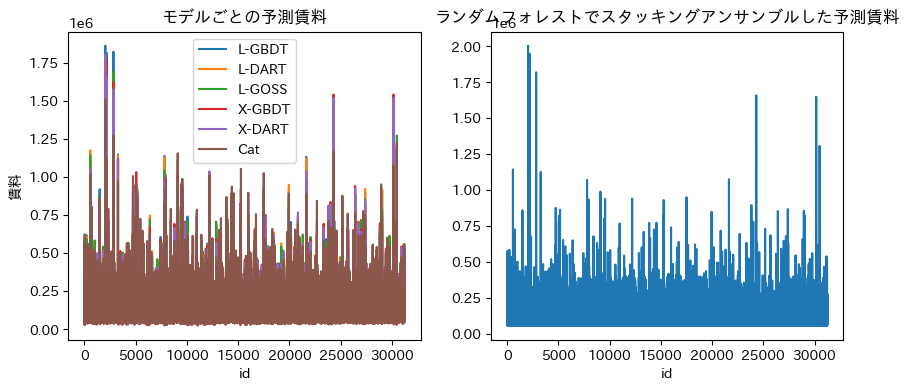

In [4]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(pred_LGBM_GBDT, label='L-GBDT')
ax.plot(pred_LGBM_DART, label='L-DART')
ax.plot(pred_LGBM_GOSS, label='L-GOSS')
ax.plot(pred_XGB_GBDT, label='X-GBDT')
ax.plot(pred_XGB_DART, label='X-DART')
ax.plot(pred_CatBoost, label='Cat')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()

### ブレンドモデルのチューニングを行う！

In [11]:
blend_X_train = pd.read_csv('../data/handmade_data/train_blend.csv')
y_train = pd.read_csv('../data/handmade_data/rent.csv')

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rmse_scores = []
blend_X_train['KFold'] = -1
#foldはvalidの対象となる値で０から４
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    blend_X_train.loc[valid_index,'KFold'] = fold_id
    y_train.loc[valid_index,'KFold'] = fold_id

def objective(trial):
    #foldはvalidの対象となる値で０から４
    for fold in range(5):
        X_tr = blend_X_train[blend_X_train['KFold']!=fold].drop('KFold',axis=1)
        X_val = blend_X_train[blend_X_train['KFold']==fold].drop('KFold',axis=1)
        y_tr = y_train[y_train['KFold']!=fold].drop('KFold',axis=1)
        y_val = y_train[y_train['KFold']==fold].drop('KFold',axis=1)

        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 1, 100),
            'max_depth': trial.suggest_int('max_depth', 1, 10),
            'n_jobs':-1,
            'random_state':0,
        }

        model = RandomForestRegressor(**params)
        model.fit(X_tr, y_tr)

        y_pred_val = model.predict(X_val)
        rmse_score = mean_squared_error(y_val, y_pred_val, squared=False)
    loss = np.mean(rmse_score)
    return loss

In [12]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)

[I 2022-09-18 20:29:34,958] A new study created in memory with name: no-name-e712a8f2-2459-48fe-a9ac-9d0d5847e2b0
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1423532010.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tr, y_tr)
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1423532010.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tr, y_tr)
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1423532010.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tr, y_tr)
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1423532010.py:29: DataConversionWarning

In [13]:
study.best_params

{'n_estimators': 184, 'max_leaf_nodes': 58, 'max_depth': 10}

このパラメータを使ってブレンドしてみる！！

In [14]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)

####GBDT###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GBDT = np.zeros(X_train.shape[0])
test_GBDT = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start GBDT training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GBDT[valid_index] = model_GBDT.predict(X_val)
    test_GBDT[:,fold_id] = model_GBDT.predict(X_test)

###DART###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'K',"S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2,area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'K','S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'K','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満']
valid_DART = np.zeros(X_train.shape[0])
test_DART = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start DART training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves': 111
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_DART[valid_index] = model_DART.predict(X_val)
    test_DART[:,fold_id] = model_DART.predict(X_test)

###GOSS###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GOSS = np.zeros(X_train.shape[0])
test_GOSS = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start GOSS training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 1.4135935551752292e-06,
        'max_bin': 528,
        'num_leaves': 91,
    }
    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GOSS[valid_index] = model_GOSS.predict(X_val)
    test_GOSS[:,fold_id] = model_GOSS.predict(X_test)

###XGBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_XGB = np.zeros(X_train.shape[0])
test_XGB = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB[valid_index] = xgb_reg.predict(X_val)
    test_XGB[:,fold_id] = xgb_reg.predict(X_test)

###CatBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_CatBoost = np.zeros(X_train.shape[0])
test_CatBoost = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start CatBoost training...')
    Cat_model = CatBoostRegressor(
                        loss_function='RMSE', 
                        iterations = 2000, 
                        early_stopping_rounds=10,
                        learning_rate=0.05, 
                        depth=7, 
                        l2_leaf_reg= 1.7538232373118053e-06, 
                        random_strength=26, 
                        bagging_temperature = 12.500712230836259,
                        od_type='Iter',
                        # od_wait = 10
    )
    train_pool = Pool(X_tr, label=y_tr, cat_features=category_lists)
    valid_pool = Pool(X_val, label=y_val, cat_features=category_lists)

    Cat_model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=10)
    valid_CatBoost[valid_index] = Cat_model.predict(X_val)
    test_CatBoost[:,fold_id] = Cat_model.predict(X_test)

valid_pred_GBDT = pd.DataFrame(valid_GBDT)
valid_pred_DART = pd.DataFrame(valid_DART)
valid_pred_GOSS = pd.DataFrame(valid_GOSS)
valid_pred_XGB = pd.DataFrame(valid_XGB)
valid_pred_CatBoost = pd.DataFrame(valid_CatBoost)
#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
blend_X_train = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB, valid_pred_CatBoost],axis=1)
blend_X_train.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測', 'CatBoostの予測']
blend_X_train.to_csv('../data/handmade_data/train_blend.csv',index=False)

# blend_model = lgb.LGBMRegressor()

pred_GBDT = test_GBDT.mean(axis=1)
pred_DART = test_DART.mean(axis=1)
pred_GOSS = test_GOSS.mean(axis=1)
pred_XGB = test_XGB.mean(axis=1)
pred_CatBoost = test_CatBoost.mean(axis=1)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)
pred_CatBoost = pd.DataFrame(pred_CatBoost)
#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB, pred_CatBoost], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

# ブレンドモデルが訓練した時のvalidのRMSE
# blend_model = lgb.LGBMRegressor(
#             objective='rmse', 
#             seed=0, 
#             num_threads=1, 
#             learning_rate=0.05,
#             reg_lambda= 2.7630799986965487e-05,
#             max_bin=392,
#             num_leaves=119,
#         )

blend_valid_rmses_list = []
blend_model = RandomForestRegressor(n_estimators=184, max_leaf_nodes=58, max_depth=10, n_jobs=-1, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    X_tr = blend_X_train.loc[train_index,:]
    X_val = blend_X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start blend training...')
    # blend_model.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], verbose=10)
    # xgbc2_params = {
    # # 'n_eetimators': 100, 
    # # 'max_depth': 5, 
    # # 'random_state': 42, 
    # 'objective':'reg:linear',
    # #学習のラウンド数 early_stoppingを利用するので多めに指定
    # 'n_estimators':50000,
    # #boosterに何を用いるか 初期値もgbtreeです
    # 'booster':'gbtree',
    # #学習率
    # 'learning_rate':0.05,
    # #木の最大深さ
    # 'max_depth':8,
    # #シード値
    # 'random_state':0,
    #     #正則化
    # 'reg_alfa':3.860866271460544e-06,

    # 'sub_sample':0.12885368066372738,

    # 'colsample_bytree':0.6439324290786468,

    # 'min_child_weight':0.0163345876110695
    # }
    # blend_model = xgboost.XGBRegressor(**xgbc2_params)
    # blend_model = LinearRegression()
    blend_model.fit(sX_tr, sy_tr)
    # blend_pred_y_val = blend_model.predict(sX_val)
    pred_y_val = blend_model.predict(X_val)
    # rmse = mean_squared_error(y_val, blend_pred_y_val, squared=False)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    
    blend_valid_rmses_list.append(rmse)

blend_valid_rmse = np.mean(blend_valid_rmses_list)
print("rmses of blend model",blend_valid_rmses_list)
print("the valid rmse of blend model",blend_valid_rmse)
#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(test_blend)
blend_pred = pd.DataFrame(blend_pred)

Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2693
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49211.8	valid_1's rmse: 45646.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 34954.8	valid_1's rmse: 31943.5
[30]	training's rmse: 26427	valid_1's rmse: 24708.3
[40]	training's rmse: 21128.6	valid_1's rmse: 20802.8
[50]	training's rmse: 17881.9	valid_1's rmse: 19072.3
[60]	training's rmse: 15937.5	valid_1's rmse: 18347.1
[70]	training's rmse: 14557.1	valid_1's rmse: 18204.8
Early stopping, best iteration is:
[69]	training's rmse: 14674.6	valid_1's rmse: 18202.2
Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118551.310354
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49568.4	valid_1's rmse: 46942.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35665.7	valid_1's rmse: 33218.4
[30]	training's rmse: 27497	valid_1's rmse: 25456.4
[40]	training's rmse: 22786.7	valid_1's rmse: 21666.8
[50]	training's rmse: 19880.4	valid_1's rmse: 19448
[60]	training's rmse: 18058.9	valid_1's rmse: 18413.5
[70]	training's rmse: 16712.5	valid_1's rmse: 17567.8
[80]	training's rmse: 15702.3	valid_1's rmse: 17172.9
[90]	training's rmse: 14848.6	valid_1's rmse: 16889.5
[100]	training's rmse: 14113.2	valid_1's rmse: 16688.1
[110]	training's rmse: 13543.8	valid_1's rmse: 16464.4
[120]	training's rmse: 13072.3	valid_1's rmse: 16325.8
[130]	training's rmse: 12623.7	valid_1's rmse: 16237.2
[140]	training's rmse: 12243.9	valid_1's rmse: 16202.3
[150]	training's rmse: 11860.5	valid_1's rmse: 16108.4
[160]	training's rmse: 11471.5	valid_1's rmse: 15990.7
[170]	training's rmse: 11137.1	valid_1's rmse: 15913.9
[180]	training's rmse: 10802.2	valid_1's rmse: 15869.3
[190]	training's rmse: 10525.9	valid_1's rmse: 15803.1
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35747	valid_1's rmse: 29566.1
[30]	training's rmse: 27482.2	valid_1's rmse: 22780.7
[40]	training's rmse: 22511	valid_1's rmse: 19042.2
[50]	training's rmse: 19490.7	valid_1's rmse: 17024.8
[60]	training's rmse: 17545.9	valid_1's rmse: 15726.8
[70]	training's rmse: 16234.2	valid_1's rmse: 14869.4
[80]	training's rmse: 15325.3	valid_1's rmse: 14377.6
[90]	training's rmse: 14526.1	valid_1's rmse: 13958.4
[100]	training's rmse: 13880.8	valid_1's rmse: 13710.5
[110]	training's rmse: 13323.7	valid_1's rmse: 13517.3
[120]	training's rmse: 12815.5	valid_1's rmse: 13409.8
[130]	training's rmse: 12345.5	valid_1's rmse: 13287.5
[140]	training's rmse: 11940.7	valid_1's rmse: 13194.5
[150]	training's rmse: 11553.7	valid_1's rmse: 13103.7
[160]	training's rmse: 11216.6	valid_1's rmse: 13032.9
[170]	training's rmse: 10894.8	valid_1's rmse: 12983.4
[180]	training's rmse: 10631.1	valid_1's rmse: 12937.6
[190]	training's rmse: 10357.2	valid_1's rmse: 12895.7
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35468.9	valid_1's rmse: 30704.9
[30]	training's rmse: 27106	valid_1's rmse: 23292
[40]	training's rmse: 22088.1	valid_1's rmse: 19289.3
[50]	training's rmse: 19096.9	valid_1's rmse: 17043.9
[60]	training's rmse: 17258.1	valid_1's rmse: 15859.6
[70]	training's rmse: 16002.3	valid_1's rmse: 15071.2
[80]	training's rmse: 15074.4	valid_1's rmse: 14639.3
[90]	training's rmse: 14336.5	valid_1's rmse: 14272.9
[100]	training's rmse: 13748.5	valid_1's rmse: 14102.4
[110]	training's rmse: 13278.2	valid_1's rmse: 13953.5
[120]	training's rmse: 12853.4	valid_1's rmse: 13837.6
[130]	training's rmse: 12469.7	valid_1's rmse: 13694
[140]	training's rmse: 12056.4	valid_1's rmse: 13599.6
[150]	training's rmse: 11700	valid_1's rmse: 13502.5
[160]	training's rmse: 11362.7	valid_1's rmse: 13394.8
[170]	training's rmse: 11033.6	valid_1's rmse: 13326.9
[180]	training's rmse: 10745.2	valid_1's rmse: 13253.6
[190]	training's rmse: 10445.8	valid_1's rmse: 13216.8
[200]	training's rmse: 101

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35330.6	valid_1's rmse: 36240.4
[30]	training's rmse: 27404.5	valid_1's rmse: 28076.5
[40]	training's rmse: 22731.8	valid_1's rmse: 23389.9
[50]	training's rmse: 19653.4	valid_1's rmse: 20318.6
[60]	training's rmse: 17623.1	valid_1's rmse: 18340.4
[70]	training's rmse: 16199.7	valid_1's rmse: 17142.9
[80]	training's rmse: 15220.5	valid_1's rmse: 16387.9
[90]	training's rmse: 14436.1	valid_1's rmse: 15845
[100]	training's rmse: 13829	valid_1's rmse: 15511
[110]	training's rmse: 13326.8	valid_1's rmse: 15214.3
[120]	training's rmse: 12882	valid_1's rmse: 15001.1
[130]	training's rmse: 12482.7	valid_1's rmse: 14845.9
[140]	training's rmse: 12110.1	valid_1's rmse: 14735.7
[150]	training's rmse: 11769.4	valid_1's rmse: 14560.1
[160]	training's rmse: 11464.2	valid_1's rmse: 14457.7
[170]	training's rmse: 11187.3	valid_1's rmse: 14379.5
[180]	training's rmse: 10906.7	valid_1's rmse: 14281.6
[190]	training's rmse: 10662.4	valid_1's rmse: 14211
[200]	training's rmse: 10423

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 37942.3	valid_1's rmse: 34348.3
[30]	training's rmse: 30545.3	valid_1's rmse: 27534
[40]	training's rmse: 27289.8	valid_1's rmse: 24796.2
[50]	training's rmse: 30878.3	valid_1's rmse: 28364.4
[60]	training's rmse: 35071.4	valid_1's rmse: 33155.2
[70]	training's rmse: 36988.5	valid_1's rmse: 35379.7
[80]	training's rmse: 31921.1	valid_1's rmse: 30456.8
[90]	training's rmse: 31760.3	valid_1's rmse: 30082
[100]	training's rmse: 33751.3	valid_1's rmse: 32439.8
[110]	training's rmse: 40641	valid_1's rmse: 39196.5
[120]	training's rmse: 32427.4	valid_1's rmse: 31352.7
[130]	training's rmse: 29140.5	valid_1's rmse: 28344.2
[140]	training's rmse: 32048.6	valid_1's rmse: 31396.4
[150]	training's rmse: 30527	valid_1's rmse: 29799.6
[160]	training's rmse: 35242.4	valid_1's rmse: 34356.7
[170]	training's rmse: 28541.9	valid_1's rmse: 28235.6
[180]	training's rmse: 27397.1	valid_1's rmse: 27223.4
[190]	training's rmse: 23366.8	valid_1's rmse: 23681.4
[200]	training's rmse: 223

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38571.7	valid_1's rmse: 35936.1
[30]	training's rmse: 31447.1	valid_1's rmse: 29379.6
[40]	training's rmse: 28531.6	valid_1's rmse: 26678.6
[50]	training's rmse: 31836.7	valid_1's rmse: 29989.2
[60]	training's rmse: 36046.5	valid_1's rmse: 34651.5
[70]	training's rmse: 37874.9	valid_1's rmse: 36583
[80]	training's rmse: 32996.1	valid_1's rmse: 31871.6
[90]	training's rmse: 32883.4	valid_1's rmse: 31585.4
[100]	training's rmse: 34881.1	valid_1's rmse: 33697.1
[110]	training's rmse: 41489.9	valid_1's rmse: 40177.9
[120]	training's rmse: 33585.2	valid_1's rmse: 32436.1
[130]	training's rmse: 30595.9	valid_1's rmse: 29582.8
[140]	training's rmse: 33330.2	valid_1's rmse: 32435.3
[150]	training's rmse: 31808.9	valid_1's rmse: 30852.9
[160]	training's rmse: 36367.2	valid_1's rmse: 35328.4
[170]	training's rmse: 29921.6	valid_1's rmse: 29211.6
[180]	training's rmse: 28777.9	valid_1's rmse: 28199.5
[190]	training's rmse: 24948.9	valid_1's rmse: 24602.7
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[30]	training's rmse: 31764.7	valid_1's rmse: 26104.9
[40]	training's rmse: 28702.2	valid_1's rmse: 23703.2
[50]	training's rmse: 32086.4	valid_1's rmse: 27112.4
[60]	training's rmse: 36181.4	valid_1's rmse: 32089.8
[70]	training's rmse: 37990.7	valid_1's rmse: 34107
[80]	training's rmse: 33203.5	valid_1's rmse: 29129.4
[90]	training's rmse: 33005.8	valid_1's rmse: 28823.4
[100]	training's rmse: 35042.3	valid_1's rmse: 31171.6
[110]	training's rmse: 41584.8	valid_1's rmse: 37860.3
[120]	training's rmse: 33568.7	valid_1's rmse: 30070.1
[130]	training's rmse: 30573.6	valid_1's rmse: 27085.4
[140]	training's rmse: 33286.4	valid_1's rmse: 30172.8
[150]	training's rmse: 31752.8	valid_1's rmse: 28616.2
[160]	training's rmse: 36348.6	valid_1's rmse: 33174.7
[170]	training's rmse: 29795.9	valid_1's rmse: 26937.9
[180]	training's rmse: 28636.8	valid_1's rmse: 25920.8
[190]	training's rmse: 24821.5	valid_1's rmse: 22417.3
[200]	training's rmse: 23883.6	valid_1's rmse: 21518.5
[210]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38753.5	valid_1's rmse: 33701.3
[30]	training's rmse: 31625.9	valid_1's rmse: 27114.6
[40]	training's rmse: 28575.5	valid_1's rmse: 24407.5
[50]	training's rmse: 31918.3	valid_1's rmse: 28023.7
[60]	training's rmse: 36008.7	valid_1's rmse: 32692.5
[70]	training's rmse: 37837.4	valid_1's rmse: 34831.8
[80]	training's rmse: 32947.9	valid_1's rmse: 29798.4
[90]	training's rmse: 32783.2	valid_1's rmse: 29444
[100]	training's rmse: 34814.7	valid_1's rmse: 31791.5
[110]	training's rmse: 41511.5	valid_1's rmse: 38583.6
[120]	training's rmse: 33465.3	valid_1's rmse: 30664.6
[130]	training's rmse: 30412.5	valid_1's rmse: 27568.7
[140]	training's rmse: 33147.9	valid_1's rmse: 30760.9
[150]	training's rmse: 31647.7	valid_1's rmse: 29165.3
[160]	training's rmse: 36269.6	valid_1's rmse: 33759.9
[170]	training's rmse: 29713.4	valid_1's rmse: 27560.8
[180]	training's rmse: 28590.4	valid_1's rmse: 26549.8
[190]	training's rmse: 24821.6	valid_1's rmse: 23056.6
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38054.3	valid_1's rmse: 40165
[30]	training's rmse: 31100.6	valid_1's rmse: 32914.9
[40]	training's rmse: 28149.3	valid_1's rmse: 30086.4
[50]	training's rmse: 31489.2	valid_1's rmse: 33472.2
[60]	training's rmse: 35667.5	valid_1's rmse: 37594.1
[70]	training's rmse: 37516.4	valid_1's rmse: 39357.4
[80]	training's rmse: 32625.4	valid_1's rmse: 34536.5
[90]	training's rmse: 32426.5	valid_1's rmse: 34571.8
[100]	training's rmse: 34441.5	valid_1's rmse: 36500.9
[110]	training's rmse: 41131.4	valid_1's rmse: 43213.7
[120]	training's rmse: 33175.9	valid_1's rmse: 35275
[130]	training's rmse: 30130.2	valid_1's rmse: 32375
[140]	training's rmse: 32869.5	valid_1's rmse: 35019.7
[150]	training's rmse: 31359.4	valid_1's rmse: 33652.1
[160]	training's rmse: 35932.5	valid_1's rmse: 38131.5
[170]	training's rmse: 29483.7	valid_1's rmse: 31765.9
[180]	training's rmse: 28406.6	valid_1's rmse: 30736.9
[190]	training's rmse: 24667.7	valid_1's rmse: 27028.5
[200]	training's rmse: 2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 21513.1	valid_1's rmse: 20814.8
[50]	training's rmse: 18742.2	valid_1's rmse: 18894.4
[60]	training's rmse: 16973.1	valid_1's rmse: 17840.2
[70]	training's rmse: 15870.2	valid_1's rmse: 17267
[80]	training's rmse: 15026.7	valid_1's rmse: 17024.5
[90]	training's rmse: 14295.4	valid_1's rmse: 16807.8
[100]	training's rmse: 13754.5	valid_1's rmse: 16632.5
[110]	training's rmse: 13241.3	valid_1's rmse: 16568.2
[120]	training's rmse: 12831	valid_1's rmse: 16478.2
[130]	training's rmse: 12438.4	valid_1's rmse: 16460.1
Early stopping, best iteration is:
[127]	training's rmse: 12563.3	valid_1's rmse: 16444.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 22658, number of used feat

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 22904.7	valid_1's rmse: 21210.8
[50]	training's rmse: 20320.6	valid_1's rmse: 19192.6
[60]	training's rmse: 18618.6	valid_1's rmse: 18197.3
[70]	training's rmse: 17419.8	valid_1's rmse: 17592.2
[80]	training's rmse: 16546.6	valid_1's rmse: 17194.2
[90]	training's rmse: 15859.8	valid_1's rmse: 17099.6
[100]	training's rmse: 15347.4	valid_1's rmse: 17073.4
[110]	training's rmse: 14885.4	valid_1's rmse: 16935.7
[120]	training's rmse: 14449.6	valid_1's rmse: 16868.8
[130]	training's rmse: 13996.5	valid_1's rmse: 16747.6
[140]	training's rmse: 13606.1	valid_1's rmse: 16677.7
[150]	training's rmse: 13246.4	valid_1's rmse: 16589.8
[160]	training's rmse: 12947	valid_1's rmse: 16609.7
Early stopping, best iteration is:
[151]	training's rmse: 13215	valid_1's rmse: 16573.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 23131.3	valid_1's rmse: 19141
[50]	training's rmse: 20256	valid_1's rmse: 17294.3
[60]	training's rmse: 18349.1	valid_1's rmse: 16353.8
[70]	training's rmse: 17179	valid_1's rmse: 15790.2
[80]	training's rmse: 16261.9	valid_1's rmse: 15345.9
[90]	training's rmse: 15520.4	valid_1's rmse: 15087.7
[100]	training's rmse: 14904.1	valid_1's rmse: 14881.5
[110]	training's rmse: 14427.6	valid_1's rmse: 14689.5
[120]	training's rmse: 13987.4	valid_1's rmse: 14486.4
[130]	training's rmse: 13580.4	valid_1's rmse: 14339.5
[140]	training's rmse: 13195.9	valid_1's rmse: 14157.1
[150]	training's rmse: 12852.4	valid_1's rmse: 13958.7
[160]	training's rmse: 12541.3	valid_1's rmse: 13799.9
[170]	training's rmse: 12238.4	valid_1's rmse: 13682
[180]	training's rmse: 11951.4	valid_1's rmse: 13598.8
[190]	training's rmse: 11686.2	valid_1's rmse: 13525.8
[200]	training's rmse: 11451.9	valid_1's rmse: 13429
[210]	training's rmse: 11237.7	valid_1's rmse: 13377.4
[220]	training's rmse: 110

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 22796.3	valid_1's rmse: 19254.2
[50]	training's rmse: 20120.5	valid_1's rmse: 16951.2
[60]	training's rmse: 18424.4	valid_1's rmse: 15627.7
[70]	training's rmse: 17192.5	valid_1's rmse: 14836
[80]	training's rmse: 16320.8	valid_1's rmse: 14371.3
[90]	training's rmse: 15621.5	valid_1's rmse: 14071.8
[100]	training's rmse: 15058.2	valid_1's rmse: 13877.1
[110]	training's rmse: 14561.6	valid_1's rmse: 13673.8
[120]	training's rmse: 14137.3	valid_1's rmse: 13506.8
[130]	training's rmse: 13785	valid_1's rmse: 13393.1
[140]	training's rmse: 13447.4	valid_1's rmse: 13260.1
[150]	training's rmse: 13083.6	valid_1's rmse: 13116.3
[160]	training's rmse: 12773.8	valid_1's rmse: 13000.1
[170]	training's rmse: 12445.1	valid_1's rmse: 12903
[180]	training's rmse: 12172.6	valid_1's rmse: 12803.2
[190]	training's rmse: 11916.7	valid_1's rmse: 12728.6
[200]	training's rmse: 11682.8	valid_1's rmse: 12651.1
[210]	training's rmse: 11494.5	valid_1's rmse: 12599.5
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 27426.2	valid_1's rmse: 28476.6
[40]	training's rmse: 23198.4	valid_1's rmse: 24136
[50]	training's rmse: 20497.4	valid_1's rmse: 21497.8
[60]	training's rmse: 18846.9	valid_1's rmse: 19905.5
[70]	training's rmse: 17677.3	valid_1's rmse: 19021.9
[80]	training's rmse: 16788.4	valid_1's rmse: 18398.9
[90]	training's rmse: 16086.3	valid_1's rmse: 17900.3
[100]	training's rmse: 15435.7	valid_1's rmse: 17545.5
[110]	training's rmse: 14969.2	valid_1's rmse: 17283.3
[120]	training's rmse: 14558.1	valid_1's rmse: 17124.4
[130]	training's rmse: 14152.5	valid_1's rmse: 16956.7
[140]	training's rmse: 13793.7	valid_1's rmse: 16859.1
[150]	training's rmse: 13511.7	valid_1's rmse: 16732.1
[160]	training's rmse: 13192.6	valid_1's rmse: 16729.4
[170]	training's rmse: 12903.5	valid_1's rmse: 16676.2
[180]	training's rmse: 12656.8	valid_1's rmse: 16607.3
[190]	training's rmse: 12400.1	valid_1's rmse: 16497.6
[200]	training's rmse: 12167.2	valid_1's rmse: 16438.5
[210]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:71160.91364
[14]	validation_0-rmse:67965.26078
[15]	validation_0-rmse:64889.57935
[16]	validation_0-rmse:62014.77492
[17]	validation_0-rmse:59272.15138
[18]	validation_0-rmse:56745.18122
[19]	validation_0-rmse:54318.36965
[20]	validation_0-rmse:52019.36907
[21]	validation_0-rmse:49919.47741
[22]	validation_0-rmse:47929.00049
[23]	validation_0-rmse:45975.67710
[24]	validation_0-rmse:44251.52453
[25]	validation_0-rmse:42520.05092
[26]	validation_0-rmse:40932.36994
[27]	validation_0-rmse:39408.96326
[28]	validation_0-rmse:37996.93047
[29]	validation_0-rmse:36622.10137
[30]	validation_0-rmse:35442.54615
[31]	validation_0-rmse:34274.65226
[32]	validation_0-rmse:33191.80091
[33]	validation_0-rmse:32197.96179
[34]	validation_0-rmse:31213.88322
[35]	validation_0-rmse:30342.24438
[36]	validation_0-rmse:29451.08388
[37]	validation_0-rmse:28681.51472
[38]	validation_0-rmse:27916.53932
[39]	validation_0-rmse:27239.33404
[40]	validation_0-rmse:26629.41901
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:67978.92551
[15]	validation_0-rmse:64995.64343
[16]	validation_0-rmse:62128.78978
[17]	validation_0-rmse:59485.18713
[18]	validation_0-rmse:57013.83079
[19]	validation_0-rmse:54649.00250
[20]	validation_0-rmse:52389.13229
[21]	validation_0-rmse:50189.57351
[22]	validation_0-rmse:48179.48923
[23]	validation_0-rmse:46278.00288
[24]	validation_0-rmse:44552.82190
[25]	validation_0-rmse:42843.35506
[26]	validation_0-rmse:41352.00129
[27]	validation_0-rmse:39890.15149
[28]	validation_0-rmse:38483.98826
[29]	validation_0-rmse:37025.24186
[30]	validation_0-rmse:35832.53933
[31]	validation_0-rmse:34625.99270
[32]	validation_0-rmse:33527.39293
[33]	validation_0-rmse:32517.45756
[34]	validation_0-rmse:31576.39037
[35]	validation_0-rmse:30730.98186
[36]	validation_0-rmse:29820.20187
[37]	validation_0-rmse:28972.27789
[38]	validation_0-rmse:28084.70979
[39]	validation_0-rmse:27443.51048
[40]	validation_0-rmse:26843.41409
[41]	validation_0-rmse:26157.55691
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:67754.62988
[14]	validation_0-rmse:64747.73132
[15]	validation_0-rmse:61858.38993
[16]	validation_0-rmse:59112.23348
[17]	validation_0-rmse:56510.15258
[18]	validation_0-rmse:54113.22202
[19]	validation_0-rmse:51763.85051
[20]	validation_0-rmse:49530.35811
[21]	validation_0-rmse:47492.55065
[22]	validation_0-rmse:45525.05804
[23]	validation_0-rmse:43653.51991
[24]	validation_0-rmse:41984.12137
[25]	validation_0-rmse:40297.23230
[26]	validation_0-rmse:38806.81948
[27]	validation_0-rmse:37366.70050
[28]	validation_0-rmse:36014.75696
[29]	validation_0-rmse:34701.34406
[30]	validation_0-rmse:33522.73666
[31]	validation_0-rmse:32348.43526
[32]	validation_0-rmse:31294.55013
[33]	validation_0-rmse:30348.47922
[34]	validation_0-rmse:29436.13847
[35]	validation_0-rmse:28575.27007
[36]	validation_0-rmse:27707.84872
[37]	validation_0-rmse:26961.68122
[38]	validation_0-rmse:26169.32581
[39]	validation_0-rmse:25554.27972
[40]	validation_0-rmse:24937.44920
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:66715.70816
[15]	validation_0-rmse:63686.61041
[16]	validation_0-rmse:60818.42135
[17]	validation_0-rmse:58124.22230
[18]	validation_0-rmse:55739.51177
[19]	validation_0-rmse:53369.79827
[20]	validation_0-rmse:51066.62049
[21]	validation_0-rmse:48964.13358
[22]	validation_0-rmse:46947.05423
[23]	validation_0-rmse:45105.97851
[24]	validation_0-rmse:43390.12790
[25]	validation_0-rmse:41756.53556
[26]	validation_0-rmse:40225.73914
[27]	validation_0-rmse:38718.35103
[28]	validation_0-rmse:37297.41229
[29]	validation_0-rmse:35957.66471
[30]	validation_0-rmse:34774.10283
[31]	validation_0-rmse:33607.19844
[32]	validation_0-rmse:32516.56777
[33]	validation_0-rmse:31471.49356
[34]	validation_0-rmse:30508.46789
[35]	validation_0-rmse:29647.79560
[36]	validation_0-rmse:28755.33539
[37]	validation_0-rmse:27941.31386
[38]	validation_0-rmse:27143.69752
[39]	validation_0-rmse:26504.51840
[40]	validation_0-rmse:25884.94622
[41]	validation_0-rmse:25245.80420
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:74899.96157
[14]	validation_0-rmse:71826.04447
[15]	validation_0-rmse:68806.83605
[16]	validation_0-rmse:65941.51293
[17]	validation_0-rmse:63253.65826
[18]	validation_0-rmse:60822.79989
[19]	validation_0-rmse:58369.64422
[20]	validation_0-rmse:56110.77648
[21]	validation_0-rmse:54007.77824
[22]	validation_0-rmse:52123.76794
[23]	validation_0-rmse:50309.41892
[24]	validation_0-rmse:48613.97386
[25]	validation_0-rmse:46957.20117
[26]	validation_0-rmse:45425.72178
[27]	validation_0-rmse:43990.32380
[28]	validation_0-rmse:42600.88323
[29]	validation_0-rmse:41244.18145
[30]	validation_0-rmse:40081.28388
[31]	validation_0-rmse:38877.53135
[32]	validation_0-rmse:37801.06791
[33]	validation_0-rmse:36824.98554
[34]	validation_0-rmse:35905.09002
[35]	validation_0-rmse:35080.70832
[36]	validation_0-rmse:34203.80376
[37]	validation_0-rmse:33396.86194
[38]	validation_0-rmse:32595.11106
[39]	validation_0-rmse:31977.40650
[40]	validation_0-rmse:31396.70638
[41]	validation_0-rm

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1379147533.py:274: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1379147533.py:274: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1379147533.py:274: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1379147533.py:274: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


Start blend training...


/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1379/1379147533.py:274: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(sX_tr, sy_tr)


rmses of blend model [18121.70892621136, 17714.287903871093, 16456.731297085847, 21064.12891916067, 14794.971171751307]
the valid rmse of blend model 17630.36564361606


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


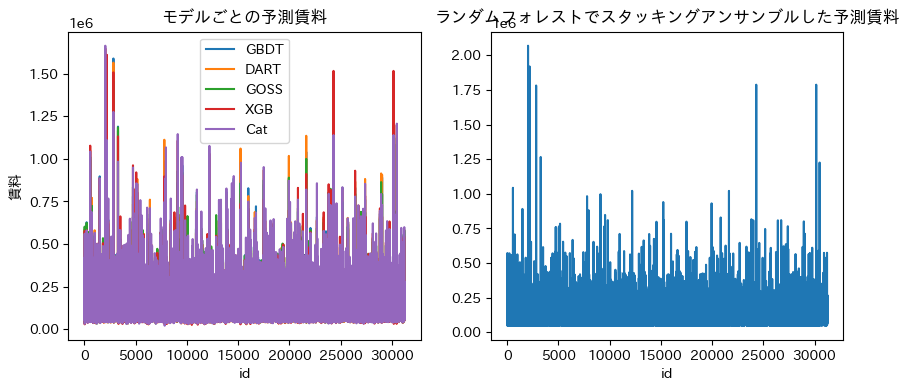

In [15]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(pred_GBDT, label='GBDT')
ax.plot(pred_DART, label='DART')
ax.plot(pred_GOSS, label='GOSS')
ax.plot(pred_XGB, label='XGB')
ax.plot(pred_CatBoost, label='Cat')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()

ランダムフォレストでのブレンドはなかなか精度がでない・・・

GBDTをブレンドのモデルに使うのはどうか！？まずはチューニング！

In [22]:
blend_X_train = pd.read_csv('../data/handmade_data/train_blend.csv')
y_train = pd.read_csv('../data/handmade_data/rent.csv')

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rmse_scores = []
blend_X_train['KFold'] = -1
#foldはvalidの対象となる値で０から４
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    blend_X_train.loc[valid_index,'KFold'] = fold_id
    y_train.loc[valid_index,'KFold'] = fold_id

def objective(trial):
    #foldはvalidの対象となる値で０から４
    for fold in range(5):
        X_tr = blend_X_train[blend_X_train['KFold']!=fold].drop('KFold',axis=1)
        X_val = blend_X_train[blend_X_train['KFold']==fold].drop('KFold',axis=1)
        y_tr = y_train[y_train['KFold']!=fold].drop('KFold',axis=1)
        y_val = y_train[y_train['KFold']==fold].drop('KFold',axis=1)

        lgb_train = lgb.Dataset(X_tr, y_tr)
        lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
        params = {
            'objective':'regression',
            'metrics':'rmse',
            'learning_rate':0.05,
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0000001, 0.0001, log=True),
            'max_bin': trial.suggest_int('max_bin', 255, 600),
            'num_leaves': trial.suggest_int('num_leaves', 50, 128),
        }

        model = lgb.train(
                            params,
                            lgb_train, 
                            valid_sets=[lgb_train, lgb_eval], 
                            verbose_eval=10, 
                            num_boost_round=1000, 
                            early_stopping_rounds=10,
                            )

        y_pred_val = model.predict(X_val)
        rmse_score = mean_squared_error(y_val, y_pred_val, squared=False)
    loss = np.mean(rmse_score)
    return loss

In [23]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)

[I 2022-09-18 20:58:20,903] A new study created in memory with name: no-name-7614a34b-35e9-4ede-a3d0-1d5d2181d013
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46301.3	valid_1's rmse: 49866.4
[20]	training's rmse: 30884.1	valid_1's rmse: 37534.7
[30]	training's rmse: 22815.5	valid_1's rmse: 31747.3
[40]	training's rmse: 19006.7	valid_1's rmse: 29272.9
[50]	training's rmse: 17366.7	valid_1's rmse: 28240.7
[60]	training's rmse: 16668.5	valid_1's rmse: 27816.2
[70]	training's rmse: 16350	valid_1's rmse: 27638.4
[80]	training's rmse: 16179.7	valid_1's rmse: 27565.1
[90]	training's rmse: 16071.2	valid_1's rmse: 27537.3
[100]	training's rmse: 15981	valid_1's rmse: 27542.9
Early stopping, best iteration is:
[91]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32419.8	valid_1's rmse: 33073.4
[30]	training's rmse: 25053.3	valid_1's rmse: 25301.2
[40]	training's rmse: 21704.4	valid_1's rmse: 21578.7
[50]	training's rmse: 20280.5	valid_1's rmse: 19833.6
[60]	training's rmse: 19671.1	valid_1's rmse: 19033.6
[70]	training's rmse: 19376.4	valid_1's rmse: 18666.7
[80]	training's rmse: 19201	valid_1's rmse: 18470.8
[90]	training's rmse: 19088.1	valid_1's rmse: 18383.1
[100]	training's rmse: 19006	valid_1's rmse: 18339.6
[110]	training's rmse: 18923.7	valid_1's rmse: 18348.9
Early stopping, best iteration is:
[104]	training's rmse: 18970.6	valid_1's rmse: 18339.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info]

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32797.7	valid_1's rmse: 29498.7
[30]	training's rmse: 25596	valid_1's rmse: 21572.4
[40]	training's rmse: 22361.2	valid_1's rmse: 18319.4
[50]	training's rmse: 21015.6	valid_1's rmse: 17317.9
[60]	training's rmse: 20439.1	valid_1's rmse: 17117.9
[70]	training's rmse: 20167.5	valid_1's rmse: 17143.3
Early stopping, best iteration is:
[63]	training's rmse: 20336.4	valid_1's rmse: 17109.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47517.7	valid_1's rmse: 44436


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32766	valid_1's rmse: 29866.2
[30]	training's rmse: 25321.1	valid_1's rmse: 22623.3
[40]	training's rmse: 21939	valid_1's rmse: 19612
[50]	training's rmse: 20497.9	valid_1's rmse: 18544.4
[60]	training's rmse: 19876.2	valid_1's rmse: 18249.2
[70]	training's rmse: 19583.3	valid_1's rmse: 18239
Early stopping, best iteration is:
[65]	training's rmse: 19704.9	valid_1's rmse: 18228.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46800.9	valid_1's rmse: 48429.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32328.9	valid_1's rmse: 33230
[30]	training's rmse: 25085.3	valid_1's rmse: 25612.9
[40]	training's rmse: 21817.3	valid_1's rmse: 22236.1
[50]	training's rmse: 20431.2	valid_1's rmse: 20910.7
[60]	training's rmse: 19845.8	valid_1's rmse: 20440.1
[70]	training's rmse: 19561.8	valid_1's rmse: 20279.4


[I 2022-09-18 20:58:23,605] Trial 0 finished with value: 20235.10493717724 and parameters: {'reg_lambda': 4.430375245218262e-06, 'max_bin': 502, 'num_leaves': 97}. Best is trial 0 with value: 20235.10493717724.


[80]	training's rmse: 19398.8	valid_1's rmse: 20235.5
Early stopping, best iteration is:
[79]	training's rmse: 19413.6	valid_1's rmse: 20235.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46565.1	valid_1's rmse: 50241.4
[20]	training's rmse: 31438.7	valid_1's rmse: 38163.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 23680.8	valid_1's rmse: 32485.9
[40]	training's rmse: 20096.8	valid_1's rmse: 30052
[50]	training's rmse: 18571.1	valid_1's rmse: 29050.8
[60]	training's rmse: 17939.2	valid_1's rmse: 28650.3
[70]	training's rmse: 17658.1	valid_1's rmse: 28487.5
[80]	training's rmse: 17512.5	valid_1's rmse: 28426.3
[90]	training's rmse: 17418.5	valid_1's rmse: 28397.3
[100]	training's rmse: 17346	valid_1's rmse: 28397.8
Early stopping, best iteration is:
[97]	training's rmse: 17366.4	valid_1's rmse: 28394.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47295.9	valid_1's rmse: 47770.1
[20]	training's rmse: 32883.7	valid_1's rmse: 33265.6
[30]	training's rmse: 25706.1	valid_1's rmse: 25814.6
[40]	training's rmse: 22490.4	valid_1's rmse: 22298.6
[50]	training's rmse: 21149.5	valid_1's rmse: 20721.1
[60]	training's rmse: 20588.3	valid_1's rmse: 20032.8
[70]	training's rmse: 20315.3	valid_1's rmse: 19712.9
[80]	training's rmse: 20165.2	valid_1's rmse: 19559.4
[90]	training's rmse: 20053.2	valid_1's rmse: 19483.8
[100]	training's rmse: 19970.6	valid_1's rmse: 19457.7
[110]	training's rmse: 19902	valid_1's rmse: 19443.2
[120]	training's rmse: 19845.2	valid_1's rmse: 19447.5
Early stopping, best iteration is:
[113]	training's rmse: 19885.8	valid_1's rmse: 19438.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26299.5	valid_1's rmse: 21816
[40]	training's rmse: 23203.4	valid_1's rmse: 18788.1
[50]	training's rmse: 21920.2	valid_1's rmse: 17931.3
[60]	training's rmse: 21372	valid_1's rmse: 17835.7
Early stopping, best iteration is:
[56]	training's rmse: 21537	valid_1's rmse: 17828.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47864	valid_1's rmse: 45029.1
[20]	training's rmse: 33379.5	valid_1's rmse: 30628.4
[30]	training's rmse: 26182.4	valid_1's rmse: 23435.9
[40]	training's rmse: 22982.4	valid_1's rmse: 20231.2
[50]	training's rmse: 21644.3	valid_1's rmse: 19014
[60]	training's rmse: 21073.3	valid_1's rmse: 18597.1
[70]	training's rmse: 20806.6	valid_1's rmse: 18471.5
[80]	training's rmse: 20661.2	valid_1's rmse: 18445.8
[90]	training's rmse: 20569.1	valid_1's rmse: 18451.6
Early stopping, best iteration is:
[81]	training's rmse: 20649.9	valid_1's rmse: 18444.3
[LightGBM] [Warning

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46969.1	valid_1's rmse: 48799.5
[20]	training's rmse: 32687.4	valid_1's rmse: 33897.6
[30]	training's rmse: 25592.8	valid_1's rmse: 26515.2
[40]	training's rmse: 22429.7	valid_1's rmse: 23303.3
[50]	training's rmse: 21110.7	valid_1's rmse: 22050.7


[I 2022-09-18 20:58:25,957] Trial 1 finished with value: 21367.77298519892 and parameters: {'reg_lambda': 4.311710058685494e-06, 'max_bin': 401, 'num_leaves': 101}. Best is trial 0 with value: 20235.10493717724.


[60]	training's rmse: 20554.4	valid_1's rmse: 21583.8
[70]	training's rmse: 20296.2	valid_1's rmse: 21423.6
[80]	training's rmse: 20149.7	valid_1's rmse: 21374.1
[90]	training's rmse: 20043.9	valid_1's rmse: 21372.5
Early stopping, best iteration is:
[88]	training's rmse: 20065.1	valid_1's rmse: 21367.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46255.9	valid_1's rmse: 49899.7
[20]	training's rmse: 30766.6	valid_1's rmse: 37608.7
[30]	training's rmse: 22657.2	valid_1's rmse: 31862.7
[40]	training's rmse: 18801.4	valid_1's rmse: 29372.5
[50]	training's rmse: 17110	valid_1's rmse: 28331.6
[60]	training's rmse: 16378.9	valid_1's rmse: 27886
[70]	training's rmse: 16033.9	valid_1's rmse: 27689.7
[80]	training's rmse: 15842.3	valid_1's rmse: 27598.1
[90]	training's rmse: 15719.2	valid_1's rmse: 27569.7
[100]	training's rmse: 15618.9	valid_1's rmse: 27553.4
[110]	training's rmse: 15539.6	valid_1's rmse: 27561.2
Early stopping, best iteration is:
[101]	training's rmse: 15610.8	valid_1's rmse: 27550.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start tra

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46934.6	valid_1's rmse: 47680.5
[20]	training's rmse: 32172.4	valid_1's rmse: 32919.4
[30]	training's rmse: 24693.2	valid_1's rmse: 25188.1
[40]	training's rmse: 21260.6	valid_1's rmse: 21415.8
[50]	training's rmse: 19786.4	valid_1's rmse: 19648.9
[60]	training's rmse: 19150.5	valid_1's rmse: 18841.8
[70]	training's rmse: 18842.9	valid_1's rmse: 18475.2
[80]	training's rmse: 18659.8	valid_1's rmse: 18293.3
[90]	training's rmse: 18533.6	valid_1's rmse: 18221.4
[100]	training's rmse: 18428.5	valid_1's rmse: 18190
[110]	training's rmse: 18338.4	valid_1's rmse: 18205.8
Early stopping, best iteration is:
[104]	training's rmse: 18390.2	valid_1's rmse: 18185
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start tra

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32511.6	valid_1's rmse: 28813.8
[30]	training's rmse: 25164.5	valid_1's rmse: 20720.1
[40]	training's rmse: 21822.7	valid_1's rmse: 17394.9
[50]	training's rmse: 20401.6	valid_1's rmse: 16400
[60]	training's rmse: 19778.4	valid_1's rmse: 16240.5
Early stopping, best iteration is:
[58]	training's rmse: 19868.9	valid_1's rmse: 16228.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47438.1	valid_1's rmse: 44478.7
[20]	training's rmse: 32504.6	valid_1's rmse: 29793.4
[30]	training's rmse: 24926.4	valid_1's rmse: 22465.7
[40]	training's rmse: 21450	valid_1's rmse: 19376.1
[50]	training's rmse: 19947.4	valid_1's rmse: 18311
[60]	training's rmse: 19284.9	valid_1's rmse: 18032.6
[70]	training's rmse: 18964.4	valid_1's rmse: 18027.2
Early stopping, best iteration is:
[63]	training's rmse: 19165.3	valid_1's rmse: 18007
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46599.8	valid_1's rmse: 47982.9
[20]	training's rmse: 32013.6	valid_1's rmse: 32708.9
[30]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 19865.4	valid_1's rmse: 20129.4
[60]	training's rmse: 19244.3	valid_1's rmse: 19581.5
[70]	training's rmse: 18944.1	valid_1's rmse: 19362.9
[80]	training's rmse: 18773.1	valid_1's rmse: 19289.7
[90]	training's rmse: 18645.2	valid_1's rmse: 19267.4


[I 2022-09-18 20:58:29,016] Trial 2 finished with value: 19257.606250971676 and parameters: {'reg_lambda': 2.054762512591133e-06, 'max_bin': 563, 'num_leaves': 126}. Best is trial 2 with value: 19257.606250971676.


[100]	training's rmse: 18550.1	valid_1's rmse: 19266.1
[110]	training's rmse: 18467.6	valid_1's rmse: 19263.4
Early stopping, best iteration is:
[106]	training's rmse: 18498.6	valid_1's rmse: 19257.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46311.8	valid_1's rmse: 49953.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 30874.8	valid_1's rmse: 37604.1
[30]	training's rmse: 22795.2	valid_1's rmse: 31797.9
[40]	training's rmse: 18972.4	valid_1's rmse: 29266.4
[50]	training's rmse: 17313.1	valid_1's rmse: 28208
[60]	training's rmse: 16600.9	valid_1's rmse: 27761.3
[70]	training's rmse: 16272.6	valid_1's rmse: 27585.2
[80]	training's rmse: 16094.9	valid_1's rmse: 27511.1
[90]	training's rmse: 15982.8	valid_1's rmse: 27487.1
[100]	training's rmse: 15894.9	valid_1's rmse: 27489.5
Early stopping, best iteration is:
[95]	training's rmse: 15938.9	valid_1's rmse: 27476.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32318	valid_1's rmse: 33054.1
[30]	training's rmse: 24880.6	valid_1's rmse: 25315.3
[40]	training's rmse: 21488.2	valid_1's rmse: 21606.3
[50]	training's rmse: 20039.3	valid_1's rmse: 19940
[60]	training's rmse: 19404.8	valid_1's rmse: 19199.2
[70]	training's rmse: 19108.9	valid_1's rmse: 18876.3
[80]	training's rmse: 18932.7	valid_1's rmse: 18732.6
[90]	training's rmse: 18807.9	valid_1's rmse: 18666.7
[100]	training's rmse: 18711.6	valid_1's rmse: 18648.6
Early stopping, best iteration is:
[97]	training's rmse: 18740	valid_1's rmse: 18642.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until va

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47195.3	valid_1's rmse: 45268.1
[20]	training's rmse: 32702.9	valid_1's rmse: 29491.6
[30]	training's rmse: 25453	valid_1's rmse: 21890.2
[40]	training's rmse: 22200.6	valid_1's rmse: 18790.8
[50]	training's rmse: 20831.4	valid_1's rmse: 17879.8
[60]	training's rmse: 20244	valid_1's rmse: 17762.6
Early stopping, best iteration is:
[58]	training's rmse: 20327.5	valid_1's rmse: 17753.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47468.1	valid_1's rmse: 44508.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32648.8	valid_1's rmse: 29915.3
[30]	training's rmse: 25156.9	valid_1's rmse: 22667.1
[40]	training's rmse: 21764.7	valid_1's rmse: 19546.4
[50]	training's rmse: 20318	valid_1's rmse: 18429.7
[60]	training's rmse: 19701	valid_1's rmse: 18113.1
[70]	training's rmse: 19401.5	valid_1's rmse: 18062.6
[80]	training's rmse: 19236.3	valid_1's rmse: 18109.8
Early stopping, best iteration is:
[70]	training's rmse: 19401.5	valid_1's rmse: 18062.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46671.5	valid_1's rmse: 48127.6
[20]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24833.3	valid_1's rmse: 25164.4
[40]	training's rmse: 21536.7	valid_1's rmse: 21806.6
[50]	training's rmse: 20133.8	valid_1's rmse: 20476.7
[60]	training's rmse: 19534	valid_1's rmse: 19996.3
[70]	training's rmse: 19260.5	valid_1's rmse: 19841.1


[I 2022-09-18 20:58:31,226] Trial 3 finished with value: 19783.954509225816 and parameters: {'reg_lambda': 1.4135935551752292e-06, 'max_bin': 528, 'num_leaves': 91}. Best is trial 2 with value: 19257.606250971676.


[80]	training's rmse: 19099.1	valid_1's rmse: 19791.6
[90]	training's rmse: 18987.8	valid_1's rmse: 19788.7
Early stopping, best iteration is:
[84]	training's rmse: 19050.6	valid_1's rmse: 19784
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46316.7	valid_1's rmse: 50031.6
[20]	training's rmse: 30887.7	valid_1's rmse: 37585.2
[30]	training's rmse: 22837.5	valid_1's rmse: 31656.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 19046.6	valid_1's rmse: 29026.7
[50]	training's rmse: 17409.4	valid_1's rmse: 27894.5
[60]	training's rmse: 16719	valid_1's rmse: 27399.2
[70]	training's rmse: 16397.6	valid_1's rmse: 27160.9
[80]	training's rmse: 16233.4	valid_1's rmse: 27060.5
[90]	training's rmse: 16130.8	valid_1's rmse: 27010.5
[100]	training's rmse: 16055.5	valid_1's rmse: 27002.5
[110]	training's rmse: 15993.8	valid_1's rmse: 27004.5
Early stopping, best iteration is:
[101]	training's rmse: 16049.3	valid_1's rmse: 26999.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46978.7	valid_1's rmse: 47647
[20]	training's rmse: 32260.7	valid_1's rmse: 32956.7
[30]	training's rmse: 24841.2	valid_1's rmse: 25173.5
[40]	training's rmse: 21471.7	valid_1's rmse: 21392.6
[50]	training's rmse: 20043.2	valid_1's rmse: 19621.4
[60]	training's rmse: 19435.2	valid_1's rmse: 18789.4
[70]	training's rmse: 19141.7	valid_1's rmse: 18391.1
[80]	training's rmse: 18984.1	valid_1's rmse: 18203.7
[90]	training's rmse: 18885.1	valid_1's rmse: 18114.7
[100]	training's rmse: 18815.6	valid_1's rmse: 18093.1
[110]	training's rmse: 18746.3	valid_1's rmse: 1809

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[20]	training's rmse: 32514.6	valid_1's rmse: 28871.5
[30]	training's rmse: 25177.5	valid_1's rmse: 20828.6
[40]	training's rmse: 21872.8	valid_1's rmse: 17609.7
[50]	training's rmse: 20467.4	valid_1's rmse: 16661.1
[60]	training's rmse: 19876.4	valid_1's rmse: 16513.1
[70]	training's rmse: 19604.9	valid_1's rmse: 16599.9
Early stopping, best iteration is:
[60]	training's rmse: 19876.4	valid_1's rmse: 16513.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47512.1	valid_1's rmse: 44553.2
[20]	training's rmse: 32641.7	valid_1's rmse: 29809.6
[30]	training's rmse: 25114.5	valid_1's rmse: 22445.5
[40]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32042.1	valid_1's rmse: 32740.8
[30]	training's rmse: 24689.9	valid_1's rmse: 24876.9
[40]	training's rmse: 21358.6	valid_1's rmse: 21283.5
[50]	training's rmse: 19944.8	valid_1's rmse: 19760.4
[60]	training's rmse: 19345.2	valid_1's rmse: 19136.8
[70]	training's rmse: 19068.4	valid_1's rmse: 18870.1


[I 2022-09-18 20:58:32,721] Trial 4 finished with value: 18681.248136635342 and parameters: {'reg_lambda': 5.059803874660429e-06, 'max_bin': 575, 'num_leaves': 55}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 18913.7	valid_1's rmse: 18749.4
[90]	training's rmse: 18814.4	valid_1's rmse: 18709.9
[100]	training's rmse: 18741.2	valid_1's rmse: 18689.1
[110]	training's rmse: 18669.3	valid_1's rmse: 18683.9
Early stopping, best iteration is:
[106]	training's rmse: 18696	valid_1's rmse: 18681.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47044.7	valid_1's rmse: 50304.3
[20]	training's rmse: 32355.9	valid_1's rmse: 38509.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24960.1	valid_1's rmse: 33198.9
[40]	training's rmse: 21614.9	valid_1's rmse: 31018.2
[50]	training's rmse: 20217.5	valid_1's rmse: 30179.4
[60]	training's rmse: 19640.3	valid_1's rmse: 29847.3
[70]	training's rmse: 19384.3	valid_1's rmse: 29722.7
[80]	training's rmse: 19254	valid_1's rmse: 29680.2
[90]	training's rmse: 19172.5	valid_1's rmse: 29669.8
[100]	training's rmse: 19114.3	valid_1's rmse: 29665.3
Early stopping, best iteration is:
[98]	training's rmse: 19124.6	valid_1's rmse: 29664.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47772.3	valid_1's rmse: 48158.4
[20]	training's rmse: 33784.3	valid_1's rmse: 34135.7
[30]	training's rmse: 26945.1	valid_1's rmse: 27082.9
[40]	training's rmse: 23923.5	valid_1's rmse: 23822.3
[50]	training's rmse: 22665.8	valid_1's rmse: 22375.9
[60]	training's rmse: 22143	valid_1's rmse: 21750.5
[70]	training's rmse: 21900.8	valid_1's rmse: 21465.1
[80]	training's rmse: 21764.4	valid_1's rmse: 21328.1
[90]	training's rmse: 21672.9	valid_1's rmse: 21256.8
[100]	training's rmse: 21609.5	valid_1's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 34295.5	valid_1's rmse: 30352.5
[30]	training's rmse: 27605.4	valid_1's rmse: 22877.7
[40]	training's rmse: 24670.8	valid_1's rmse: 19911.4
[50]	training's rmse: 23446.1	valid_1's rmse: 19033.2
[60]	training's rmse: 22932.8	valid_1's rmse: 18893.7
Early stopping, best iteration is:
[59]	training's rmse: 22967.6	valid_1's rmse: 18891.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48337.7	valid_1's rmse: 45556.6
[20]	training's rmse: 34299.4	valid_1's rmse: 31380
[30]	training's rmse: 27445.3	valid_1's rmse: 24199.6
[40]	tr

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 23174.3	valid_1's rmse: 19575.1
[60]	training's rmse: 22651.5	valid_1's rmse: 19053.9
[70]	training's rmse: 22404.5	valid_1's rmse: 18848.3
[80]	training's rmse: 22268.2	valid_1's rmse: 18758.3
[90]	training's rmse: 22181.3	valid_1's rmse: 18733.2
[100]	training's rmse: 22114.1	valid_1's rmse: 18727.9
[110]	training's rmse: 22060.8	valid_1's rmse: 18726.8
Early stopping, best iteration is:
[105]	training's rmse: 22085.1	valid_1's rmse: 18719.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47410.3	valid_1's rmse: 49526.6
[2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26660.8	valid_1's rmse: 28248.6
[40]	training's rmse: 23628.5	valid_1's rmse: 25159.4
[50]	training's rmse: 22357.4	valid_1's rmse: 23886.5
[60]	training's rmse: 21826.5	valid_1's rmse: 23380.7


[I 2022-09-18 20:58:35,608] Trial 5 finished with value: 23078.99208076446 and parameters: {'reg_lambda': 1.8255254802398994e-07, 'max_bin': 261, 'num_leaves': 115}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 21580.4	valid_1's rmse: 23186.3
[80]	training's rmse: 21435.5	valid_1's rmse: 23110
[90]	training's rmse: 21342.1	valid_1's rmse: 23089.9
[100]	training's rmse: 21269.1	valid_1's rmse: 23080.1
[110]	training's rmse: 21205.4	valid_1's rmse: 23085.1
Early stopping, best iteration is:
[102]	training's rmse: 21254.5	valid_1's rmse: 23079
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46296.9	valid_1's rmse: 49889
[20]	training's rmse: 30835	valid_1's rmse: 37542.1
[30]	training's rmse: 22731	valid_1's rmse: 31771
[40]	training's rmse: 18876.7	valid_1's rmse: 29274.7
[50]	training's rmse: 17189.3	valid_1's rmse: 28239.7
[60]	training's rmse: 16448.7	valid_1's rmse: 27811
[70]	training's rmse: 16105.8	valid_1's rmse: 27640.6
[80]	training's rmse: 15917.9	valid_1's rmse: 27562.8
[90]	training's rmse: 15792	valid_1's rmse: 27534.4
[100]	training's rmse: 15695.6	valid_1's rmse: 27523.5
[110]	training's rmse: 15608.3	valid_1's rmse: 27530
Early stopping, best iteration is:
[104]	training's rmse: 15659.2	valid_1's rmse: 27521.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 25176, 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32206.6	valid_1's rmse: 32910
[30]	training's rmse: 24710.7	valid_1's rmse: 25236.9
[40]	training's rmse: 21286.4	valid_1's rmse: 21513.9
[50]	training's rmse: 19808.9	valid_1's rmse: 19805.2
[60]	training's rmse: 19166.3	valid_1's rmse: 19037.9
[70]	training's rmse: 18858.6	valid_1's rmse: 18679.2
[80]	training's rmse: 18671.1	valid_1's rmse: 18506.8
[90]	training's rmse: 18535.4	valid_1's rmse: 18422.3
[100]	training's rmse: 18429.6	valid_1's rmse: 18406
[110]	training's rmse: 18335.3	valid_1's rmse: 18413.9
Early stopping, best iteration is:
[104]	training's rmse: 18388.7	valid_1's rmse: 18400.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validati

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 25196.6	valid_1's rmse: 20898.9
[40]	training's rmse: 21859	valid_1's rmse: 17599.3
[50]	training's rmse: 20439.2	valid_1's rmse: 16626.8
[60]	training's rmse: 19821.7	valid_1's rmse: 16501.2
Early stopping, best iteration is:
[58]	training's rmse: 19909.6	valid_1's rmse: 16500.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47464.7	valid_1's rmse: 44507
[20]	training's rmse: 32540	valid_1's rmse: 29826.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24963.2	valid_1's rmse: 22493.8
[40]	training's rmse: 21483.8	valid_1's rmse: 19438.5
[50]	training's rmse: 19972.7	valid_1's rmse: 18319.8
[60]	training's rmse: 19313.4	valid_1's rmse: 18010.1
[70]	training's rmse: 18990.6	valid_1's rmse: 17996.7
Early stopping, best iteration is:
[65]	training's rmse: 19126.9	valid_1's rmse: 17984.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46624.9	valid_1's rmse: 48059.3
[20]	training's rmse: 32053.3	valid_1's rmse: 32821.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24707.5	valid_1's rmse: 25186.9
[40]	training's rmse: 21343	valid_1's rmse: 21693.3
[50]	training's rmse: 19907.9	valid_1's rmse: 20259.7


[I 2022-09-18 20:58:38,522] Trial 6 finished with value: 19395.267069804333 and parameters: {'reg_lambda': 2.1600820741402023e-05, 'max_bin': 556, 'num_leaves': 127}. Best is trial 4 with value: 18681.248136635342.


[60]	training's rmse: 19284.2	valid_1's rmse: 19691.9
[70]	training's rmse: 18975.1	valid_1's rmse: 19478
[80]	training's rmse: 18802.6	valid_1's rmse: 19409.8
[90]	training's rmse: 18677.1	valid_1's rmse: 19401.2
Early stopping, best iteration is:
[83]	training's rmse: 18758.8	valid_1's rmse: 19395.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46499	valid_1's rmse: 50338.2
[20]	training's rmse: 31299.8	valid_1's rmse: 38222.6
[30]	training's rmse: 23467.2	valid_1's rmse: 32510.3
[40]	training's rmse: 19825	valid_1's rmse: 30030.7
[50]	training's rmse: 18280.7	valid_1's rmse: 28984
[60]	training's rmse: 17638.8	valid_1's rmse: 28562.5
[70]	training's rmse: 17347.8	valid_1's rmse: 28382
[80]	training's rmse: 17195.9	valid_1's rmse: 28310.5
[90]	training's rmse: 17100.8	valid_1's rmse: 28285
[100]	training's rmse: 17027.9	valid_1's rmse: 28271.2
[110]	training's rmse: 16969.4	valid_1's rmse: 28272.7
Early stopping, best iteration is:
[101]	training's rmse: 17021.7	valid_1's rmse: 28271


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47269.4	valid_1's rmse: 47786.3
[20]	training's rmse: 32831.2	valid_1's rmse: 33241.7
[30]	training's rmse: 25624	valid_1's rmse: 25755.5
[40]	training's rmse: 22396.7	valid_1's rmse: 22234.9
[50]	training's rmse: 21046.5	valid_1's rmse: 20677.7
[60]	training's rmse: 20465.1	valid_1's rmse: 19996.9
[70]	training's rmse: 20193.2	valid_1's rmse: 19675
[80]	training's rmse: 20039.2	valid_1's rmse: 19532.2
[90]	training's rmse: 19929.8	valid_1's rmse: 19465.2
[100]	training's rmse: 19841.7	valid_1's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47497	valid_1's rmse: 45355.6
[20]	training's rmse: 33282	valid_1's rmse: 29534.4
[30]	training's rmse: 26261.1	valid_1's rmse: 21794.9
[40]	training's rmse: 23158.2	valid_1's rmse: 18695.2
[50]	training's rmse: 21859.5	valid_1's rmse: 17755.8
[60]	training's rmse: 21317.2	valid_1's rmse: 17604
[70]	training's rmse: 21056	valid_1's rmse: 17674.7
Early stopping, best iteration is:
[60]	training's rmse: 21317.2	valid_1's rmse: 17604
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wis

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33279.3	valid_1's rmse: 30494.3
[30]	training's rmse: 26053.4	valid_1's rmse: 23180.2
[40]	training's rmse: 22829.6	valid_1's rmse: 19953.3
[50]	training's rmse: 21478	valid_1's rmse: 18738
[60]	training's rmse: 20896	valid_1's rmse: 18333.4
[70]	training's rmse: 20623.1	valid_1's rmse: 18227.6
[80]	training's rmse: 20471.2	valid_1's rmse: 18216.4
Early stopping, best iteration is:
[78]	training's rmse: 20495.7	valid_1's rmse: 18210.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46945.1	valid_1's rmse: 48728.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32633.4	valid_1's rmse: 33743.5
[30]	training's rmse: 25499.2	valid_1's rmse: 26341.3
[40]	training's rmse: 22304.3	valid_1's rmse: 23188.4
[50]	training's rmse: 20967.4	valid_1's rmse: 21984.2
[60]	training's rmse: 20405.2	valid_1's rmse: 21551.5
[70]	training's rmse: 20134.1	valid_1's rmse: 21401.4
[80]	training's rmse: 19984.4	valid_1's rmse: 21362.1
[90]	training's rmse: 19884.6	valid_1's rmse: 21349.3
[100]	training's rmse: 19802.3	valid_1's rmse: 21358.8
Early stopping, best iteration is:
[91]	training's rmse: 19875.7	valid_1's rmse: 21347.8


[I 2022-09-18 20:58:41,158] Trial 7 finished with value: 21347.813770497793 and parameters: {'reg_lambda': 2.4973286104060585e-05, 'max_bin': 414, 'num_leaves': 111}. Best is trial 4 with value: 18681.248136635342.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46480.5	valid_1's rmse: 50015
[20]	training's rmse: 31192.2	valid_1's rmse: 37707.1
[30]	training's rmse: 23264.9	valid_1's rmse: 31932.7
[40]	training's rmse: 19574.2	valid_1's rmse: 29440.4
[50]	training's rmse: 18013.4	valid_1's rmse: 28402.2
[60]	training's rmse: 17363.8	valid_1's rmse: 27976.6
[70]	training's rmse: 17074.3	valid_1's rmse: 27812.1
[80]	training's rmse: 16925.5	valid_1's rmse: 27732.7
[90]	training's rmse: 16835.4	valid_1's rmse: 27703.8
[100]	training's rmse: 16772.7	valid_1's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47174.3	valid_1's rmse: 47595.4
[20]	training's rmse: 32616.8	valid_1's rmse: 32988.7
[30]	training's rmse: 25314.5	valid_1's rmse: 25372.9
[40]	training's rmse: 22040.4	valid_1's rmse: 21730.8
[50]	training's rmse: 20671.9	valid_1's rmse: 20071.9
[60]	training's rmse: 20096.8	valid_1's rmse: 19330.4
[70]	training's rmse: 19833.2	valid_1's rmse: 19012.4
[80]	training's rmse: 19686.1	valid_1's rmse: 18867.5
[90]	training's rmse: 19589.5	valid_1's rmse: 18804.7
[100]	training's rmse: 19517.7	valid_1's rmse: 18744.2
[110]	training's rmse: 19461.3	valid_1's rmse: 18722.5
[120]	training's rmse: 19409.1	valid_1's rmse: 18721.3
Early stopping, best iteration is:
[112]	training's rmse: 19448.7	valid_1's rmse: 18718.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32962.2	valid_1's rmse: 29603.7
[30]	training's rmse: 25835.1	valid_1's rmse: 21726.7
[40]	training's rmse: 22656.2	valid_1's rmse: 18463.2
[50]	training's rmse: 21342	valid_1's rmse: 17408
[60]	training's rmse: 20787.3	valid_1's rmse: 17174.4
[70]	training's rmse: 20534.7	valid_1's rmse: 17191.8
Early stopping, best iteration is:
[63]	training's rmse: 20693.2	valid_1's rmse: 17160.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47666.9	valid_1's rmse: 44617.8
[20]	training's rmse: 33017.2	valid_1's rmse: 30122
[30]	training's rmse: 25674.5	valid_1's rmse: 22823.2
[40]	training's rmse: 22390	valid_1's rmse: 19609.2
[50]	training's rmse: 21028.1	valid_1's rmse: 18413.4
[60]	training's rmse: 20457.6	valid_1's rmse: 18027.4
[70]	training's rmse: 20192.2	valid_1's rmse: 17928.2
[80]	training's rmse: 20057.3	valid_1's rmse: 17936.8
Early stopping, best iteration is:
[76]	training's rmse: 20103.2	valid_1's rmse: 17927.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46855.4	valid_1's rmse: 48420.5
[20]	training's rmse: 32444.9	valid_1's rmse: 33210.9
[30]	training's rmse: 25247.3	valid_1's rmse: 25688.1
[40]	training's rmse: 22020.7	valid_1's rmse: 22431.7
[50]	training's rmse: 20662.6	valid_1's rmse: 21190.6
[60]	training's rmse: 20094	valid_1's rmse: 20749.5
[70]	training's rmse: 19829.7	valid_1's rmse: 20618.5
[80]	training's rmse: 19689.2	valid_1's rmse: 20602.7


[I 2022-09-18 20:58:42,745] Trial 8 finished with value: 20601.794850879774 and parameters: {'reg_lambda': 2.263722969739546e-07, 'max_bin': 476, 'num_leaves': 61}. Best is trial 4 with value: 18681.248136635342.


Early stopping, best iteration is:
[76]	training's rmse: 19735.1	valid_1's rmse: 20601.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46488	valid_1's rmse: 50122.6
[20]	training's rmse: 31241.5	valid_1's rmse: 37933.7
[30]	training's rmse: 23361.7	valid_1's rmse: 32208.1
[40]	training's rmse: 19701.9	valid_1's rmse: 29730.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 18145.7	valid_1's rmse: 28708.2
[60]	training's rmse: 17500.3	valid_1's rmse: 28276.9
[70]	training's rmse: 17203.1	valid_1's rmse: 28087.5
[80]	training's rmse: 17046.7	valid_1's rmse: 28003
[90]	training's rmse: 16949.1	valid_1's rmse: 27963.1
[100]	training's rmse: 16879.6	valid_1's rmse: 27948.9
[110]	training's rmse: 16820.6	valid_1's rmse: 27947
Early stopping, best iteration is:
[107]	training's rmse: 16837.2	valid_1's rmse: 27946.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47220.2	valid_1's rmse: 47653.9
[20]	training's rmse: 32756.7	valid_1's rmse: 32981.8
[30]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 20956.2	valid_1's rmse: 20300.7
[60]	training's rmse: 20385.8	valid_1's rmse: 19596.2
[70]	training's rmse: 20118.2	valid_1's rmse: 19279.4
[80]	training's rmse: 19968.1	valid_1's rmse: 19126.8
[90]	training's rmse: 19861.9	valid_1's rmse: 19040.7
[100]	training's rmse: 19781	valid_1's rmse: 19009.6
[110]	training's rmse: 19715.7	valid_1's rmse: 18974
[120]	training's rmse: 19655.1	valid_1's rmse: 18973.1
Early stopping, best iteration is:
[114]	training's rmse: 19690.7	valid_1's rmse: 18965.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47456.6	valid_1's rmse: 45540
[20]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 23016	valid_1's rmse: 18414.2
[50]	training's rmse: 21708.2	valid_1's rmse: 17309.1
[60]	training's rmse: 21159.8	valid_1's rmse: 17062
[70]	training's rmse: 20905.2	valid_1's rmse: 17074.1
Early stopping, best iteration is:
[63]	training's rmse: 21064.8	valid_1's rmse: 17046.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47773.3	valid_1's rmse: 44811.4
[20]	training's rmse: 33211.6	valid_1's rmse: 30255.8
[30]	training's rmse: 25943.6	valid_1's rmse: 23019.7
[40]	training's rmse: 22698.7	valid_1's rmse: 19849.9
[50]	training's rmse: 21355	valid_1's rmse: 18640.9
[60]	training's rmse: 20792.1	valid_1's rmse: 18236.6
[70]	training's rmse: 20526.7	valid_1's rmse: 18142
[80]	training's rmse: 20374.1	valid_1's rmse: 18147.6
Early stopping, best iteration is:
[74]	training's rmse: 20460	valid_1's rmse: 18130.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46907.2	valid_1's rmse: 48738.7
[20]	training's rmse: 32556.1	valid_1's rmse: 33671.8
[30]	training's rmse: 25392.7	valid_1's rmse: 26210.8
[40]	training's rmse: 22183.1	valid_1's rmse: 22940
[50]	training's rmse: 20830.1	valid_1's rmse: 21629.1
[60]	training's rmse: 20263.8	valid_1's rmse: 21136.4
[70]	training's rmse: 19996.9	valid_1's rmse: 20959.2
[80]	training's rmse: 19842.2	valid_1's rmse: 20890.9
[90]	training's rmse: 19742	valid_1's rmse: 20876.1
[100]	training's rmse: 19661.5	valid_1's rmse: 20880.2
[110]	training's rmse: 19595.6	valid_1's rmse: 20864.

[I 2022-09-18 20:58:44,972] Trial 9 finished with value: 20864.894599359275 and parameters: {'reg_lambda': 6.823493012435797e-05, 'max_bin': 435, 'num_leaves': 82}. Best is trial 4 with value: 18681.248136635342.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46326.8	valid_1's rmse: 49819.5
[20]	training's rmse: 30913.7	valid_1's rmse: 37461.8
[30]	training's rmse: 22861.7	valid_1's rmse: 31661.6
[40]	training's rmse: 19059.9	valid_1's rmse: 29206.4
[50]	training's rmse: 17419.7	valid_1's rmse: 28241.7
[60]	training's rmse: 16724	valid_1's rmse: 27855.8
[70]	training's rmse: 16409.9	valid_1's rmse: 27707.6
[80]	training's rmse: 16245.9	valid_1's rmse: 27645
[90]	training's rmse: 16141.4	valid_1's rmse: 27627.6
Early stopping, best iteration is:
[88]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47024	valid_1's rmse: 47955.5
[20]	training's rmse: 32373.5	valid_1's rmse: 33234.1
[30]	training's rmse: 24976.8	valid_1's rmse: 25494.2
[40]	training's rmse: 21607.2	valid_1's rmse: 21710.5
[50]	training's rmse: 20173.5	valid_1's rmse: 19975.9
[60]	training's rmse: 19553.8	valid_1's rmse: 19196.4
[70]	training's rmse: 19255.2	valid_1's rmse: 18830.7
[80]	training's rmse: 19094.4	valid_1's rmse: 18640.3
[90]	training's rmse: 18981.4	valid_1's rmse: 18549.2
[100]	training's rmse: 18892.5	valid_1's rmse: 18542.2
Early stopping, best iteration is:
[96]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47203.4	valid_1's rmse: 45175.4
[20]	training's rmse: 32710.6	valid_1's rmse: 29096.2
[30]	training's rmse: 25478.1	valid_1's rmse: 21155.1
[40]	training's rmse: 22230.8	valid_1's rmse: 17965.2
[50]	training's rmse: 20873.2	valid_1's rmse: 17038.9
[60]	training's rmse: 20303.2	valid_1's rmse: 16892.5
Early stopping, best iteration is:
[59]	training's rmse: 20339.6	valid_1's rmse: 16885.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47498.2	valid_1's rmse: 44417.6
[20]	training's rmse: 32706.3	valid_1's rmse: 29871.6
[30]	tra

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	training's rmse: 19471.9	valid_1's rmse: 18292.6
Early stopping, best iteration is:
[64]	training's rmse: 19629.3	valid_1's rmse: 18288.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46761.7	valid_1's rmse: 48268.9
[20]	training's rmse: 32239	valid_1's rmse: 32928.1
[30]	training's rmse: 24953.1	valid_1's rmse: 25263
[40]	training's rmse: 21669.4	valid_1's rmse: 21863.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:58:46,735] Trial 10 finished with value: 19741.14491674581 and parameters: {'reg_lambda': 6.218230782016849e-07, 'max_bin': 522, 'num_leaves': 86}. Best is trial 4 with value: 18681.248136635342.


[50]	training's rmse: 20281.6	valid_1's rmse: 20481.3
[60]	training's rmse: 19692.9	valid_1's rmse: 19982.6
[70]	training's rmse: 19414.6	valid_1's rmse: 19815.2
[80]	training's rmse: 19250.5	valid_1's rmse: 19754.2
[90]	training's rmse: 19133.4	valid_1's rmse: 19764.3
Early stopping, best iteration is:
[83]	training's rmse: 19216.5	valid_1's rmse: 19741.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47051.5	valid_1's rmse: 50298.5
[20]	training's rmse: 32367.5	valid_1's rmse: 38520.1
[30]	training's rmse: 24976.7	valid_1's rmse: 33208.8
[40]	training's rmse: 21639.9	valid_1's rmse: 31009
[50]	training's rmse: 20247.3	valid_1's rmse: 30162.7
[60]	training's rmse: 19676	valid_1's rmse: 29832
[70]	training's rmse: 19425.4	valid_1's rmse: 29713.3
[80]	training's rmse: 19298.4	valid_1's rmse: 29678.6
[90]	training's rmse: 19221.3	valid_1's rmse: 29663.8
[100]	training's rmse: 19166.2	valid_1's rmse: 29657.7
[110]	training's rmse: 19120.7	valid_1's rmse: 29664.5
Early stopping, best iteration is:
[102]	training's rmse: 19156.7	valid_1's rmse: 29655.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47777.3	valid_1's rmse: 48164.4
[20]	training's rmse: 33795.9	valid_1's rmse: 34139.9
[30]	training's rmse: 26961.9	valid_1's rmse: 27073.7
[40]	training's rmse: 23942.8	valid_1's rmse: 23792.5
[50]	training's rmse: 22692.8	valid_1's rmse: 22359
[60]	training's rmse: 22173.7	valid_1's rmse: 21728.2
[70]	training's rmse: 21935	valid_1's rmse: 21442.9
[80]	training's rmse: 21808.3	valid_1's rmse: 21304.7
[90]	training's rmse: 21723.2	valid_1's rmse: 21226.1
[100]	training's rmse: 21660.8	valid_1's rmse: 21193.3
[110]	training's rmse: 21603.5	valid_1's rmse: 21171.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 27624.6	valid_1's rmse: 22877.5
[40]	training's rmse: 24699	valid_1's rmse: 19897.2
[50]	training's rmse: 23475.4	valid_1's rmse: 19031.9
[60]	training's rmse: 22960.9	valid_1's rmse: 18889.2
[70]	training's rmse: 22727.9	valid_1's rmse: 18961.1
Early stopping, best iteration is:
[60]	training's rmse: 22960.9	valid_1's rmse: 18889.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48343.7	valid_1's rmse: 45555.8
[20]	training's rmse: 34311.6	valid_1's rmse: 31377.8
[30]	training's rmse: 27460.8	valid_1's rmse: 24188.4
[40]	training's rmse: 24447.6	valid_1's rmse: 20907.2
[50]	training's rmse: 23206.7	valid_1's rmse: 19565.4
[60]	training's rmse: 22682	valid_1's rmse: 19032.4
[70]	training's rmse: 22440.3	valid_1's rmse: 18825.2
[80]	training's rmse: 22310.4	valid_1's rmse: 18740
[90]	training's rmse: 22228.6	valid_1's rmse: 18709.8
[100]	training's rmse: 22165.9	valid_1's rmse: 18706.4
[110]	training's rmse: 22113.9	valid_1's rmse: 18707


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33512	valid_1's rmse: 35276.6
[30]	training's rmse: 26684.5	valid_1's rmse: 28250.6
[40]	training's rmse: 23664.4	valid_1's rmse: 25153.8
[50]	training's rmse: 22398.8	valid_1's rmse: 23880.3
[60]	training's rmse: 21870.7	valid_1's rmse: 23373.3


[I 2022-09-18 20:58:49,229] Trial 11 finished with value: 23059.05155271674 and parameters: {'reg_lambda': 5.073432032394335e-06, 'max_bin': 261, 'num_leaves': 98}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 21629.5	valid_1's rmse: 23178.6
[80]	training's rmse: 21489.5	valid_1's rmse: 23099.4
[90]	training's rmse: 21399.4	valid_1's rmse: 23069.1
[100]	training's rmse: 21328.7	valid_1's rmse: 23059.1
[110]	training's rmse: 21270.9	valid_1's rmse: 23067
Early stopping, best iteration is:
[103]	training's rmse: 21309.2	valid_1's rmse: 23059.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46416.8	valid_1's rmse: 49995.5
[20]	training's rmse: 31070.3	valid_1's rmse: 37714.1
[30]	training's rmse: 23080	valid_1's rmse: 31963.8
[40]	training's rmse: 19332.5	valid_1's rmse: 29490.7
[50]	training's rmse: 17722.7	valid_1's rmse: 28465.7
[60]	training's rmse: 17039.4	valid_1's rmse: 28055.8
[70]	training's rmse: 16722	valid_1's rmse: 27870.4
[80]	training's rmse: 16552	valid_1's rmse: 27786.7
[90]	training's rmse: 16446.1	valid_1's rmse: 27758
[100]	training's rmse: 16359.6	valid_1's rmse: 27745.3
[110]	training's rmse: 16292.7	valid_1's rmse: 27739.3
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32568.9	valid_1's rmse: 33052.6
[30]	training's rmse: 25250.2	valid_1's rmse: 25488.7
[40]	training's rmse: 21956.6	valid_1's rmse: 21852.5
[50]	training's rmse: 20558.6	valid_1's rmse: 20209.6
[60]	training's rmse: 19967	valid_1's rmse: 19495.2
[70]	training's rmse: 19687.4	valid_1's rmse: 19171.3
[80]	training's rmse: 19520.1	valid_1's rmse: 19012.2
[90]	training's rmse: 19401.6	valid_1's rmse: 18934.7
[100]	training's rmse: 19311.5	valid_1's rmse: 18889.7
[110]	training's rmse: 19235	valid_1's rmse: 18849.1
[120]	training's rmse: 19166.4	valid_1's rmse: 18843
Early stopping, best iteration is:
[113]	training's rmse: 19212.9	valid_1's rmse: 18836.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 25777.3	valid_1's rmse: 21569.7
[40]	training's rmse: 22565.8	valid_1's rmse: 18276.7
[50]	training's rmse: 21220.1	valid_1's rmse: 17256.4
[60]	training's rmse: 20652.7	valid_1's rmse: 17037
[70]	training's rmse: 20378.1	valid_1's rmse: 17050.4
Early stopping, best iteration is:
[62]	training's rmse: 20582.8	valid_1's rmse: 17025.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47642.7	valid_1's rmse: 44685.1
[20]	training's rmse: 32957.4	valid_1's rmse: 30106.9
[30]	training's rmse: 25576.4	valid_1's rmse: 22852.5
[40]	training's rmse: 22255.3	valid_1's rmse: 19696.2
[50]	training's rmse: 20852	valid_1's rmse: 18507.5
[60]	training's rmse: 20257.7	valid_1's rmse: 18136.5
[70]	training's rmse: 19972.4	valid_1's rmse: 18035.9
[80]	training's rmse: 19807.7	valid_1's rmse: 18056.1
Early stopping, best iteration is:
[70]	training's rmse: 19972.4	valid_1's rmse: 18035.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46830.3	valid_1's rmse: 48490.3
[20]	training's rmse: 32391.6	valid_1's rmse: 33343.6
[30]	training's rmse: 25166.8	valid_1's rmse: 25777.8
[40]	training's rmse: 21905.6	valid_1's rmse: 22508.1
[50]	training's rmse: 20524	valid_1's rmse: 21250.4
[60]	training's rmse: 19926.2	valid_1's rmse: 20821.2


[I 2022-09-18 20:58:52,205] Trial 12 finished with value: 20661.368973620647 and parameters: {'reg_lambda': 6.8594164113286965e-06, 'max_bin': 468, 'num_leaves': 124}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 19643.3	valid_1's rmse: 20693.4
[80]	training's rmse: 19480.9	valid_1's rmse: 20662.2
Early stopping, best iteration is:
[79]	training's rmse: 19492.3	valid_1's rmse: 20661.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46649.4	valid_1's rmse: 50124.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 31575.4	valid_1's rmse: 38005.3
[30]	training's rmse: 23862	valid_1's rmse: 32421.9
[40]	training's rmse: 20309.4	valid_1's rmse: 30042.9
[50]	training's rmse: 18817.7	valid_1's rmse: 29097.4
[60]	training's rmse: 18206	valid_1's rmse: 28718
[70]	training's rmse: 17938	valid_1's rmse: 28565.1
[80]	training's rmse: 17799.6	valid_1's rmse: 28499
[90]	training's rmse: 17720.3	valid_1's rmse: 28468.7
[100]	training's rmse: 17656.9	valid_1's rmse: 28462
Early stopping, best iteration is:
[98]	training's rmse: 17669.8	valid_1's rmse: 28462
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32990.1	valid_1's rmse: 33432.6
[30]	training's rmse: 25868.1	valid_1's rmse: 26055.1
[40]	training's rmse: 22695.6	valid_1's rmse: 22562
[50]	training's rmse: 21381.2	valid_1's rmse: 21008.3
[60]	training's rmse: 20831.4	valid_1's rmse: 20318.2
[70]	training's rmse: 20569.7	valid_1's rmse: 20008
[80]	training's rmse: 20421.6	valid_1's rmse: 19859.4
[90]	training's rmse: 20324.7	valid_1's rmse: 19797.1
[100]	training's rmse: 20255.2	valid_1's rmse: 19758.5
[110]	training's rmse: 20198	valid_1's rmse: 19724.3
[120]	training's rmse: 20143	valid_1's rmse: 19732.9
Early stopping, best iteration is:
[115]	training's rmse: 20171.3	valid_1's rmse: 19722.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47550.8	valid_1's rmse: 44973.8
[20]	training's rmse: 33411.5	valid_1's rmse: 29199.9
[30]	training's rmse: 26465.1	valid_1's rmse: 21751.3
[40]	training's rmse: 23401.4	valid_1's rmse: 18990.5
[50]	training's rmse: 22136.7	valid_1's rmse: 18287.4
[60]	training's rmse: 21608.1	valid_1's rmse: 18287.4
Early stopping, best iteration is:
[55]	training's rmse: 21814.9	valid_1's rmse: 18239.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47912.7	valid_1's rmse: 44955.9
[20]	training's rmse: 33480.2	valid_1's rmse: 30582.4
[30]	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 23180.7	valid_1's rmse: 20005.3
[50]	training's rmse: 21866	valid_1's rmse: 18717.8
[60]	training's rmse: 21308.3	valid_1's rmse: 18276.3
[70]	training's rmse: 21050.3	valid_1's rmse: 18121.3
[80]	training's rmse: 20902.3	valid_1's rmse: 18080.2
[90]	training's rmse: 20808.1	valid_1's rmse: 18082.3
Early stopping, best iteration is:
[85]	training's rmse: 20848.6	valid_1's rmse: 18077.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46997.4	valid_1's rmse: 48693.6
[20]	training's rmse: 32749	valid_1's rmse: 33910.5
[30]	training's rmse: 25690.4	valid_1's rmse: 26735.8
[40]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:58:54,287] Trial 13 finished with value: 21799.86758829046 and parameters: {'reg_lambda': 1.1103525577197591e-05, 'max_bin': 379, 'num_leaves': 84}. Best is trial 4 with value: 18681.248136635342.


[50]	training's rmse: 21218.5	valid_1's rmse: 22415.5
[60]	training's rmse: 20666.4	valid_1's rmse: 21980.9
[70]	training's rmse: 20409.6	valid_1's rmse: 21843.7
[80]	training's rmse: 20265.7	valid_1's rmse: 21803.2
[90]	training's rmse: 20168.2	valid_1's rmse: 21803.4
Early stopping, best iteration is:
[85]	training's rmse: 20214.1	valid_1's rmse: 21799.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47072.5	valid_1's rmse: 50435.4
[20]	training's rmse: 32371.6	valid_1's rmse: 38465.1
[30]	training's rmse: 24967.4	valid_1's rmse: 32991.9
[40]	training's rmse: 21625.5	valid_1's rmse: 30687
[50]	training's rmse: 20221.8	valid_1's rmse: 29745.8
[60]	training's rmse: 19645.4	valid_1's rmse: 29364.7
[70]	training's rmse: 19392.4	valid_1's rmse: 29205.5
[80]	training's rmse: 19265.2	valid_1's rmse: 29134.2
[90]	training's rmse: 19186.9	valid_1's rmse: 29106.2
[100]	training's rmse: 19128.9	valid_1's rmse: 29098.5
[110]	training's rmse: 19079.1	valid_1's rmse: 29100.4
Early stopping, best iteration is:
[102]	training's rmse: 19118	valid_1's rmse: 29098.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train se

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26775.7	valid_1's rmse: 27058.6
[40]	training's rmse: 23734.6	valid_1's rmse: 23825
[50]	training's rmse: 22472.9	valid_1's rmse: 22435.9
[60]	training's rmse: 21950.6	valid_1's rmse: 21823.2
[70]	training's rmse: 21712.8	valid_1's rmse: 21542.5
[80]	training's rmse: 21575.7	valid_1's rmse: 21417.9
[90]	training's rmse: 21486.7	valid_1's rmse: 21365.8
[100]	training's rmse: 21419.1	valid_1's rmse: 21349.5
[110]	training's rmse: 21365.5	valid_1's rmse: 21350.1
Early stopping, best iteration is:
[103]	training's rmse: 21400.4	valid_1's rmse: 21348.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training un

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 34153.9	valid_1's rmse: 30301.7
[30]	training's rmse: 27408.4	valid_1's rmse: 22812.6
[40]	training's rmse: 24440	valid_1's rmse: 19862.8
[50]	training's rmse: 23210.6	valid_1's rmse: 18998.1
[60]	training's rmse: 22690.3	valid_1's rmse: 18880.6
Early stopping, best iteration is:
[59]	training's rmse: 22725.5	valid_1's rmse: 18878
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48290.8	valid_1's rmse: 45812.2
[20]	training's rmse: 34226.2	valid_1's rmse: 31797.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 27339.9	valid_1's rmse: 24703.7
[40]	training's rmse: 24307.2	valid_1's rmse: 21518.5
[50]	training's rmse: 23052.2	valid_1's rmse: 20205.1
[60]	training's rmse: 22524.1	valid_1's rmse: 19684
[70]	training's rmse: 22280.9	valid_1's rmse: 19468.3
[80]	training's rmse: 22148.8	valid_1's rmse: 19377.8
[90]	training's rmse: 22061	valid_1's rmse: 19348.1
[100]	training's rmse: 21995.5	valid_1's rmse: 19339.9
[110]	training's rmse: 21944.7	valid_1's rmse: 19337.6
[120]	training's rmse: 21893.3	valid_1's rmse: 19333.5
[130]	training's rmse: 21854.3	valid_1's rmse: 19338
Early stopping, best iteration is:
[123]	training's rmse: 21879.8	valid_1's rmse: 19332.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47375.2	valid_1's rmse: 49567
[20]	training's rmse: 33424.3	valid_1's rmse: 35228.7
[30]	training's rmse: 26567.1	valid_1's rmse: 28113.3
[40]	training's rmse: 23533.9	valid_1's rmse: 24949.7
[50]	training's rmse: 22260	valid_1's rmse: 23622.8
[60]	training's rmse: 21725.2	valid_1's rmse: 23096.6
[70]	training's rmse: 21477.2	valid_1's rmse: 22881.9
[80]	training's rmse: 21341	valid_1's rmse: 22797.6


[I 2022-09-18 20:58:57,018] Trial 14 finished with value: 22757.448966209253 and parameters: {'reg_lambda': 1.2384930898256412e-05, 'max_bin': 275, 'num_leaves': 102}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 21248.5	valid_1's rmse: 22771.6
[100]	training's rmse: 21180.7	valid_1's rmse: 22761.4
[110]	training's rmse: 21119.1	valid_1's rmse: 22767.2
Early stopping, best iteration is:
[102]	training's rmse: 21167.6	valid_1's rmse: 22757.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46858.3	valid_1's rmse: 50346.1
[20]	training's rmse: 32011.5	valid_1's rmse: 38273.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24513.1	valid_1's rmse: 32588.1
[40]	training's rmse: 21113.8	valid_1's rmse: 30143.1
[50]	training's rmse: 19697.7	valid_1's rmse: 29141.3
[60]	training's rmse: 19121.9	valid_1's rmse: 28711
[70]	training's rmse: 18877.5	valid_1's rmse: 28530.2
[80]	training's rmse: 18755.6	valid_1's rmse: 28448.1
[90]	training's rmse: 18683.1	valid_1's rmse: 28412.6
[100]	training's rmse: 18632.3	valid_1's rmse: 28401.4
[110]	training's rmse: 18590.2	valid_1's rmse: 28393.1
Early stopping, best iteration is:
[109]	training's rmse: 18593.9	valid_1's rmse: 28392.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47563.4	valid_1's rmse: 48068.4
[20]	training's rmse: 33425.5	valid_1's rmse: 33872.5
[30]	training's rmse: 26480.3	valid_1's rmse: 26626.5
[40]	training's rmse: 23424	valid_1's rmse: 23231.2
[50]	training's rmse: 22169.8	valid_1's rmse: 21694
[60]	training's rmse: 21651.6	valid_1's rmse: 21023.4
[70]	training's rmse: 21413.4	valid_1's rmse: 20715.4
[80]	training's rmse: 21290.4	valid_1's rmse: 20583
[90]	training's rmse: 21215.5	valid_1's rmse: 20518.6
[100]	training's rmse: 21160.9	valid_1's rmse: 20486.2
[110]	training's rmse: 21114.2	valid_1's rmse: 20468.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33769.8	valid_1's rmse: 29664.8
[30]	training's rmse: 26940.9	valid_1's rmse: 22289.5
[40]	training's rmse: 23938.8	valid_1's rmse: 19583.4
[50]	training's rmse: 22700.2	valid_1's rmse: 18935.9
[60]	training's rmse: 22185.1	valid_1's rmse: 18936.9
Early stopping, best iteration is:
[54]	training's rmse: 22439.1	valid_1's rmse: 18892.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48105	valid_1's rmse: 45401.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33884.5	valid_1's rmse: 31230.9
[30]	training's rmse: 26945.9	valid_1's rmse: 24023.6
[40]	training's rmse: 23907.8	valid_1's rmse: 20767.5
[50]	training's rmse: 22658.9	valid_1's rmse: 19426.3
[60]	training's rmse: 22142.5	valid_1's rmse: 18888.4
[70]	training's rmse: 21907.9	valid_1's rmse: 18684.2
[80]	training's rmse: 21784.1	valid_1's rmse: 18596.5
[90]	training's rmse: 21705.7	valid_1's rmse: 18557
[100]	training's rmse: 21654.8	valid_1's rmse: 18541.5
[110]	training's rmse: 21612.2	valid_1's rmse: 18553.5
Early stopping, best iteration is:
[101]	training's rmse: 21649.6	valid_1's rmse: 18539.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Inf

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:58:58,684] Trial 15 finished with value: 22410.906205001982 and parameters: {'reg_lambda': 1.0278118224157019e-05, 'max_bin': 327, 'num_leaves': 60}. Best is trial 4 with value: 18681.248136635342.


[50]	training's rmse: 21836.7	valid_1's rmse: 23186.7
[60]	training's rmse: 21309.8	valid_1's rmse: 22692.3
[70]	training's rmse: 21064.6	valid_1's rmse: 22496.7
[80]	training's rmse: 20932.2	valid_1's rmse: 22431.4
[90]	training's rmse: 20844.7	valid_1's rmse: 22412
[100]	training's rmse: 20788.7	valid_1's rmse: 22415.4
Early stopping, best iteration is:
[94]	training's rmse: 20820.1	valid_1's rmse: 22410.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46645.3	valid_1's rmse: 50119.5
[20]	training's rmse: 31562	valid_1's rmse: 38016.2
[30]	training's rmse: 23841.8	valid_1's rmse: 32433.8
[40]	training's rmse: 20282	valid_1's rmse: 30067.4
[50]	training's rmse: 18788	valid_1's rmse: 29109.6
[60]	training's rmse: 18172.3	valid_1's rmse: 28735
[70]	training's rmse: 17901.9	valid_1's rmse: 28577.4
[80]	training's rmse: 17761.3	valid_1's rmse: 28506.6
[90]	training's rmse: 17671.4	valid_1's rmse: 28475.8
[100]	training's rmse: 17606.7	valid_1's rmse: 28475.4
Early stopping, best iteration is:
[97]	training's rmse: 17624.5	valid_1's rmse: 28473.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train s

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32981	valid_1's rmse: 33445.1
[30]	training's rmse: 25853.2	valid_1's rmse: 26050.1
[40]	training's rmse: 22677.8	valid_1's rmse: 22566
[50]	training's rmse: 21358.6	valid_1's rmse: 21015.3
[60]	training's rmse: 20804.3	valid_1's rmse: 20330.8
[70]	training's rmse: 20547	valid_1's rmse: 20013.2
[80]	training's rmse: 20391.8	valid_1's rmse: 19877.6
[90]	training's rmse: 20290.4	valid_1's rmse: 19815.9
[100]	training's rmse: 20215.4	valid_1's rmse: 19782.3
[110]	training's rmse: 20142.3	valid_1's rmse: 19755.7
[120]	training's rmse: 20087.8	valid_1's rmse: 19768.2
Early stopping, best iteration is:
[113]	training's rmse: 20127.5	valid_1's rmse: 19750.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26433.9	valid_1's rmse: 21739.5
[40]	training's rmse: 23367.7	valid_1's rmse: 18988.1
[50]	training's rmse: 22092.9	valid_1's rmse: 18304.8
[60]	training's rmse: 21556	valid_1's rmse: 18292.3
Early stopping, best iteration is:
[53]	training's rmse: 21883.1	valid_1's rmse: 18257.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47907.5	valid_1's rmse: 44958.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33466.2	valid_1's rmse: 30585.9
[30]	training's rmse: 26327.9	valid_1's rmse: 23239.4
[40]	training's rmse: 23161.6	valid_1's rmse: 19979.2
[50]	training's rmse: 21840.9	valid_1's rmse: 18705.7
[60]	training's rmse: 21280.2	valid_1's rmse: 18254.6
[70]	training's rmse: 21014.1	valid_1's rmse: 18114.3
[80]	training's rmse: 20865.5	valid_1's rmse: 18088.9
[90]	training's rmse: 20766.6	valid_1's rmse: 18090.7
Early stopping, best iteration is:
[89]	training's rmse: 20774.6	valid_1's rmse: 18084.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32737.4	valid_1's rmse: 33909.4
[30]	training's rmse: 25670.4	valid_1's rmse: 26738.6
[40]	training's rmse: 22508.5	valid_1's rmse: 23617.2
[50]	training's rmse: 21184.7	valid_1's rmse: 22425.9
[60]	training's rmse: 20622.2	valid_1's rmse: 22004.1
[70]	training's rmse: 20364.8	valid_1's rmse: 21864.4


[I 2022-09-18 20:59:01,132] Trial 16 finished with value: 21826.03382876131 and parameters: {'reg_lambda': 8.836597074694347e-07, 'max_bin': 380, 'num_leaves': 95}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 20215.2	valid_1's rmse: 21832
[90]	training's rmse: 20116.5	valid_1's rmse: 21828.6
Early stopping, best iteration is:
[85]	training's rmse: 20162.1	valid_1's rmse: 21826
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46316.5	valid_1's rmse: 49887.6
[20]	training's rmse: 30901.5	valid_1's rmse: 37455.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 22875.2	valid_1's rmse: 31543.7
[40]	training's rmse: 19108.5	valid_1's rmse: 28964.8
[50]	training's rmse: 17492.5	valid_1's rmse: 27852.9
[60]	training's rmse: 16813.9	valid_1's rmse: 27389.7
[70]	training's rmse: 16502.7	valid_1's rmse: 27170.5
[80]	training's rmse: 16345.6	valid_1's rmse: 27068.7
[90]	training's rmse: 16250.4	valid_1's rmse: 27025.9
[100]	training's rmse: 16182.7	valid_1's rmse: 27021
[110]	training's rmse: 16122.9	valid_1's rmse: 27002.9
[120]	training's rmse: 16070.2	valid_1's rmse: 26991.1
[130]	training's rmse: 16021	valid_1's rmse: 27000.8
Early stopping, best iteration is:
[121]	training's rmse: 16063.9	valid_1's rmse: 26988.2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start t

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24790.5	valid_1's rmse: 25240.8
[40]	training's rmse: 21406.8	valid_1's rmse: 21396.4
[50]	training's rmse: 19975.3	valid_1's rmse: 19587.8
[60]	training's rmse: 19361.2	valid_1's rmse: 18776.7
[70]	training's rmse: 19073.3	valid_1's rmse: 18391.1
[80]	training's rmse: 18909.1	valid_1's rmse: 18202.4
[90]	training's rmse: 18801.1	valid_1's rmse: 18097.9
[100]	training's rmse: 18728.4	valid_1's rmse: 18072.1
[110]	training's rmse: 18664.8	valid_1's rmse: 18055.4
Early stopping, best iteration is:
[104]	training's rmse: 18701.7	valid_1's rmse: 18051.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	trainin

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 19819.9	valid_1's rmse: 16240.6
Early stopping, best iteration is:
[57]	training's rmse: 19948.2	valid_1's rmse: 16226.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47487.3	valid_1's rmse: 44674.2
[20]	training's rmse: 32606.7	valid_1's rmse: 29858.5
[30]	training's rmse: 25078.2	valid_1's rmse: 22372.4
[40]	training's rmse: 21663.7	valid_1's rmse: 19125
[50]	training's rmse: 20204.6	valid_1's rmse: 17932.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 19574.1	valid_1's rmse: 17554.3
[70]	training's rmse: 19281	valid_1's rmse: 17492.1
Early stopping, best iteration is:
[68]	training's rmse: 19326.2	valid_1's rmse: 17488.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46667.5	valid_1's rmse: 48213.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32067.4	valid_1's rmse: 32842.1
[30]	training's rmse: 24696.6	valid_1's rmse: 24950
[40]	training's rmse: 21336.9	valid_1's rmse: 21361.1
[50]	training's rmse: 19912	valid_1's rmse: 19852.8
[60]	training's rmse: 19303.6	valid_1's rmse: 19263.5
[70]	training's rmse: 19018.9	valid_1's rmse: 19031.9


[I 2022-09-18 20:59:02,883] Trial 17 finished with value: 18919.401274499607 and parameters: {'reg_lambda': 2.0692098656538333e-06, 'max_bin': 596, 'num_leaves': 58}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 18856	valid_1's rmse: 18948.9
[90]	training's rmse: 18747.8	valid_1's rmse: 18928.3
[100]	training's rmse: 18665.5	valid_1's rmse: 18925.9
Early stopping, best iteration is:
[98]	training's rmse: 18684.4	valid_1's rmse: 18919.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46900	valid_1's rmse: 50255.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32111	valid_1's rmse: 38257.5
[30]	training's rmse: 24654.4	valid_1's rmse: 32731.1
[40]	training's rmse: 21268.3	valid_1's rmse: 30395.6
[50]	training's rmse: 19858.4	valid_1's rmse: 29439.7
[60]	training's rmse: 19274.1	valid_1's rmse: 29061.5
[70]	training's rmse: 19019.3	valid_1's rmse: 28910
[80]	training's rmse: 18889	valid_1's rmse: 28848.4
[90]	training's rmse: 18806.9	valid_1's rmse: 28824.8
[100]	training's rmse: 18747.6	valid_1's rmse: 28813
[110]	training's rmse: 18699.1	valid_1's rmse: 28810.1
[120]	training's rmse: 18656.8	valid_1's rmse: 28808.5
[130]	training's rmse: 18618.5	valid_1's rmse: 28813.3
Early stopping, best iteration is:
[122]	training's rmse: 18648.2	valid_1's rmse: 28807.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 25176, nu

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26519.6	valid_1's rmse: 26600.3
[40]	training's rmse: 23458.7	valid_1's rmse: 23235.7
[50]	training's rmse: 22187.4	valid_1's rmse: 21736.6
[60]	training's rmse: 21658.3	valid_1's rmse: 21072.4
[70]	training's rmse: 21411	valid_1's rmse: 20779.7
[80]	training's rmse: 21263.3	valid_1's rmse: 20626.3
[90]	training's rmse: 21168.9	valid_1's rmse: 20561.8
[100]	training's rmse: 21100.7	valid_1's rmse: 20541.7
[110]	training's rmse: 21045.8	valid_1's rmse: 20528.1
[120]	training's rmse: 20986.7	valid_1's rmse: 20529.9
Early stopping, best iteration is:
[110]	training's rmse: 21045.8	valid_1's rmse: 20528.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [In

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 24067.3	valid_1's rmse: 19678.2
[50]	training's rmse: 22824.6	valid_1's rmse: 18954.4
[60]	training's rmse: 22298.3	valid_1's rmse: 18915.9
Early stopping, best iteration is:
[54]	training's rmse: 22557.7	valid_1's rmse: 18885.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48113	valid_1's rmse: 45402.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33917.3	valid_1's rmse: 31198.1
[30]	training's rmse: 26956.8	valid_1's rmse: 24022.9
[40]	training's rmse: 23886.7	valid_1's rmse: 20748.7
[50]	training's rmse: 22614.6	valid_1's rmse: 19399
[60]	training's rmse: 22074.6	valid_1's rmse: 18872.3
[70]	training's rmse: 21828.2	valid_1's rmse: 18675.9
[80]	training's rmse: 21694.7	valid_1's rmse: 18610.6
[90]	training's rmse: 21598.3	valid_1's rmse: 18595.1
[100]	training's rmse: 21523.6	valid_1's rmse: 18581.2
[110]	training's rmse: 21460.6	valid_1's rmse: 18572.8
[120]	training's rmse: 21403.7	valid_1's rmse: 18576
Early stopping, best iteration is:
[117]	training's rmse: 21423.4	valid_1's rmse: 18572.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train s

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26241.7	valid_1's rmse: 28014.6
[40]	training's rmse: 23172.3	valid_1's rmse: 24869.5
[50]	training's rmse: 21890.7	valid_1's rmse: 23584.7
[60]	training's rmse: 21352.7	valid_1's rmse: 23076.1
[70]	training's rmse: 21106.4	valid_1's rmse: 22877.5
[80]	training's rmse: 20972.7	valid_1's rmse: 22804.9


[I 2022-09-18 20:59:05,741] Trial 18 finished with value: 22771.537226504795 and parameters: {'reg_lambda': 4.232824558620119e-07, 'max_bin': 310, 'num_leaves': 101}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 20880.7	valid_1's rmse: 22786.3
[100]	training's rmse: 20808.3	valid_1's rmse: 22774.5
[110]	training's rmse: 20751.7	valid_1's rmse: 22783
Early stopping, best iteration is:
[102]	training's rmse: 20797.5	valid_1's rmse: 22771.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46525.2	valid_1's rmse: 50345
[20]	training's rmse: 31348.5	valid_1's rmse: 38211.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 23538.7	valid_1's rmse: 32496.5
[40]	training's rmse: 19926.9	valid_1's rmse: 29995
[50]	training's rmse: 18401.4	valid_1's rmse: 28940.7
[60]	training's rmse: 17773.1	valid_1's rmse: 28500.5
[70]	training's rmse: 17499.5	valid_1's rmse: 28317.5
[80]	training's rmse: 17360.9	valid_1's rmse: 28235.9
[90]	training's rmse: 17283.1	valid_1's rmse: 28197.5
[100]	training's rmse: 17222.9	valid_1's rmse: 28186.4
[110]	training's rmse: 17173.8	valid_1's rmse: 28185.1
Early stopping, best iteration is:
[108]	training's rmse: 17184	valid_1's rmse: 28181.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 25654.6	valid_1's rmse: 25672.5
[40]	training's rmse: 22447.8	valid_1's rmse: 22139.7
[50]	training's rmse: 21120.8	valid_1's rmse: 20595.5
[60]	training's rmse: 20558.4	valid_1's rmse: 19902
[70]	training's rmse: 20298.1	valid_1's rmse: 19578.1
[80]	training's rmse: 20158.7	valid_1's rmse: 19430.5
[90]	training's rmse: 20060.4	valid_1's rmse: 19357.6
[100]	training's rmse: 19988.1	valid_1's rmse: 19322.4
[110]	training's rmse: 19928	valid_1's rmse: 19305.9
[120]	training's rmse: 19869.1	valid_1's rmse: 19302.4
Early stopping, best iteration is:
[116]	training's rmse: 19891.2	valid_1's rmse: 19299.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validat

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[40]	training's rmse: 23149.9	valid_1's rmse: 18516.3
[50]	training's rmse: 21857.7	valid_1's rmse: 17555.9
[60]	training's rmse: 21321	valid_1's rmse: 17378.2
[70]	training's rmse: 21076.5	valid_1's rmse: 17449.3
Early stopping, best iteration is:
[60]	training's rmse: 21321	valid_1's rmse: 17378.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47808.5	valid_1's rmse: 44851.3
[20]	training's rmse: 33305.5	valid_1's rmse: 30383
[30]	training's rmse: 26087.6	valid_1's rmse: 23074.1
[40]	training's rmse: 22881.3	valid_1's rmse: 19844.1
[50]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46958.9	valid_1's rmse: 48814.5
[20]	training's rmse: 32666.6	valid_1's rmse: 33875.9
[30]	training's rmse: 25555.3	valid_1's rmse: 26384.5
[40]	training's rmse: 22378.1	valid_1's rmse: 23137.7
[50]	training's rmse: 21060.6	valid_1's rmse: 21857.7


[I 2022-09-18 20:59:07,587] Trial 19 finished with value: 21124.32468571749 and parameters: {'reg_lambda': 5.752740814116687e-07, 'max_bin': 416, 'num_leaves': 69}. Best is trial 4 with value: 18681.248136635342.


[60]	training's rmse: 20514.9	valid_1's rmse: 21378.7
[70]	training's rmse: 20263.9	valid_1's rmse: 21204.8
[80]	training's rmse: 20121.4	valid_1's rmse: 21142.6
[90]	training's rmse: 20024.8	valid_1's rmse: 21124.3
[100]	training's rmse: 19952.3	valid_1's rmse: 21131.4
Early stopping, best iteration is:
[90]	training's rmse: 20024.8	valid_1's rmse: 21124.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1465
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46963.5	valid_1's rmse: 50388.3
[20]	training's rmse: 32196.4	valid_1's rmse: 38419.7
[30]	training's rmse: 24734.5	valid_1's rmse: 32916.1
[40]	training's rmse: 21348.8	valid_1's rmse: 30579.3
[50]	training's rmse: 19931.2	valid_1's rmse: 29644
[60]	training's rmse: 19348.3	valid_1's rmse: 29271.7
[70]	training's rmse: 19093.2	valid_1's rmse: 29127.7
[80]	training's rmse: 18954.5	valid_1's rmse: 29075.7
[90]	training's rmse: 18873.1	valid_1's rmse: 29057.9
[100]	training's rmse: 18812.3	valid_1's rmse: 29051.1
[110]	training's rmse: 18759.8	valid_1's rmse: 29051.6
Early stopping, best iteration is:
[107]	training's rmse: 18775.3	valid_1's rmse: 29046.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1465
[LightGBM] [Info] Number of data points in the train 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47642.1	valid_1's rmse: 48020.8
[20]	training's rmse: 33579.1	valid_1's rmse: 33832.6
[30]	training's rmse: 26679.6	valid_1's rmse: 26688.3
[40]	training's rmse: 23642.4	valid_1's rmse: 23391.4
[50]	training's rmse: 22382.2	valid_1's rmse: 21983.7
[60]	training's rmse: 21861.8	valid_1's rmse: 21362.7
[70]	training's rmse: 21620.1	valid_1's rmse: 21077.6
[80]	training's rmse: 21489	valid_1's rmse: 20949.4
[90]	training's rmse: 21395.5	valid_1's rmse: 20883.9
[100]	training's rmse: 21329.7	valid_1's rmse: 20851.2
[110]	training's rmse: 21271.2	valid_1's rmse: 20822.7
[120]	training's rmse: 21217.5	valid_1's rmse: 20810.4
[130]	training's rmse: 21173.1	valid_1's rmse: 20797.9
[140]	training's rmse: 21142.2	valid_1's rmse: 20793.3
[150]	training's rmse: 21110.3	valid_1's rmse: 20788.8
Early stopping, best iteration is:
[147]	training's rmse: 21120.3	valid_1's rmse: 20785.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00038

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 24257.2	valid_1's rmse: 20039.4
[50]	training's rmse: 23013.6	valid_1's rmse: 19296.1
[60]	training's rmse: 22490.5	valid_1's rmse: 19253.5
Early stopping, best iteration is:
[56]	training's rmse: 22652.1	valid_1's rmse: 19217.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1465
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 48173.6	valid_1's rmse: 45483
[20]	training's rmse: 34039.1	valid_1's rmse: 31281.8
[30]	training's rmse: 27115.6	valid_1's rmse: 24087.1
[40]	training's rmse: 24063.9	valid_1's rmse: 20762.5
[50]	training's rmse: 22799	valid_1's rmse: 19371.4
[60]	training's rmse: 22260.2	valid_1's rmse: 18831.5
[70]	training's rmse: 22011.6	valid_1's rmse: 18613.1
[80]	training's rmse: 21880.4	valid_1's rmse: 18532.3
[90]	training's rmse: 21791.6	valid_1's rmse: 18507.9
[100]	training's rmse: 21723.8	valid_1's rmse: 18495.6
[110]	training's rmse: 21665.2	valid_1's rmse: 18491
Early stopping, best iteration is:
[107]	training's rmse: 21682.6	valid_1's rmse: 18489.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1465
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47301.3	valid_1's rmse: 49329.6
[20]	training's rmse: 33315.2	valid_1's rmse: 34890.6
[30]	training's rmse: 26423.3	valid_1's rmse: 27774
[40]	training's rmse: 23359.2	valid_1's rmse: 24621
[50]	training's rmse: 22081.5	valid_1's rmse: 23339
[60]	training's rmse: 21541.5	valid_1's rmse: 22827.1
[70]	training's rmse: 21291.5	valid_1's rmse: 22637.2
[80]	training's rmse: 21152.3	valid_1's rmse: 22567.7
[90]	training's rmse: 21057.1	valid_1's rmse: 22549.6


[I 2022-09-18 20:59:10,424] Trial 20 finished with value: 22545.340081335416 and parameters: {'reg_lambda': 2.9985324349454393e-07, 'max_bin': 293, 'num_leaves': 101}. Best is trial 4 with value: 18681.248136635342.


[100]	training's rmse: 20990.9	valid_1's rmse: 22547.6
Early stopping, best iteration is:
[99]	training's rmse: 20995.7	valid_1's rmse: 22545.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46854.8	valid_1's rmse: 50345.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32017.3	valid_1's rmse: 38291.5
[30]	training's rmse: 24519.3	valid_1's rmse: 32700.3
[40]	training's rmse: 21115.9	valid_1's rmse: 30325.8
[50]	training's rmse: 19697.2	valid_1's rmse: 29346
[60]	training's rmse: 19116.8	valid_1's rmse: 28950.1
[70]	training's rmse: 18865.6	valid_1's rmse: 28785.9
[80]	training's rmse: 18739.4	valid_1's rmse: 28713.8
[90]	training's rmse: 18661.5	valid_1's rmse: 28692.1
[100]	training's rmse: 18607.3	valid_1's rmse: 28681.2
[110]	training's rmse: 18563.2	valid_1's rmse: 28677.4
Early stopping, best iteration is:
[108]	training's rmse: 18570.7	valid_1's rmse: 28676.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Inf

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26462.1	valid_1's rmse: 26455.7
[40]	training's rmse: 23399.2	valid_1's rmse: 23059
[50]	training's rmse: 22143.7	valid_1's rmse: 21540.1
[60]	training's rmse: 21617.3	valid_1's rmse: 20857.5
[70]	training's rmse: 21377.4	valid_1's rmse: 20550.4
[80]	training's rmse: 21245.8	valid_1's rmse: 20402.4
[90]	training's rmse: 21153	valid_1's rmse: 20326.9
[100]	training's rmse: 21086.9	valid_1's rmse: 20285
[110]	training's rmse: 21031.2	valid_1's rmse: 20265.6
[120]	training's rmse: 20986.3	valid_1's rmse: 20260
[130]	training's rmse: 20942.9	valid_1's rmse: 20264.8
Early stopping, best iteration is:
[124]	training's rmse: 20970	valid_1's rmse: 20257.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47752.5	valid_1's rmse: 45305
[20]	training's rmse: 33793.9	valid_1's rmse: 29708.3
[30]	training's rmse: 26966.7	valid_1's rmse: 22327.9
[40]	training's rmse: 23956.1	valid_1's rmse: 19593.3
[50]	training's rmse: 22711.8	valid_1's rmse: 18943.1
[60]	training's rmse: 22193.5	valid_1's rmse: 18941.2
Early stopping, best iteration is:
[55]	training's rmse: 22397.9	valid_1's rmse: 18898.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	training's rmse: 21876.5	valid_1's rmse: 18790.4
[80]	training's rmse: 21745.7	valid_1's rmse: 18707.8
[90]	training's rmse: 21663.6	valid_1's rmse: 18671.7
Early stopping, best iteration is:
[89]	training's rmse: 21672	valid_1's rmse: 18669.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47178.7	valid_1's rmse: 49325.7
[20]	training's rmse: 33100.4	valid_1's rmse: 34863.8
[30]	training's rmse: 26148.3	valid_1's rmse: 27725.7
[40]	training's rmse: 23059.6	valid_1's rmse: 24573.6
[50]	training's rmse: 21767.2	valid_1's rmse: 23294.5
[60]	training's rmse: 21228.5	valid_1's rmse: 22798.8
[70]	training's rmse: 20983.4	valid_1's rmse: 22613.5
[80]	training's rmse: 20847.2	valid_1's rmse: 22550.3


[I 2022-09-18 20:59:12,404] Trial 21 finished with value: 22535.02283746973 and parameters: {'reg_lambda': 2.5974599147866054e-07, 'max_bin': 323, 'num_leaves': 79}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 20758.5	valid_1's rmse: 22536.7
[100]	training's rmse: 20696.7	valid_1's rmse: 22542.6
Early stopping, best iteration is:
[91]	training's rmse: 20752.6	valid_1's rmse: 22535
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46971.4	valid_1's rmse: 50370.2
[20]	training's rmse: 32204.8	valid_1's rmse: 38446.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24735.5	valid_1's rmse: 32966.4
[40]	training's rmse: 21341.7	valid_1's rmse: 30656.2
[50]	training's rmse: 19919.9	valid_1's rmse: 29732.1
[60]	training's rmse: 19335.1	valid_1's rmse: 29363.3
[70]	training's rmse: 19074.5	valid_1's rmse: 29217.7
[80]	training's rmse: 18938.9	valid_1's rmse: 29159.5
[90]	training's rmse: 18854.1	valid_1's rmse: 29147.7
[100]	training's rmse: 18790.6	valid_1's rmse: 29143.6
[110]	training's rmse: 18736.1	valid_1's rmse: 29146.9
Early stopping, best iteration is:
[103]	training's rmse: 18772.3	valid_1's rmse: 29141.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 33596.8	valid_1's rmse: 33882.7
[30]	training's rmse: 26701.5	valid_1's rmse: 26730.9
[40]	training's rmse: 23660.1	valid_1's rmse: 23433.4
[50]	training's rmse: 22400.6	valid_1's rmse: 21984.7
[60]	training's rmse: 21877.6	valid_1's rmse: 21364.8
[70]	training's rmse: 21636.5	valid_1's rmse: 21082.8
[80]	training's rmse: 21493.7	valid_1's rmse: 20950.6
[90]	training's rmse: 21399.3	valid_1's rmse: 20891.2
[100]	training's rmse: 21329.6	valid_1's rmse: 20860.1
[110]	training's rmse: 21270.2	valid_1's rmse: 20842
[120]	training's rmse: 21218	valid_1's rmse: 20830.6
[130]	training's rmse: 21172	valid_1's rmse: 20834.1
Early stopping, best iteration is:
[123]	training's rmse: 21204.9	valid_1's rmse: 20828
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[Li

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 24264.4	valid_1's rmse: 19941.5
[50]	training's rmse: 23017.7	valid_1's rmse: 19168.2
[60]	training's rmse: 22488	valid_1's rmse: 19094.8
Early stopping, best iteration is:
[56]	training's rmse: 22648.7	valid_1's rmse: 19083.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 48170	valid_1's rmse: 45472.4
[20]	training's rmse: 34032.8	valid_1's rmse: 31334.4
[30]	training's rmse: 27101.1	valid_1's rmse: 24074.3
[40]	training's rmse: 24044.9	valid_1's rmse: 20745.6
[50]	training's rmse: 22770.9	valid_1's rmse: 19340.1
[60]	training's rmse: 22231.8	valid_1's rmse: 18800
[70]	training's rmse: 21983.8	valid_1's rmse: 18568.5
[80]	training's rmse: 21850.9	valid_1's rmse: 18490
[90]	training's rmse: 21757.3	valid_1's rmse: 18439.1
[100]	training's rmse: 21688.5	valid_1's rmse: 18420.4
[110]	training's rmse: 21631.4	valid_1's rmse: 18402.2
[120]	training's rmse: 21575.8	valid_1's rmse: 18401.4
[130]	training's rmse: 21526.6	valid_1's rmse: 18404.6
Early stopping, best iteration is:
[126]	training's rmse: 21548.7	valid_1's rmse: 18401.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26374.6	valid_1's rmse: 27806.5
[40]	training's rmse: 23304.6	valid_1's rmse: 24665.4
[50]	training's rmse: 22016.8	valid_1's rmse: 23382.1
[60]	training's rmse: 21472.2	valid_1's rmse: 22888
[70]	training's rmse: 21216.2	valid_1's rmse: 22695.6
[80]	training's rmse: 21072.3	valid_1's rmse: 22631.6


[I 2022-09-18 20:59:14,997] Trial 22 finished with value: 22616.777255006775 and parameters: {'reg_lambda': 2.903886846508796e-05, 'max_bin': 288, 'num_leaves': 116}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 20979.3	valid_1's rmse: 22621.8
[100]	training's rmse: 20902.1	valid_1's rmse: 22623
Early stopping, best iteration is:
[92]	training's rmse: 20963.4	valid_1's rmse: 22616.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46335.3	valid_1's rmse: 50001.4
[20]	training's rmse: 30936.4	valid_1's rmse: 37605.1
[30]	training's rmse: 22921	valid_1's rmse: 31730.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 19161	valid_1's rmse: 29122.2
[50]	training's rmse: 17521.6	valid_1's rmse: 27982.4
[60]	training's rmse: 16818.8	valid_1's rmse: 27489.9
[70]	training's rmse: 16484.7	valid_1's rmse: 27252
[80]	training's rmse: 16308.9	valid_1's rmse: 27137.6
[90]	training's rmse: 16196.6	valid_1's rmse: 27094.3
[100]	training's rmse: 16116.5	valid_1's rmse: 27070.9
[110]	training's rmse: 16051.7	valid_1's rmse: 27066.1
[120]	training's rmse: 15994.5	valid_1's rmse: 27069.8
Early stopping, best iteration is:
[110]	training's rmse: 16051.7	valid_1's rmse: 27066.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 21309.7	valid_1's rmse: 21404.8
[50]	training's rmse: 19860.5	valid_1's rmse: 19611.7
[60]	training's rmse: 19231.5	valid_1's rmse: 18788.1
[70]	training's rmse: 18932.1	valid_1's rmse: 18399.3
[80]	training's rmse: 18758.4	valid_1's rmse: 18225.4
[90]	training's rmse: 18638.7	valid_1's rmse: 18115.4
[100]	training's rmse: 18545.8	valid_1's rmse: 18099.8
Early stopping, best iteration is:
[97]	training's rmse: 18571.8	valid_1's rmse: 18092.2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47094.6	valid_1's rmse: 44899.3
[20]	training's rmse: 32457.2	valid_1's rmse: 28605.8
[30]	training'

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 20313	valid_1's rmse: 16373.5
[60]	training's rmse: 19703.9	valid_1's rmse: 16260.7
Early stopping, best iteration is:
[56]	training's rmse: 19887.6	valid_1's rmse: 16248.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47464.6	valid_1's rmse: 44679.4
[20]	training's rmse: 32566.9	valid_1's rmse: 29858.4
[30]	training's rmse: 25019.1	valid_1's rmse: 22395


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 21574.6	valid_1's rmse: 19169.2
[50]	training's rmse: 20101.7	valid_1's rmse: 17956.1
[60]	training's rmse: 19458.3	valid_1's rmse: 17589.1
[70]	training's rmse: 19153.7	valid_1's rmse: 17540.6
Early stopping, best iteration is:
[68]	training's rmse: 19199	valid_1's rmse: 17535.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46641.4	valid_1's rmse: 48191.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32018.6	valid_1's rmse: 32800.5
[30]	training's rmse: 24620.2	valid_1's rmse: 24950.2
[40]	training's rmse: 21243.1	valid_1's rmse: 21346.6
[50]	training's rmse: 19798	valid_1's rmse: 19847.1
[60]	training's rmse: 19172.3	valid_1's rmse: 19248.6
[70]	training's rmse: 18874	valid_1's rmse: 19018.6
[80]	training's rmse: 18700	valid_1's rmse: 18924.2


[I 2022-09-18 20:59:16,959] Trial 23 finished with value: 18904.473294286465 and parameters: {'reg_lambda': 1.94220569697269e-07, 'max_bin': 592, 'num_leaves': 87}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 18579.1	valid_1's rmse: 18917.8
[100]	training's rmse: 18485.9	valid_1's rmse: 18908.1
[110]	training's rmse: 18409.2	valid_1's rmse: 18908.7
Early stopping, best iteration is:
[101]	training's rmse: 18479.4	valid_1's rmse: 18904.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46427.4	valid_1's rmse: 50079.4
[20]	training's rmse: 31088.7	valid_1's rmse: 37803.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 23102.6	valid_1's rmse: 32018
[40]	training's rmse: 19356.4	valid_1's rmse: 29527.1
[50]	training's rmse: 17751.9	valid_1's rmse: 28479
[60]	training's rmse: 17077.9	valid_1's rmse: 28051.3
[70]	training's rmse: 16770	valid_1's rmse: 27847.7
[80]	training's rmse: 16604.6	valid_1's rmse: 27771.7
[90]	training's rmse: 16498.9	valid_1's rmse: 27736.7
[100]	training's rmse: 16421.2	valid_1's rmse: 27727.7
[110]	training's rmse: 16357.6	valid_1's rmse: 27723.5
[120]	training's rmse: 16299.9	valid_1's rmse: 27724
Early stopping, best iteration is:
[119]	training's rmse: 16305.3	valid_1's rmse: 27722.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] St

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47150.7	valid_1's rmse: 47698.9
[20]	training's rmse: 32583	valid_1's rmse: 33117.3
[30]	training's rmse: 25279.5	valid_1's rmse: 25499
[40]	training's rmse: 21985.6	valid_1's rmse: 21852.9
[50]	training's rmse: 20600	valid_1's rmse: 20220.4
[60]	training's rmse: 20010.6	valid_1's rmse: 19504.1
[70]	training's rmse: 19730.3	valid_1's rmse: 19169.1
[80]	training's rmse: 19567	valid_1's rmse: 19010.5
[90]	training's rmse: 19458.5	valid_1's rmse: 18930.8
[100]	training's rmse: 19375.3	valid_1's rmse: 18886.6
[110]	training's rmse: 19299.7	valid_1's rmse: 18851.8
[120]	training's rmse: 19234.8	valid_1's rmse: 18847.3
[130]	training's rmse: 19179.3	valid_1's rmse: 18839.3
[140]	training's rmse: 19135.5	valid_1's rmse: 18838.4
Early stopping, best iteration is:
[139]	training's rmse: 19140.1	valid_1's rmse: 18837.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the ov

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32966.3	valid_1's rmse: 29545
[30]	training's rmse: 25829.7	valid_1's rmse: 21655.3
[40]	training's rmse: 22632.3	valid_1's rmse: 18360.9
[50]	training's rmse: 21294.7	valid_1's rmse: 17334.1
[60]	training's rmse: 20724.1	valid_1's rmse: 17125.8
[70]	training's rmse: 20455.8	valid_1's rmse: 17152.5
Early stopping, best iteration is:
[62]	training's rmse: 20654.7	valid_1's rmse: 17115.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47674.1	valid_1's rmse: 44675.2
[20]	training's rmse: 33013	valid_1's rmse: 30171.1
[30]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 20978.4	valid_1's rmse: 18424.4
[60]	training's rmse: 20394.9	valid_1's rmse: 18034.9
[70]	training's rmse: 20114.6	valid_1's rmse: 17946.6
[80]	training's rmse: 19958.7	valid_1's rmse: 17948.3
Early stopping, best iteration is:
[76]	training's rmse: 20010.1	valid_1's rmse: 17939.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46834.5	valid_1's rmse: 48620.3
[20]	training's rmse: 32420.5	valid_1's rmse: 33413.1
[30]	training's rmse: 25216.1	valid_1's rmse: 25903.5
[40]	training's rmse: 21981.9	valid_1's rmse: 22682.1
[50]	training's rmse: 20619.6	valid_1's rmse: 21463


[I 2022-09-18 20:59:19,323] Trial 24 finished with value: 20868.706596444114 and parameters: {'reg_lambda': 8.516933662232e-05, 'max_bin': 464, 'num_leaves': 108}. Best is trial 4 with value: 18681.248136635342.


[60]	training's rmse: 20048.6	valid_1's rmse: 21064.6
[70]	training's rmse: 19774	valid_1's rmse: 20915.8
[80]	training's rmse: 19617.7	valid_1's rmse: 20884.2
[90]	training's rmse: 19505.9	valid_1's rmse: 20876
[100]	training's rmse: 19418.5	valid_1's rmse: 20875.5
Early stopping, best iteration is:
[94]	training's rmse: 19465.8	valid_1's rmse: 20868.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46700.3	valid_1's rmse: 50303.3
[20]	training's rmse: 31735.5	valid_1's rmse: 38262
[30]	training's rmse: 24116.6	valid_1's rmse: 32645.9
[40]	training's rmse: 20639.2	valid_1's rmse: 30246.8
[50]	training's rmse: 19188	valid_1's rmse: 29270.9
[60]	training's rmse: 18594.2	valid_1's rmse: 28866.2
[70]	training's rmse: 18341	valid_1's rmse: 28688.9
[80]	training's rmse: 18215.6	valid_1's rmse: 28617.2
[90]	training's rmse: 18140	valid_1's rmse: 28589.1
[100]	training's rmse: 18086.1	valid_1's rmse: 28587.3
Early stopping, best iteration is:
[97]	training's rmse: 18101.9	valid_1's rmse: 28583.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[80]	training's rmse: 20676.3	valid_1's rmse: 20305.6
[90]	training's rmse: 20591.9	valid_1's rmse: 20238
[100]	training's rmse: 20538.1	valid_1's rmse: 20194.8
[110]	training's rmse: 20483.6	valid_1's rmse: 20177.6
[120]	training's rmse: 20435.9	valid_1's rmse: 20177.2
Early stopping, best iteration is:
[113]	training's rmse: 20467.3	valid_1's rmse: 20173.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47643.1	valid_1's rmse: 45238.6
[20]	training's rmse: 33567.2	valid_1's rmse: 29721.2
[30]	training's rmse: 26691	valid_1's rmse: 22475.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[40]	training's rmse: 23665.3	valid_1's rmse: 19829.3
[50]	training's rmse: 22418	valid_1's rmse: 19174.3
[60]	training's rmse: 21901.1	valid_1's rmse: 19181
Early stopping, best iteration is:
[55]	training's rmse: 22102.1	valid_1's rmse: 19136.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47938.9	valid_1's rmse: 44949.8
[20]	training's rmse: 33591.2	valid_1's rmse: 30628
[30]	training's rmse: 26527.9	valid_1's rmse: 23440.7
[40]	training's rmse: 23417.1	valid_1's rmse: 20235.9
[50]	training's rmse: 22136	valid_1's rmse: 18961.3
[60]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47075	valid_1's rmse: 48605.2
[20]	training's rmse: 32916.8	valid_1's rmse: 33893.5
[30]	training's rmse: 25938.6	valid_1's rmse: 26838.3
[40]	training's rmse: 22845	valid_1's rmse: 23801.5
[50]	training's rmse: 21564.3	valid_1's rmse: 22631.2
[60]	training's rmse: 21036.9	valid_1's rmse: 22217.2
[70]	training's rmse: 20796.5	valid_1's rmse: 22093.7
[80]	training's rmse: 20668.7	valid_1's rmse: 22064.7


[I 2022-09-18 20:59:20,719] Trial 25 finished with value: 22061.14522291869 and parameters: {'reg_lambda': 1.3108813258313487e-07, 'max_bin': 352, 'num_leaves': 59}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 20586.7	valid_1's rmse: 22064.5
Early stopping, best iteration is:
[84]	training's rmse: 20629.6	valid_1's rmse: 22061.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46941.1	valid_1's rmse: 50385.2
[20]	training's rmse: 32160.2	valid_1's rmse: 38471.1
[30]	training's rmse: 24696.4	valid_1's rmse: 32970.3
[40]	training's rmse: 21310.1	valid_1's rmse: 30617.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 19903.9	valid_1's rmse: 29666.9
[60]	training's rmse: 19331.1	valid_1's rmse: 29279.9
[70]	training's rmse: 19081.1	valid_1's rmse: 29116.7
[80]	training's rmse: 18955.3	valid_1's rmse: 29044.6
[90]	training's rmse: 18879.7	valid_1's rmse: 29016.9
[100]	training's rmse: 18825	valid_1's rmse: 29003.8
[110]	training's rmse: 18781.4	valid_1's rmse: 29005.7
Early stopping, best iteration is:
[100]	training's rmse: 18825	valid_1's rmse: 29003.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47648.9	valid_1's rmse: 48029.7
[20]	training's rmse: 33591.8	valid_1's rmse: 33860.7
[30]	training's rmse: 26703.8	valid_1's rmse: 26731.2
[40]	training's rmse: 23677.9	valid_1's rmse: 23484.9
[50]	training's rmse: 22435	valid_1's rmse: 22089.9
[60]	training's rmse: 21922.5	valid_1's rmse: 21495.1
[70]	training's rmse: 21691.6	valid_1's rmse: 21229.4
[80]	training's rmse: 21556.3	valid_1's rmse: 21087.9
[90]	training's rmse: 21474.1	valid_1's rmse: 21035.1
[100]	training's rmse: 21410.4	valid_1's rmse: 21006.9
[110]	training's rmse: 21353.3	valid_1's rmse: 20993.9
[120]	training's rmse: 21311.6	valid_1's rmse: 20988.5
[130]	training's rmse: 21271.7	valid_1's rmse: 20993.5
Early stopping, best iteration is:
[120]	training's rmse: 21311.6	valid_1's rmse: 20988.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[50]	training's rmse: 22990.8	valid_1's rmse: 19197.9
[60]	training's rmse: 22470.1	valid_1's rmse: 19183.9
Early stopping, best iteration is:
[56]	training's rmse: 22627.9	valid_1's rmse: 19153.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48170.9	valid_1's rmse: 45619.6
[20]	training's rmse: 34034.3	valid_1's rmse: 31484.9
[30]	training's rmse: 27110.5	valid_1's rmse: 24318.3
[40]	training's rmse: 24061.4	valid_1's rmse: 21011.6
[50]	training's rmse: 22801	valid_1's rmse: 19642.6
[60]	training's rmse: 22270.1	valid_1's rmse: 19101.2
[70]	tr

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47284.1	valid_1's rmse: 49339.2
[20]	training's rmse: 33312.2	valid_1's rmse: 34874.2
[30]	training's rmse: 26428.2	valid_1's rmse: 27739.6
[40]	training's rmse: 23377.2	valid_1's rmse: 24568.4
[50]	training's rmse: 22111	valid_1's rmse: 23270.9
[60]	training's rmse: 21585.2	valid_1's rmse: 22759.8
[70]	training's rmse: 21339.6	valid_1's rmse: 22556.7
[80]	training's rmse: 21202.5	valid_1's rmse: 22475.4
[90]	training's rmse: 21113.5	valid_1's rmse: 22450.2


[I 2022-09-18 20:59:22,301] Trial 26 finished with value: 22449.95790220773 and parameters: {'reg_lambda': 7.73429250206464e-07, 'max_bin': 296, 'num_leaves': 75}. Best is trial 4 with value: 18681.248136635342.


Early stopping, best iteration is:
[89]	training's rmse: 21121.1	valid_1's rmse: 22450
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47072.6	valid_1's rmse: 50406.6
[20]	training's rmse: 32381.6	valid_1's rmse: 38480.1
[30]	training's rmse: 24972	valid_1's rmse: 32984.1
[40]	training's rmse: 21628.5	valid_1's rmse: 30690.6
[50]	training's rmse: 20228.8	valid_1's rmse: 29745.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 19653.9	valid_1's rmse: 29372.3
[70]	training's rmse: 19401.1	valid_1's rmse: 29216.9
[80]	training's rmse: 19273.8	valid_1's rmse: 29152.3
[90]	training's rmse: 19194.3	valid_1's rmse: 29128.9
[100]	training's rmse: 19135.5	valid_1's rmse: 29122.3
[110]	training's rmse: 19087.7	valid_1's rmse: 29118.8
[120]	training's rmse: 19047.5	valid_1's rmse: 29113.8
[130]	training's rmse: 19010.3	valid_1's rmse: 29110.3
Early stopping, best iteration is:
[128]	training's rmse: 19018.3	valid_1's rmse: 29108.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47693.3	valid_1's rmse: 48146.6
[20]	training's rmse: 33647.9	valid_1's rmse: 34114.3
[30]	training's rmse: 26766.5	valid_1's rmse: 27098.8
[40]	training's rmse: 23730.6	valid_1's rmse: 23876
[50]	training's rmse: 22474	valid_1's rmse: 22483.4
[60]	training's rmse: 21954.3	valid_1's rmse: 21874.1
[70]	training's rmse: 21717.7	valid_1's rmse: 21602.6
[80]	training's rmse: 21583.7	valid_1's rmse: 21478.6
[90]	training's rmse: 21495.8	valid_1's rmse: 21417.7
[100]	training's rmse: 21427.9	valid_1's rmse: 21396.8
[110]	training's rmse: 21369.9	valid_1's rmse: 21387
[120]	training's rmse: 21315.2	valid_1's rmse: 21390.8
Early stopping, best iteration is:
[110]	training's rmse: 21369.9	valid_1's rmse: 21387
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[Lig

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47987	valid_1's rmse: 45751.9
[20]	training's rmse: 34175.8	valid_1's rmse: 30297.3
[30]	training's rmse: 27439.8	valid_1's rmse: 22792
[40]	training's rmse: 24476.1	valid_1's rmse: 19849.5
[50]	training's rmse: 23245.9	valid_1's rmse: 19006.6
[60]	training's rmse: 22730.4	valid_1's rmse: 18908.3
Early stopping, best iteration is:
[58]	training's rmse: 22803.7	valid_1's rmse: 18902


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48263.8	valid_1's rmse: 45709.6
[20]	training's rmse: 34177.8	valid_1's rmse: 31717.4
[30]	training's rmse: 27277.5	valid_1's rmse: 24632.5
[40]	training's rmse: 24234.2	valid_1's rmse: 21418.7
[50]	training's rmse: 22980.5	valid_1's rmse: 20108.9
[60]	training's rmse: 22454.5	valid_1's rmse: 19608.1
[70]	training's rmse: 22207.3	valid_1's rmse: 19417.2
[80]	training's rmse: 22071.9	valid_1's rmse: 19350.8
[90]	training's rmse: 21980.9	valid_1's rmse: 19332.3
Early stopping, best iteration is:
[87]	training's rmse: 22007.4	valid_1's rmse: 19331.1
[LightGBM] [War

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26546.8	valid_1's rmse: 28082.4
[40]	training's rmse: 23504.1	valid_1's rmse: 24920.5
[50]	training's rmse: 22236.6	valid_1's rmse: 23622
[60]	training's rmse: 21704.7	valid_1's rmse: 23108.6
[70]	training's rmse: 21454.4	valid_1's rmse: 22903.8
[80]	training's rmse: 21312.8	valid_1's rmse: 22824.8
[90]	training's rmse: 21219	valid_1's rmse: 22803.3


[I 2022-09-18 20:59:24,376] Trial 27 finished with value: 22798.106417788513 and parameters: {'reg_lambda': 1.7489966737814578e-06, 'max_bin': 277, 'num_leaves': 104}. Best is trial 4 with value: 18681.248136635342.


[100]	training's rmse: 21146.2	valid_1's rmse: 22806.4
Early stopping, best iteration is:
[95]	training's rmse: 21181	valid_1's rmse: 22798.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1730
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46689.3	valid_1's rmse: 50200.3
[20]	training's rmse: 31700.4	valid_1's rmse: 38152.2
[30]	training's rmse: 24071.9	valid_1's rmse: 32602.2
[40]	training's rmse: 20584	valid_1's rmse: 30248


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 19112.4	valid_1's rmse: 29301.8
[60]	training's rmse: 18502.4	valid_1's rmse: 28924.2
[70]	training's rmse: 18234	valid_1's rmse: 28778.4
[80]	training's rmse: 18093.9	valid_1's rmse: 28721.6
[90]	training's rmse: 18011	valid_1's rmse: 28708.8
[100]	training's rmse: 17948.3	valid_1's rmse: 28703.2
[110]	training's rmse: 17897.2	valid_1's rmse: 28710.6
Early stopping, best iteration is:
[103]	training's rmse: 17931.8	valid_1's rmse: 28702.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1730
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47380.9	valid_1's rmse: 48049.1
[20]	training's rmse: 33103.2	valid_1's rmse: 33752.4
[30]	training's rmse: 26047.8	valid_1's rmse: 26466.6
[40]	training's rmse: 22913	valid_1's rmse: 23020.7
[50]	training's rmse: 21613.6	valid_1's rmse: 21479.4
[60]	training's rmse: 21074.8	valid_1's rmse: 20799.6
[70]	training's rmse: 20816.7	valid_1's rmse: 20490
[80]	training's rmse: 20675.4	valid_1's rmse: 20349.7
[90]	training's rmse: 20582.2	valid_1's rmse: 20275.5
[100]	training's rmse: 20513	valid_1's rmse: 20238.9
[110]	training's rmse: 20458.2	valid_1's rmse: 20219.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26783.6	valid_1's rmse: 22314.7
[40]	training's rmse: 23769.2	valid_1's rmse: 19600.4
[50]	training's rmse: 22519.8	valid_1's rmse: 18900.4
[60]	training's rmse: 21989.7	valid_1's rmse: 18894.3
Early stopping, best iteration is:
[54]	training's rmse: 22254.8	valid_1's rmse: 18856.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1730
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47937.3	valid_1's rmse: 44988.4
[20]	training's rmse: 33583.8	valid_1's rmse: 30671.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 26533.9	valid_1's rmse: 23516.6
[40]	training's rmse: 23419.7	valid_1's rmse: 20368.1
[50]	training's rmse: 22127.1	valid_1's rmse: 19124.7
[60]	training's rmse: 21589.5	valid_1's rmse: 18652.4
[70]	training's rmse: 21336.6	valid_1's rmse: 18507.3
[80]	training's rmse: 21199.2	valid_1's rmse: 18465
[90]	training's rmse: 21097.6	valid_1's rmse: 18487.8
Early stopping, best iteration is:
[84]	training's rmse: 21156.7	valid_1's rmse: 18458.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1730
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47165	valid_1's rmse: 49035.7
[20]	training's rmse: 33051.4	valid_1's rmse: 34387.1
[30]	training's rmse: 26100	valid_1's rmse: 27248.1
[40]	training's rmse: 23004.2	valid_1's rmse: 24143
[50]	training's rmse: 21716.6	valid_1's rmse: 22930.9
[60]	training's rmse: 21175.9	valid_1's rmse: 22484.3
[70]	training's rmse: 20921.8	valid_1's rmse: 22334.7


[I 2022-09-18 20:59:25,997] Trial 28 finished with value: 22296.57517592371 and parameters: {'reg_lambda': 5.009615137983937e-06, 'max_bin': 346, 'num_leaves': 91}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 20778.5	valid_1's rmse: 22299.2
[90]	training's rmse: 20683.4	valid_1's rmse: 22305.2
Early stopping, best iteration is:
[85]	training's rmse: 20728.1	valid_1's rmse: 22296.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46451.1	valid_1's rmse: 50073.6
[20]	training's rmse: 31139.6	valid_1's rmse: 37811.4
[30]	training's rmse: 23183.3	valid_1's rmse: 32042.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 19455.8	valid_1's rmse: 29543.9
[50]	training's rmse: 17856.1	valid_1's rmse: 28501.4
[60]	training's rmse: 17180.2	valid_1's rmse: 28068.8
[70]	training's rmse: 16866.7	valid_1's rmse: 27887.3
[80]	training's rmse: 16701.6	valid_1's rmse: 27804.7
[90]	training's rmse: 16596.1	valid_1's rmse: 27769.8
[100]	training's rmse: 16515.4	valid_1's rmse: 27768.8
Early stopping, best iteration is:
[94]	training's rmse: 16562.6	valid_1's rmse: 27763.2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47151.4	valid_1's rmse: 47707
[20]	training's rmse: 32610.8	valid_1's rmse: 33065.8
[30]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 20631.5	valid_1's rmse: 20202.6
[60]	training's rmse: 20033.8	valid_1's rmse: 19470.1
[70]	training's rmse: 19747.6	valid_1's rmse: 19150.7
[80]	training's rmse: 19582.4	valid_1's rmse: 19001.7
[90]	training's rmse: 19467.7	valid_1's rmse: 18932.2
[100]	training's rmse: 19381.4	valid_1's rmse: 18905.5
[110]	training's rmse: 19303.9	valid_1's rmse: 18873.1
[120]	training's rmse: 19234.8	valid_1's rmse: 18888.9
Early stopping, best iteration is:
[110]	training's rmse: 19303.9	valid_1's rmse: 18873.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47353.2	valid_1's rmse: 45333.8
[20]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 25887	valid_1's rmse: 21484.9
[40]	training's rmse: 22696.9	valid_1's rmse: 18223.1
[50]	training's rmse: 21366.7	valid_1's rmse: 17184.5
[60]	training's rmse: 20799.4	valid_1's rmse: 16979.2
[70]	training's rmse: 20530	valid_1's rmse: 16998.4
Early stopping, best iteration is:
[62]	training's rmse: 20730.4	valid_1's rmse: 16970.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47661.8	valid_1's rmse: 44640.9
[20]	training's rmse: 33009.5	valid_1's rmse: 30131.2
[30]	training's rmse: 25662.5	valid_1's rmse: 22849.6
[40]	training's rmse: 22351.5	valid_1's rmse: 19676.8
[50]	training's rmse: 20960.4	valid_1's rmse: 18453
[60]	training's rmse: 20371.5	valid_1's rmse: 18057.4
[70]	training's rmse: 20095.2	valid_1's rmse: 17953.3
[80]	training's rmse: 19936	valid_1's rmse: 17947.8
Early stopping, best iteration is:
[75]	training's rmse: 20006.5	valid_1's rmse: 17934.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32421.9	valid_1's rmse: 33337.1
[30]	training's rmse: 25207.9	valid_1's rmse: 25878.9
[40]	training's rmse: 21960.5	valid_1's rmse: 22687.4
[50]	training's rmse: 20594.2	valid_1's rmse: 21456.9
[60]	training's rmse: 20009.3	valid_1's rmse: 21011.7


[I 2022-09-18 20:59:28,086] Trial 29 finished with value: 20803.98614117226 and parameters: {'reg_lambda': 1.9134694478070961e-07, 'max_bin': 454, 'num_leaves': 123}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 19726.8	valid_1's rmse: 20854.2
[80]	training's rmse: 19566	valid_1's rmse: 20809.8
[90]	training's rmse: 19462.3	valid_1's rmse: 20808.1
Early stopping, best iteration is:
[86]	training's rmse: 19500.7	valid_1's rmse: 20804
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46460.4	valid_1's rmse: 49997.3
[20]	training's rmse: 31142.3	valid_1's rmse: 37646.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 23186.7	valid_1's rmse: 31815.3
[40]	training's rmse: 19470.1	valid_1's rmse: 29278.9
[50]	training's rmse: 17905.5	valid_1's rmse: 28244.9
[60]	training's rmse: 17254.6	valid_1's rmse: 27810.2
[70]	training's rmse: 16971.1	valid_1's rmse: 27620.5
[80]	training's rmse: 16828.3	valid_1's rmse: 27537.7
[90]	training's rmse: 16741.2	valid_1's rmse: 27498.3
[100]	training's rmse: 16671.6	valid_1's rmse: 27476.2
[110]	training's rmse: 16619.8	valid_1's rmse: 27465.5
Early stopping, best iteration is:
[107]	training's rmse: 16634.7	valid_1's rmse: 27464.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47147.4	valid_1's rmse: 47733.8
[20]	training's rmse: 32605.5	valid_1's rmse: 33068.1
[30]	training's rmse: 25287.2	valid_1's rmse: 25444.8
[40]	training's rmse: 21997.6	valid_1's rmse: 21795.4
[50]	training's rmse: 20626.4	valid_1's rmse: 20132.3
[60]	training's rmse: 20046	valid_1's rmse: 19376.3
[70]	training's rmse: 19786.4	valid_1's rmse: 19029.7
[80]	training's rmse: 19637.3	valid_1's rmse: 18871.3
[90]	training's rmse: 19544.4	valid_1's rmse: 18801.8
[100]	training's rmse: 19474.3	valid_1's rmse: 18745.1
[110]	training's rmse: 19408.8	valid_1's rmse: 1870

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[50]	training's rmse: 21258.8	valid_1's rmse: 17155.5
[60]	training's rmse: 20705.6	valid_1's rmse: 16923.4
[70]	training's rmse: 20455	valid_1's rmse: 16948.4
Early stopping, best iteration is:
[62]	training's rmse: 20639.9	valid_1's rmse: 16913.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47641.1	valid_1's rmse: 44577.7
[20]	training's rmse: 32928.5	valid_1's rmse: 29989.9
[30]	training's rmse: 25550.7	valid_1's rmse: 22702.9
[40]	training's rmse: 22240.7	valid_1's rmse: 19516.9
[50]	training's rmse: 20857.1	valid_1's rmse: 18355.2
[60]	training's rmse: 20270	valid_1's rmse: 17994.6
[70]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:59:29,347] Trial 30 finished with value: 20497.187140703856 and parameters: {'reg_lambda': 9.030397288885926e-07, 'max_bin': 485, 'num_leaves': 60}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 19799.1	valid_1's rmse: 20540.8
[80]	training's rmse: 19659.2	valid_1's rmse: 20500.7
[90]	training's rmse: 19557.9	valid_1's rmse: 20503.7
Early stopping, best iteration is:
[86]	training's rmse: 19594	valid_1's rmse: 20497.2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46692.1	valid_1's rmse: 50297.5
[20]	training's rmse: 31719.1	valid_1's rmse: 38266.1
[30]	training's rmse: 24090.6	valid_1's rmse: 32680.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 20615	valid_1's rmse: 30286.7
[50]	training's rmse: 19162.8	valid_1's rmse: 29297.6
[60]	training's rmse: 18569.5	valid_1's rmse: 28893.1
[70]	training's rmse: 18314.2	valid_1's rmse: 28715.3
[80]	training's rmse: 18185.9	valid_1's rmse: 28648.7
[90]	training's rmse: 18108.4	valid_1's rmse: 28628.3
[100]	training's rmse: 18051.7	valid_1's rmse: 28622.8
[110]	training's rmse: 18008.9	valid_1's rmse: 28621.3
[120]	training's rmse: 17967.7	valid_1's rmse: 28627.5
Early stopping, best iteration is:
[110]	training's rmse: 18008.9	valid_1's rmse: 28621.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47380.9	valid_1's rmse: 48000.5
[20]	training's rmse: 33085.1	valid_1's rmse: 33714.6
[30]	training's rmse: 26012.3	valid_1's rmse: 26429.7
[40]	training's rmse: 22874.3	valid_1's rmse: 22959.2
[50]	training's rmse: 21577.3	valid_1's rmse: 21399.7
[60]	training's rmse: 21039.4	valid_1's rmse: 20709.1
[70]	training's rmse: 20794.9	valid_1's rmse: 20408.9
[80]	training's rmse: 20657.1	valid_1's rmse: 20264.5
[90]	training's rmse: 20571.2	valid_1's rmse: 20200.7
[100]	training's rmse: 20511.4	valid_1's rmse: 20168.8
[110]	training's rmse: 20460.1	valid_1's rmse: 20

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47945	valid_1's rmse: 44977.2
[20]	training's rmse: 33599.4	valid_1's rmse: 30624
[30]	training's rmse: 26549.9	valid_1's rmse: 23429.6
[40]	training's rmse: 23440.2	valid_1's rmse: 20211.4
[50]	training's rmse: 22162.1	valid_1's rmse: 18921.8
[60]	training's rmse: 21628.9	valid_1's rmse: 18464.4
[70]	training's rmse: 21385.9	valid_1's rmse: 18306.5
[80]	training's rmse: 21257.6	valid_1's rmse: 18275.6
Early stopping, best iteration is:
[78]	training's rmse: 21279.1	valid_1's rmse: 18268.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47072.6	valid_1's rmse: 48610.2
[20]	training's rmse: 32911.1	valid_1's rmse: 33890.7
[30]	training's rmse: 25932.4	valid_1's rmse: 26817.9
[40]	training's rmse: 22837.7	valid_1's rmse: 23796.7
[50]	training's rmse: 21553.4	valid_1's rmse: 22644.2
[60]	training's rmse: 21017.7	valid_1's rmse: 22229.5
[70]	training's rmse: 20778.9	valid_1's rmse: 22098.2
[80]	training's rmse: 20646.9	valid_1's rmse: 22078


[I 2022-09-18 20:59:30,561] Trial 31 finished with value: 22077.988043588535 and parameters: {'reg_lambda': 1.4092291316435567e-05, 'max_bin': 355, 'num_leaves': 64}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 20562.7	valid_1's rmse: 22081.9
Early stopping, best iteration is:
[80]	training's rmse: 20646.9	valid_1's rmse: 22078
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47044.7	valid_1's rmse: 50304.3
[20]	training's rmse: 32355.9	valid_1's rmse: 38509.8
[30]	training's rmse: 24960.1	valid_1's rmse: 33198.9
[40]	training's rmse: 21614.9	valid_1's rmse: 31018.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 20217.5	valid_1's rmse: 30179.4
[60]	training's rmse: 19640.3	valid_1's rmse: 29847.3
[70]	training's rmse: 19384.3	valid_1's rmse: 29722.7
[80]	training's rmse: 19254	valid_1's rmse: 29680.2
[90]	training's rmse: 19172.5	valid_1's rmse: 29669.8
[100]	training's rmse: 19114.3	valid_1's rmse: 29665.3
Early stopping, best iteration is:
[98]	training's rmse: 19124.6	valid_1's rmse: 29664.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47772.3	valid_1's rmse: 48158.4
[20]	training's rmse: 33784.3	valid_1's rmse: 34135.7
[30]	training's rmse: 26945.1	valid_1's rmse: 27082.9
[40]	training's rmse: 23923.5	valid_1's rmse: 23822.3
[50]	training's rmse: 22665.8	valid_1's rmse: 22375.9
[60]	training's rmse: 22143	valid_1's rmse: 21750.5
[70]	training's rmse: 21900.8	valid_1's rmse: 21465.1
[80]	training's rmse: 21764.4	valid_1's rmse: 21328.1
[90]	training's rmse: 21672.9	valid_1's rmse: 21256.8
[100]	training's rmse: 21609.5	valid_1's rmse: 21219.3
[110]	training's rmse: 21554.3	valid_1's rmse: 2119

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 23446.1	valid_1's rmse: 19033.2
[60]	training's rmse: 22932.8	valid_1's rmse: 18893.7
Early stopping, best iteration is:
[59]	training's rmse: 22967.6	valid_1's rmse: 18891.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48337.7	valid_1's rmse: 45556.6
[20]	training's rmse: 34299.4	valid_1's rmse: 31380


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 27445.1	valid_1's rmse: 24193.4
[40]	training's rmse: 24423	valid_1's rmse: 20920.6
[50]	training's rmse: 23170.9	valid_1's rmse: 19576.5
[60]	training's rmse: 22647	valid_1's rmse: 19048.4
[70]	training's rmse: 22399.3	valid_1's rmse: 18833.4
[80]	training's rmse: 22266.4	valid_1's rmse: 18749.7
[90]	training's rmse: 22180.9	valid_1's rmse: 18724.2
[100]	training's rmse: 22114.8	valid_1's rmse: 18720
Early stopping, best iteration is:
[93]	training's rmse: 22158	valid_1's rmse: 18717.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	trainin

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 23628.5	valid_1's rmse: 25159.4
[50]	training's rmse: 22357.4	valid_1's rmse: 23886.5
[60]	training's rmse: 21826.5	valid_1's rmse: 23380.7
[70]	training's rmse: 21580.4	valid_1's rmse: 23186.3
[80]	training's rmse: 21435.5	valid_1's rmse: 23110
[90]	training's rmse: 21342.1	valid_1's rmse: 23089.9
[100]	training's rmse: 21269.1	valid_1's rmse: 23080.1


[I 2022-09-18 20:59:32,590] Trial 32 finished with value: 23078.992022237937 and parameters: {'reg_lambda': 5.748291778269802e-06, 'max_bin': 261, 'num_leaves': 115}. Best is trial 4 with value: 18681.248136635342.


[110]	training's rmse: 21205.4	valid_1's rmse: 23085.1
Early stopping, best iteration is:
[102]	training's rmse: 21254.5	valid_1's rmse: 23079
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46432.9	valid_1's rmse: 49987.5
[20]	training's rmse: 31084	valid_1's rmse: 37619
[30]	training's rmse: 23097	valid_1's rmse: 31806.6
[40]	training's rmse: 19351.2	valid_1's rmse: 29296.9
[50]	training's rmse: 17768.1	valid_1's rmse: 28258.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 17109.9	valid_1's rmse: 27816.3
[70]	training's rmse: 16816.5	valid_1's rmse: 27631.3
[80]	training's rmse: 16665.8	valid_1's rmse: 27537.8
[90]	training's rmse: 16570.4	valid_1's rmse: 27495.8
[100]	training's rmse: 16497.3	valid_1's rmse: 27475.9
[110]	training's rmse: 16438.1	valid_1's rmse: 27459.1
[120]	training's rmse: 16388.6	valid_1's rmse: 27458.8
[130]	training's rmse: 16341.5	valid_1's rmse: 27453.2
[140]	training's rmse: 16299.3	valid_1's rmse: 27452.7
[150]	training's rmse: 16262.8	valid_1's rmse: 27454.8
Early stopping, best iteration is:
[142]	training's rmse: 16293.9	valid_1's rmse: 27449.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	training's rmse: 19582.1	valid_1's rmse: 18973.7
[80]	training's rmse: 19426.3	valid_1's rmse: 18818.7
[90]	training's rmse: 19318.8	valid_1's rmse: 18741.9
[100]	training's rmse: 19241.9	valid_1's rmse: 18721.4
[110]	training's rmse: 19175.6	valid_1's rmse: 18711.6
[120]	training's rmse: 19110.8	valid_1's rmse: 18687
Early stopping, best iteration is:
[119]	training's rmse: 19117.1	valid_1's rmse: 18684.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47293.2	valid_1's rmse: 45364.3
[20]	training's rmse: 32895.7	valid_1's rmse: 29340.7
[30]	training's rmse: 25737.4	valid_1's rmse: 21228.7
[40]	training's rmse: 22541.2	valid_1's rmse: 17906.1
[50]	training's rmse: 21207.3	valid_1's rmse: 16821
[60]	training's rmse: 20652.3	valid_1's rmse: 16575.5
[70]	training's rmse: 20390.3	valid_1's rmse: 16590.9
Early stopping, best iteration is:
[63]	training's rmse: 20552.9	valid_1's rmse: 16564.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47685.9	valid_1's rmse: 44573.3
[20]	training's rmse: 33012.6	valid_1's rmse: 29888.2
[30]	training's rmse: 25627.8	valid_1's rmse: 22610.2
[40]	training's rmse: 22317.7	valid_1's rmse: 19422.9
[50]	training's rmse: 20917.8	valid_1's rmse: 18247.6
[60]	training's rmse: 20330.7	valid_1's rmse: 17882.4
[70]	training's rmse: 20052.4	valid_1's rmse: 17808.1
[80]	training's rmse: 19897.2	valid_1's rmse: 17835.7
Early stopping, best iteration is:
[70]	training's rmse: 20052.4	valid_1's rmse: 17808.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46815.7	valid_1's rmse: 48371.4
[20]	training's rmse: 32371.3	valid_1's rmse: 33151.2
[30]	training's rmse: 25151.5	valid_1's rmse: 25637.3
[40]	training's rmse: 21911.6	valid_1's rmse: 22385.8
[50]	training's rmse: 20554.3	valid_1's rmse: 21137.5
[60]	training's rmse: 19982.7	valid_1's rmse: 20703
[70]	training's rmse: 19716.8	valid_1's rmse: 20564.1


[I 2022-09-18 20:59:34,213] Trial 33 finished with value: 20537.690403448447 and parameters: {'reg_lambda': 1.032966955187972e-07, 'max_bin': 489, 'num_leaves': 71}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 19569.8	valid_1's rmse: 20540.1
Early stopping, best iteration is:
[78]	training's rmse: 19594.1	valid_1's rmse: 20537.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46342.1	valid_1's rmse: 49992.2
[20]	training's rmse: 30941.3	valid_1's rmse: 37625.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 22908.3	valid_1's rmse: 31764.6
[40]	training's rmse: 19132.1	valid_1's rmse: 29156.8
[50]	training's rmse: 17481.8	valid_1's rmse: 28003
[60]	training's rmse: 16770.1	valid_1's rmse: 27495.9
[70]	training's rmse: 16443.1	valid_1's rmse: 27255.7
[80]	training's rmse: 16270.9	valid_1's rmse: 27152.1
[90]	training's rmse: 16164.1	valid_1's rmse: 27093.8
[100]	training's rmse: 16082.2	valid_1's rmse: 27067.4
[110]	training's rmse: 16023.1	valid_1's rmse: 27063.4
[120]	training's rmse: 15960.2	valid_1's rmse: 27058.4
Early stopping, best iteration is:
[113]	training's rmse: 16002	valid_1's rmse: 27058.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 19367	valid_1's rmse: 19094.4
[70]	training's rmse: 19072.9	valid_1's rmse: 18729.1
[80]	training's rmse: 18904.5	valid_1's rmse: 18567
[90]	training's rmse: 18792.4	valid_1's rmse: 18495.8
[100]	training's rmse: 18709.9	valid_1's rmse: 18476.4
[110]	training's rmse: 18642	valid_1's rmse: 18466.9
[120]	training's rmse: 18579.8	valid_1's rmse: 18496.8
Early stopping, best iteration is:
[110]	training's rmse: 18642	valid_1's rmse: 18466.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47106.5	valid_1's rmse: 44923.1
[20]	training's rmse: 32488.3	valid_1's rmse: 28653.2
[30]	training's rmse: 25123.9	valid_1's rmse: 20597.8
[40]	training's rmse: 21789.8	valid_1's rmse: 17378.2
[50]	training's rmse: 20380.2	valid_1's rmse: 16446.2
[60]	training's rmse: 19780.9	valid_1's rmse: 16302.6
Early stopping, best iteration is:
[59]	training's rmse: 19822.8	valid_1's rmse: 16294.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47488.8	valid_1's rmse: 44548.3
[20]	training's rmse: 32599.8	valid_1's rmse: 29699.8
[30]	training's rmse: 25058.3	valid_1's rmse: 22248.5
[40]	training's rmse: 21630.4	valid_1's rmse: 19063.1
[50]	training's rmse: 20158.1	valid_1's rmse: 17916.2
[60]	training's rmse: 19526.7	valid_1's rmse: 17591.2
[70]	training's rmse: 19231.1	valid_1's rmse: 17556.2
Early stopping, best iteration is:
[66]	training's rmse: 19325.7	valid_1's rmse: 17548.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46652.6	valid_1's rmse: 48268.4
[20]	training's rmse: 32067.2	valid_1's rmse: 32847.8
[30]	training's rmse: 24715.8	valid_1's rmse: 25026.2
[40]	training's rmse: 21371.4	valid_1's rmse: 21445.1
[50]	training's rmse: 19939.1	valid_1's rmse: 19916.8
[60]	training's rmse: 19330.3	valid_1's rmse: 19305.2
[70]	training's rmse: 19039.8	valid_1's rmse: 19052.3


[I 2022-09-18 20:59:35,693] Trial 34 finished with value: 18889.78623726452 and parameters: {'reg_lambda': 1.6053955926854326e-05, 'max_bin': 587, 'num_leaves': 69}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 18877.6	valid_1's rmse: 18945
[90]	training's rmse: 18770.3	valid_1's rmse: 18903.9
[100]	training's rmse: 18687.3	valid_1's rmse: 18894.4
[110]	training's rmse: 18612.6	valid_1's rmse: 18893.3
Early stopping, best iteration is:
[108]	training's rmse: 18628.5	valid_1's rmse: 18889.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46444.2	valid_1's rmse: 50044.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 31133.5	valid_1's rmse: 37797.5
[30]	training's rmse: 23184.1	valid_1's rmse: 32060.3
[40]	training's rmse: 19460.9	valid_1's rmse: 29573.6
[50]	training's rmse: 17864.2	valid_1's rmse: 28553.4
[60]	training's rmse: 17195.7	valid_1's rmse: 28130.5
[70]	training's rmse: 16889.7	valid_1's rmse: 27959.5
[80]	training's rmse: 16733.8	valid_1's rmse: 27869.3
[90]	training's rmse: 16633.1	valid_1's rmse: 27848.2
[100]	training's rmse: 16554.4	valid_1's rmse: 27848.3
[110]	training's rmse: 16490.8	valid_1's rmse: 27855.4
Early stopping, best iteration is:
[103]	training's rmse: 16534	valid_1's rmse: 27846
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validati

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 22028.2	valid_1's rmse: 21890
[50]	training's rmse: 20646.4	valid_1's rmse: 20228.9
[60]	training's rmse: 20063.8	valid_1's rmse: 19497.5
[70]	training's rmse: 19785.8	valid_1's rmse: 19160.5
[80]	training's rmse: 19635.5	valid_1's rmse: 19009.1
[90]	training's rmse: 19525.1	valid_1's rmse: 18945
[100]	training's rmse: 19439.2	valid_1's rmse: 18900.6
[110]	training's rmse: 19367	valid_1's rmse: 18885.8
[120]	training's rmse: 19304.2	valid_1's rmse: 18887.4
Early stopping, best iteration is:
[112]	training's rmse: 19355.2	valid_1's rmse: 18880.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 21447.5	valid_1's rmse: 17183.5
[60]	training's rmse: 20896.8	valid_1's rmse: 16958.3
[70]	training's rmse: 20638.5	valid_1's rmse: 16985.4
Early stopping, best iteration is:
[63]	training's rmse: 20800.6	valid_1's rmse: 16956
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47667.4	valid_1's rmse: 44619.3
[20]	training's rmse: 33017.8	valid_1's rmse: 30103.4
[30]	training's rmse: 25694.1	valid_1's rmse: 22818.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 22396.8	valid_1's rmse: 19650.5
[50]	training's rmse: 21023.3	valid_1's rmse: 18447
[60]	training's rmse: 20439.9	valid_1's rmse: 18060.9
[70]	training's rmse: 20164.4	valid_1's rmse: 17976.8
[80]	training's rmse: 19998.5	valid_1's rmse: 18013.9
Early stopping, best iteration is:
[70]	training's rmse: 20164.4	valid_1's rmse: 17976.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46852.2	valid_1's rmse: 48505.3
[20]	training's rmse: 32461.1	valid_1's rmse: 33373.9
[30]	training's rmse: 25272.9	valid_1's rmse: 25882.4
[40]	training's rmse: 22046.6	valid_1's rmse: 22675.2
[50]	training's rmse: 20693.9	valid_1's rmse: 21428
[60]	training's rmse: 20121.5	valid_1's rmse: 20975.2
[70]	training's rmse: 19856.6	valid_1's rmse: 20832.3


[I 2022-09-18 20:59:37,427] Trial 35 finished with value: 20816.289167946223 and parameters: {'reg_lambda': 5.351456545529514e-06, 'max_bin': 459, 'num_leaves': 95}. Best is trial 4 with value: 18681.248136635342.


[80]	training's rmse: 19701.6	valid_1's rmse: 20817.8
[90]	training's rmse: 19597	valid_1's rmse: 20823.4
Early stopping, best iteration is:
[84]	training's rmse: 19657.1	valid_1's rmse: 20816.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46288	valid_1's rmse: 50022.4
[20]	training's rmse: 30830.5	valid_1's rmse: 37634.4
[30]	training's rmse: 22753.1	valid_1's rmse: 31748.6
[40]	training's rmse: 18933.3	valid_1's rmse: 29124.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 17264.5	valid_1's rmse: 27994.5
[60]	training's rmse: 16555	valid_1's rmse: 27521
[70]	training's rmse: 16223.8	valid_1's rmse: 27306
[80]	training's rmse: 16041.4	valid_1's rmse: 27193.8
[90]	training's rmse: 15931.5	valid_1's rmse: 27131.9
[100]	training's rmse: 15845.7	valid_1's rmse: 27110.5
[110]	training's rmse: 15773.6	valid_1's rmse: 27107.3
[120]	training's rmse: 15712.3	valid_1's rmse: 27100.1
[130]	training's rmse: 15653.2	valid_1's rmse: 27102.8
Early stopping, best iteration is:
[128]	training's rmse: 15663.3	valid_1's rmse: 27098.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training unti

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 19942.6	valid_1's rmse: 19587.3
[60]	training's rmse: 19327.2	valid_1's rmse: 18771.6
[70]	training's rmse: 19031.9	valid_1's rmse: 18406.8
[80]	training's rmse: 18860.1	valid_1's rmse: 18232.1
[90]	training's rmse: 18740.3	valid_1's rmse: 18150.4
[100]	training's rmse: 18657.3	valid_1's rmse: 18125.9
[110]	training's rmse: 18573.5	valid_1's rmse: 18126
Early stopping, best iteration is:
[102]	training's rmse: 18642.7	valid_1's rmse: 18112.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47073.5	valid_1's rmse: 44922.6
[20]	training's rmse: 32441.7	valid_1's rmse: 28725.5
[30]	training's rmse: 25071.7	valid_1's rmse: 20698
[40]	training's rmse: 21730.3	valid_1's rmse: 17472.2
[50]	training's rmse: 20318.2	valid_1's rmse: 16530.2
[60]	training's rmse: 19704.5	valid_1's rmse: 16391.8
Early stopping, best iteration is:
[57]	training's rmse: 19840.4	valid_1's rmse: 16383.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	training's rmse: 19145.6	valid_1's rmse: 17562.5
Early stopping, best iteration is:
[66]	training's rmse: 19245.6	valid_1's rmse: 17555.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46600.2	valid_1's rmse: 48156.3
[20]	training's rmse: 31985.3	valid_1's rmse: 32787.4
[30]	training's rmse: 24600.5	valid_1's rmse: 24933.2
[40]	training's rmse: 21237.1	valid_1's rmse: 21351.9
[50]	training's rmse: 19798.9	valid_1's rmse: 19833.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:59:39,100] Trial 36 finished with value: 18815.91371738588 and parameters: {'reg_lambda': 4.669226029558975e-07, 'max_bin': 584, 'num_leaves': 85}. Best is trial 4 with value: 18681.248136635342.


[60]	training's rmse: 19176.5	valid_1's rmse: 19212.1
[70]	training's rmse: 18885.2	valid_1's rmse: 18964.4
[80]	training's rmse: 18723.3	valid_1's rmse: 18867
[90]	training's rmse: 18603.5	valid_1's rmse: 18827.6
[100]	training's rmse: 18514.7	valid_1's rmse: 18817.3
[110]	training's rmse: 18441.8	valid_1's rmse: 18821.8
Early stopping, best iteration is:
[109]	training's rmse: 18450.4	valid_1's rmse: 18815.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2485
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46318.4	valid_1's rmse: 49831.4
[20]	training's rmse: 30918	valid_1's rmse: 37484.9
[30]	training's rmse: 22870.9	valid_1's rmse: 31694.9
[40]	training's rmse: 19082.2	valid_1's rmse: 29222
[50]	training's rmse: 17459	valid_1's rmse: 28196.6
[60]	training's rmse: 16770.1	valid_1's rmse: 27771.4
[70]	training's rmse: 16461.7	valid_1's rmse: 27594.8
[80]	training's rmse: 16304.1	valid_1's rmse: 27514.5
[90]	training's rmse: 16204.4	valid_1's rmse: 27492.5
[100]	training's rmse: 16127.8	valid_1's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 21770.6	valid_1's rmse: 21538.3
[50]	training's rmse: 20358.2	valid_1's rmse: 19774.1
[60]	training's rmse: 19756.8	valid_1's rmse: 18960.5
[70]	training's rmse: 19466.5	valid_1's rmse: 18569.6
[80]	training's rmse: 19308.2	valid_1's rmse: 18382.3
[90]	training's rmse: 19202.8	valid_1's rmse: 18286.9
[100]	training's rmse: 19123.6	valid_1's rmse: 18255.7
[110]	training's rmse: 19058.1	valid_1's rmse: 18262.8
Early stopping, best iteration is:
[101]	training's rmse: 19118.7	valid_1's rmse: 18250.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2485
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47263.6	valid_1's rmse: 45400.2
[20]	training's rmse: 32818.6	valid_1's rmse: 29523.4
[30]	training's rmse: 25633.3	valid_1's rmse: 21592
[40]	training's rmse: 22413.6	valid_1's rmse: 18309.5
[50]	training's rmse: 21075.6	valid_1's rmse: 17313
[60]	training's rmse: 20516	valid_1's rmse: 17117
[70]	training's rmse: 20256.7	valid_1's rmse: 17132.4
Early stopping, best iteration is:
[62]	training's rmse: 20450.8	valid_1's rmse: 17104.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2485
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47536.5	valid_1's rmse: 44450.7
[20]	training's rmse: 32796.1	valid_1's rmse: 29910.7
[30]	training's rmse: 25367.5	valid_1's rmse: 22656.7
[40]	training's rmse: 22009.1	valid_1's rmse: 19615.8
[50]	training's rmse: 20581.9	valid_1's rmse: 18536.8
[60]	training's rmse: 19970.3	valid_1's rmse: 18236.9
[70]	training's rmse: 19680.8	valid_1's rmse: 18208.3
Early stopping, best iteration is:
[67]	training's rmse: 19747.4	valid_1's rmse: 18198.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2485
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46827.8	valid_1's rmse: 48471.7
[20]	training's rmse: 32356.9	valid_1's rmse: 33244.5
[30]	training's rmse: 25117.9	valid_1's rmse: 25608.4
[40]	training's rmse: 21868.1	valid_1's rmse: 22215.4
[50]	training's rmse: 20502	valid_1's rmse: 20866.6
[60]	training's rmse: 19921.9	valid_1's rmse: 20371.1
[70]	training's rmse: 19653.2	valid_1's rmse: 20205.8
[80]	training's rmse: 19498.3	valid_1's rmse: 20169.7


[I 2022-09-18 20:59:40,519] Trial 37 finished with value: 20162.586987045146 and parameters: {'reg_lambda': 3.461194599494402e-05, 'max_bin': 497, 'num_leaves': 73}. Best is trial 4 with value: 18681.248136635342.


[90]	training's rmse: 19396.6	valid_1's rmse: 20168.1
Early stopping, best iteration is:
[84]	training's rmse: 19454.7	valid_1's rmse: 20162.6
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46590.7	valid_1's rmse: 50219
[20]	training's rmse: 31460	valid_1's rmse: 38121.3
[30]	training's rmse: 23689	valid_1's rmse: 32500
[40]	training's rmse: 20087.4	valid_1's rmse: 30078.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 18558.4	valid_1's rmse: 29096.4
[60]	training's rmse: 17922.4	valid_1's rmse: 28696.5
[70]	training's rmse: 17638	valid_1's rmse: 28533.1
[80]	training's rmse: 17491	valid_1's rmse: 28478.2
[90]	training's rmse: 17395.8	valid_1's rmse: 28453.8
[100]	training's rmse: 17324.9	valid_1's rmse: 28449
[110]	training's rmse: 17265	valid_1's rmse: 28449.2
Early stopping, best iteration is:
[101]	training's rmse: 17318.2	valid_1's rmse: 28448.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47308.8	valid_1's rmse: 47849.7
[20]	training's rmse: 32916.1	valid_1's rmse: 33354.4
[30]	training's rmse: 25756.2	valid_1's rmse: 25871.7
[40]	training's rmse: 22550.4	valid_1's rmse: 22317.4
[50]	training's rmse: 21212.5	valid_1's rmse: 20728.6
[60]	training's rmse: 20645.8	valid_1's rmse: 20020.8
[70]	training's rmse: 20381.9	valid_1's rmse: 19699.1
[80]	training's rmse: 20230	valid_1's rmse: 19539.1
[90]	training's rmse: 20125.7	valid_1's rmse: 19478.9
[100]	training's rmse: 20044.3	valid_1's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	training's rmse: 21373.3	valid_1's rmse: 18541
Early stopping, best iteration is:
[54]	training's rmse: 21650.4	valid_1's rmse: 18475.4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47885	valid_1's rmse: 44895.8
[20]	training's rmse: 33419.4	valid_1's rmse: 30470.4
[30]	training's rmse: 26244.6	valid_1's rmse: 23244.9
[40]	training's rmse: 23049.3	valid_1's rmse: 20058


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 21706.5	valid_1's rmse: 18849.2
[60]	training's rmse: 21130.3	valid_1's rmse: 18444.6
[70]	training's rmse: 20861.5	valid_1's rmse: 18360.6
[80]	training's rmse: 20711.3	valid_1's rmse: 18376.6
Early stopping, best iteration is:
[71]	training's rmse: 20841.4	valid_1's rmse: 18358.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46959.6	valid_1's rmse: 48780.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32671.7	valid_1's rmse: 33869.2
[30]	training's rmse: 25574.7	valid_1's rmse: 26519
[40]	training's rmse: 22407.1	valid_1's rmse: 23324.9
[50]	training's rmse: 21074.9	valid_1's rmse: 22069.6
[60]	training's rmse: 20507.7	valid_1's rmse: 21601.2


[I 2022-09-18 20:59:42,537] Trial 38 finished with value: 21410.78425835972 and parameters: {'reg_lambda': 2.7630799986965487e-05, 'max_bin': 392, 'num_leaves': 119}. Best is trial 4 with value: 18681.248136635342.


[70]	training's rmse: 20239.1	valid_1's rmse: 21452.8
[80]	training's rmse: 20085.5	valid_1's rmse: 21413
[90]	training's rmse: 19979.7	valid_1's rmse: 21414.2
Early stopping, best iteration is:
[85]	training's rmse: 20031.1	valid_1's rmse: 21410.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46304.3	valid_1's rmse: 49870.2
[20]	training's rmse: 30847.2	valid_1's rmse: 37521.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 22752.7	valid_1's rmse: 31734.3
[40]	training's rmse: 18913.2	valid_1's rmse: 29240.6
[50]	training's rmse: 17230.3	valid_1's rmse: 28181.6
[60]	training's rmse: 16507.9	valid_1's rmse: 27748.6
[70]	training's rmse: 16171.9	valid_1's rmse: 27545.1
[80]	training's rmse: 15992.3	valid_1's rmse: 27470.9
[90]	training's rmse: 15874.1	valid_1's rmse: 27428
[100]	training's rmse: 15781.7	valid_1's rmse: 27416
Early stopping, best iteration is:
[98]	training's rmse: 15799.4	valid_1's rmse: 27415.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118478.809819
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46956.9	valid_1's rmse: 47644.5
[20]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 21325.2	valid_1's rmse: 21485.2
[50]	training's rmse: 19867.2	valid_1's rmse: 19756.7
[60]	training's rmse: 19242	valid_1's rmse: 18992.9
[70]	training's rmse: 18934.7	valid_1's rmse: 18625.6
[80]	training's rmse: 18761.8	valid_1's rmse: 18448.9
[90]	training's rmse: 18634	valid_1's rmse: 18357.7
[100]	training's rmse: 18538.1	valid_1's rmse: 18330.4
[110]	training's rmse: 18455.8	valid_1's rmse: 18350.9
Early stopping, best iteration is:
[104]	training's rmse: 18504	valid_1's rmse: 18328
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 117935.072450
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47129	valid_1's rmse: 45046.5
[20]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	training's rmse: 21906.4	valid_1's rmse: 17602.9
[50]	training's rmse: 20487.4	valid_1's rmse: 16641.7
[60]	training's rmse: 19878.3	valid_1's rmse: 16517.2
Early stopping, best iteration is:
[58]	training's rmse: 19966	valid_1's rmse: 16511
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118323.873650
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 47472	valid_1's rmse: 44513.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 32557.1	valid_1's rmse: 29790.3
[30]	training's rmse: 24994.8	valid_1's rmse: 22529
[40]	training's rmse: 21525.7	valid_1's rmse: 19429.5
[50]	training's rmse: 20030.4	valid_1's rmse: 18319.9
[60]	training's rmse: 19384.2	valid_1's rmse: 18015
[70]	training's rmse: 19065.2	valid_1's rmse: 17994.5
Early stopping, best iteration is:
[66]	training's rmse: 19167	valid_1's rmse: 17973.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 5
[LightGBM] [Info] Start training from score 118197.706188
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 46634.8	valid_1's rmse: 48051.8
[20]	training's rmse: 32074.3	valid_1's rmse: 32859.4
[30]	training's rmse: 24738.5	valid_1's rmse: 25197.4
[40]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-09-18 20:59:44,355] Trial 39 finished with value: 19418.291198976895 and parameters: {'reg_lambda': 5.543941231681784e-06, 'max_bin': 560, 'num_leaves': 104}. Best is trial 4 with value: 18681.248136635342.


[60]	training's rmse: 19355.1	valid_1's rmse: 19717.8
[70]	training's rmse: 19055.7	valid_1's rmse: 19499.8
[80]	training's rmse: 18888.4	valid_1's rmse: 19432.3
[90]	training's rmse: 18770.8	valid_1's rmse: 19420.1
Early stopping, best iteration is:
[89]	training's rmse: 18779.7	valid_1's rmse: 19418.3


In [24]:
study.best_params

{'reg_lambda': 5.059803874660429e-06, 'max_bin': 575, 'num_leaves': 55}

In [9]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)

####GBDT###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GBDT = np.zeros(X_train.shape[0])
test_GBDT = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start GBDT training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GBDT[valid_index] = model_GBDT.predict(X_val)
    test_GBDT[:,fold_id] = model_GBDT.predict(X_test)

###DART###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'K',"S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2,area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'K','S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'K','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満']
valid_DART = np.zeros(X_train.shape[0])
test_DART = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start DART training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves': 111
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_DART[valid_index] = model_DART.predict(X_val)
    test_DART[:,fold_id] = model_DART.predict(X_test)

###GOSS###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GOSS = np.zeros(X_train.shape[0])
test_GOSS = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start GOSS training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 1.4135935551752292e-06,
        'max_bin': 528,
        'num_leaves': 91,
    }
    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GOSS[valid_index] = model_GOSS.predict(X_val)
    test_GOSS[:,fold_id] = model_GOSS.predict(X_test)

###XGBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_XGB = np.zeros(X_train.shape[0])
test_XGB = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB[valid_index] = xgb_reg.predict(X_val)
    test_XGB[:,fold_id] = xgb_reg.predict(X_test)

###CatBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_CatBoost = np.zeros(X_train.shape[0])
test_CatBoost = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start CatBoost training...')
    Cat_model = CatBoostRegressor(
                        loss_function='RMSE', 
                        iterations = 2000, 
                        early_stopping_rounds=10,
                        learning_rate=0.05, 
                        depth=7, 
                        l2_leaf_reg= 1.7538232373118053e-06, 
                        random_strength=26, 
                        bagging_temperature = 12.500712230836259,
                        od_type='Iter',
                        # od_wait = 10
    )
    train_pool = Pool(X_tr, label=y_tr, cat_features=category_lists)
    valid_pool = Pool(X_val, label=y_val, cat_features=category_lists)

    Cat_model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=10)
    valid_CatBoost[valid_index] = Cat_model.predict(X_val)
    test_CatBoost[:,fold_id] = Cat_model.predict(X_test)

valid_pred_GBDT = pd.DataFrame(valid_GBDT)
valid_pred_DART = pd.DataFrame(valid_DART)
valid_pred_GOSS = pd.DataFrame(valid_GOSS)
valid_pred_XGB = pd.DataFrame(valid_XGB)
valid_pred_CatBoost = pd.DataFrame(valid_CatBoost)
#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
blend_X_train = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB, valid_pred_CatBoost],axis=1)
blend_X_train.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測', 'CatBoostの予測']
blend_X_train.to_csv('../data/handmade_data/train_blend.csv',index=False)

# blend_model = lgb.LGBMRegressor()

pred_GBDT = test_GBDT.mean(axis=1)
pred_DART = test_DART.mean(axis=1)
pred_GOSS = test_GOSS.mean(axis=1)
pred_XGB = test_XGB.mean(axis=1)
pred_CatBoost = test_CatBoost.mean(axis=1)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)
pred_CatBoost = pd.DataFrame(pred_CatBoost)
#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB, pred_CatBoost], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

blend_valid_rmses_list = []
blend_test_preds = []
# blend_model = RandomForestRegressor(n_estimators=184, max_leaf_nodes=58, max_depth=10, n_jobs=-1, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(blend_X_train)):
    X_tr = blend_X_train.loc[train_index,:]
    X_val = blend_X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start blend training...')
    
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.059803874660429e-06,
        'max_bin': 575,
        'num_leaves': 55,
    }

    print('Start training...')
    blend_model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        )
    
    pred_y_val = blend_model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    blend_valid_rmses_list.append(rmse)

    blend_test_preds.append(blend_model.predict(test_blend))

blend_valid_rmse = np.mean(blend_valid_rmses_list)
print("rmses of blend model",blend_valid_rmses_list)
print("the valid rmse of blend model",blend_valid_rmse)
#ブレンドモデルによる最終の予測値
blend_pred = np.mean(blend_test_preds, axis=0)
blend_pred = pd.DataFrame(blend_pred)

Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2693
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49211.8	valid_1's rmse: 45646.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 34954.8	valid_1's rmse: 31943.5
[30]	training's rmse: 26427	valid_1's rmse: 24708.3
[40]	training's rmse: 21128.6	valid_1's rmse: 20802.8
[50]	training's rmse: 17881.9	valid_1's rmse: 19072.3
[60]	training's rmse: 15937.5	valid_1's rmse: 18347.1
[70]	training's rmse: 14557.1	valid_1's rmse: 18204.8
Early stopping, best iteration is:
[69]	training's rmse: 14674.6	valid_1's rmse: 18202.2
Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118551.310354
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49568.4	valid_1's rmse: 46942.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35665.7	valid_1's rmse: 33218.4
[30]	training's rmse: 27497	valid_1's rmse: 25456.4
[40]	training's rmse: 22786.7	valid_1's rmse: 21666.8
[50]	training's rmse: 19880.4	valid_1's rmse: 19448
[60]	training's rmse: 18058.9	valid_1's rmse: 18413.5
[70]	training's rmse: 16712.5	valid_1's rmse: 17567.8
[80]	training's rmse: 15702.3	valid_1's rmse: 17172.9
[90]	training's rmse: 14848.6	valid_1's rmse: 16889.5
[100]	training's rmse: 14113.2	valid_1's rmse: 16688.1
[110]	training's rmse: 13543.8	valid_1's rmse: 16464.4
[120]	training's rmse: 13072.3	valid_1's rmse: 16325.8
[130]	training's rmse: 12623.7	valid_1's rmse: 16237.2
[140]	training's rmse: 12243.9	valid_1's rmse: 16202.3
[150]	training's rmse: 11860.5	valid_1's rmse: 16108.4
[160]	training's rmse: 11471.5	valid_1's rmse: 15990.7
[170]	training's rmse: 11137.1	valid_1's rmse: 15913.9
[180]	training's rmse: 10802.2	valid_1's rmse: 15869.3
[190]	training's rmse: 10525.9	valid_1's rmse: 15803.1
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 22511	valid_1's rmse: 19042.2
[50]	training's rmse: 19490.7	valid_1's rmse: 17024.8
[60]	training's rmse: 17545.9	valid_1's rmse: 15726.8
[70]	training's rmse: 16234.2	valid_1's rmse: 14869.4
[80]	training's rmse: 15325.3	valid_1's rmse: 14377.6
[90]	training's rmse: 14526.1	valid_1's rmse: 13958.4
[100]	training's rmse: 13880.8	valid_1's rmse: 13710.5
[110]	training's rmse: 13323.7	valid_1's rmse: 13517.3
[120]	training's rmse: 12815.5	valid_1's rmse: 13409.8
[130]	training's rmse: 12345.5	valid_1's rmse: 13287.5
[140]	training's rmse: 11940.7	valid_1's rmse: 13194.5
[150]	training's rmse: 11553.7	valid_1's rmse: 13103.7
[160]	training's rmse: 11216.6	valid_1's rmse: 13032.9
[170]	training's rmse: 10894.8	valid_1's rmse: 12983.4
[180]	training's rmse: 10631.1	valid_1's rmse: 12937.6
[190]	training's rmse: 10357.2	valid_1's rmse: 12895.7
[200]	training's rmse: 10093.8	valid_1's rmse: 12831.9
[210]	training's rmse: 9878.76	valid_1's rmse: 12783.8
[220]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[50]	training's rmse: 19096.9	valid_1's rmse: 17043.9
[60]	training's rmse: 17258.1	valid_1's rmse: 15859.6
[70]	training's rmse: 16002.3	valid_1's rmse: 15071.2
[80]	training's rmse: 15074.4	valid_1's rmse: 14639.3
[90]	training's rmse: 14336.5	valid_1's rmse: 14272.9
[100]	training's rmse: 13748.5	valid_1's rmse: 14102.4
[110]	training's rmse: 13278.2	valid_1's rmse: 13953.5
[120]	training's rmse: 12853.4	valid_1's rmse: 13837.6
[130]	training's rmse: 12469.7	valid_1's rmse: 13694
[140]	training's rmse: 12056.4	valid_1's rmse: 13599.6
[150]	training's rmse: 11700	valid_1's rmse: 13502.5
[160]	training's rmse: 11362.7	valid_1's rmse: 13394.8
[170]	training's rmse: 11033.6	valid_1's rmse: 13326.9
[180]	training's rmse: 10745.2	valid_1's rmse: 13253.6
[190]	training's rmse: 10445.8	valid_1's rmse: 13216.8
[200]	training's rmse: 10177.5	valid_1's rmse: 13182.6
[210]	training's rmse: 9872.1	valid_1's rmse: 13164.5
[220]	training's rmse: 9633.78	valid_1's rmse: 13136.8
Early stopping, best

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[50]	training's rmse: 19653.4	valid_1's rmse: 20318.6
[60]	training's rmse: 17623.1	valid_1's rmse: 18340.4
[70]	training's rmse: 16199.7	valid_1's rmse: 17142.9
[80]	training's rmse: 15220.5	valid_1's rmse: 16387.9
[90]	training's rmse: 14436.1	valid_1's rmse: 15845
[100]	training's rmse: 13829	valid_1's rmse: 15511
[110]	training's rmse: 13326.8	valid_1's rmse: 15214.3
[120]	training's rmse: 12882	valid_1's rmse: 15001.1
[130]	training's rmse: 12482.7	valid_1's rmse: 14845.9
[140]	training's rmse: 12110.1	valid_1's rmse: 14735.7
[150]	training's rmse: 11769.4	valid_1's rmse: 14560.1
[160]	training's rmse: 11464.2	valid_1's rmse: 14457.7
[170]	training's rmse: 11187.3	valid_1's rmse: 14379.5
[180]	training's rmse: 10906.7	valid_1's rmse: 14281.6
[190]	training's rmse: 10662.4	valid_1's rmse: 14211
[200]	training's rmse: 10423	valid_1's rmse: 14169.2
[210]	training's rmse: 10193.1	valid_1's rmse: 14125
[220]	training's rmse: 9973.96	valid_1's rmse: 14091.2
[230]	training's rmse: 9780.2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[30]	training's rmse: 30545.3	valid_1's rmse: 27534
[40]	training's rmse: 27289.8	valid_1's rmse: 24796.2
[50]	training's rmse: 30878.3	valid_1's rmse: 28364.4
[60]	training's rmse: 35071.4	valid_1's rmse: 33155.2
[70]	training's rmse: 36988.5	valid_1's rmse: 35379.7
[80]	training's rmse: 31921.1	valid_1's rmse: 30456.8
[90]	training's rmse: 31760.3	valid_1's rmse: 30082
[100]	training's rmse: 33751.3	valid_1's rmse: 32439.8
[110]	training's rmse: 40641	valid_1's rmse: 39196.5
[120]	training's rmse: 32427.4	valid_1's rmse: 31352.7
[130]	training's rmse: 29140.5	valid_1's rmse: 28344.2
[140]	training's rmse: 32048.6	valid_1's rmse: 31396.4
[150]	training's rmse: 30527	valid_1's rmse: 29799.6
[160]	training's rmse: 35242.4	valid_1's rmse: 34356.7
[170]	training's rmse: 28541.9	valid_1's rmse: 28235.6
[180]	training's rmse: 27397.1	valid_1's rmse: 27223.4
[190]	training's rmse: 23366.8	valid_1's rmse: 23681.4
[200]	training's rmse: 22392.4	valid_1's rmse: 22862.2
[210]	training's rmse: 24

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[40]	training's rmse: 28531.6	valid_1's rmse: 26678.6
[50]	training's rmse: 31836.7	valid_1's rmse: 29989.2
[60]	training's rmse: 36046.5	valid_1's rmse: 34651.5
[70]	training's rmse: 37874.9	valid_1's rmse: 36583
[80]	training's rmse: 32996.1	valid_1's rmse: 31871.6
[90]	training's rmse: 32883.4	valid_1's rmse: 31585.4
[100]	training's rmse: 34881.1	valid_1's rmse: 33697.1
[110]	training's rmse: 41489.9	valid_1's rmse: 40177.9
[120]	training's rmse: 33585.2	valid_1's rmse: 32436.1
[130]	training's rmse: 30595.9	valid_1's rmse: 29582.8
[140]	training's rmse: 33330.2	valid_1's rmse: 32435.3
[150]	training's rmse: 31808.9	valid_1's rmse: 30852.9
[160]	training's rmse: 36367.2	valid_1's rmse: 35328.4
[170]	training's rmse: 29921.6	valid_1's rmse: 29211.6
[180]	training's rmse: 28777.9	valid_1's rmse: 28199.5
[190]	training's rmse: 24948.9	valid_1's rmse: 24602.7
[200]	training's rmse: 24090.1	valid_1's rmse: 23815.6
[210]	training's rmse: 26171	valid_1's rmse: 25818.6
[220]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[40]	training's rmse: 28702.2	valid_1's rmse: 23703.2
[50]	training's rmse: 32086.4	valid_1's rmse: 27112.4
[60]	training's rmse: 36181.4	valid_1's rmse: 32089.8
[70]	training's rmse: 37990.7	valid_1's rmse: 34107
[80]	training's rmse: 33203.5	valid_1's rmse: 29129.4
[90]	training's rmse: 33005.8	valid_1's rmse: 28823.4
[100]	training's rmse: 35042.3	valid_1's rmse: 31171.6
[110]	training's rmse: 41584.8	valid_1's rmse: 37860.3
[120]	training's rmse: 33568.7	valid_1's rmse: 30070.1
[130]	training's rmse: 30573.6	valid_1's rmse: 27085.4
[140]	training's rmse: 33286.4	valid_1's rmse: 30172.8
[150]	training's rmse: 31752.8	valid_1's rmse: 28616.2
[160]	training's rmse: 36348.6	valid_1's rmse: 33174.7
[170]	training's rmse: 29795.9	valid_1's rmse: 26937.9
[180]	training's rmse: 28636.8	valid_1's rmse: 25920.8
[190]	training's rmse: 24821.5	valid_1's rmse: 22417.3
[200]	training's rmse: 23883.6	valid_1's rmse: 21518.5
[210]	training's rmse: 25973.9	valid_1's rmse: 23522.5
[220]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38753.5	valid_1's rmse: 33701.3
[30]	training's rmse: 31625.9	valid_1's rmse: 27114.6
[40]	training's rmse: 28575.5	valid_1's rmse: 24407.5
[50]	training's rmse: 31918.3	valid_1's rmse: 28023.7
[60]	training's rmse: 36008.7	valid_1's rmse: 32692.5
[70]	training's rmse: 37837.4	valid_1's rmse: 34831.8
[80]	training's rmse: 32947.9	valid_1's rmse: 29798.4
[90]	training's rmse: 32783.2	valid_1's rmse: 29444
[100]	training's rmse: 34814.7	valid_1's rmse: 31791.5
[110]	training's rmse: 41511.5	valid_1's rmse: 38583.6
[120]	training's rmse: 33465.3	valid_1's rmse: 30664.6
[130]	training's rmse: 30412.5	valid_1's rmse: 27568.7
[140]	training's rmse: 33147.9	valid_1's rmse: 30760.9
[150]	training's rmse: 31647.7	valid_1's rmse: 29165.3
[160]	training's rmse: 36269.6	valid_1's rmse: 33759.9
[170]	training's rmse: 29713.4	valid_1's rmse: 27560.8
[180]	training's rmse: 28590.4	valid_1's rmse: 26549.8
[190]	training's rmse: 24821.6	valid_1's rmse: 23056.6
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[40]	training's rmse: 28149.3	valid_1's rmse: 30086.4
[50]	training's rmse: 31489.2	valid_1's rmse: 33472.2
[60]	training's rmse: 35667.5	valid_1's rmse: 37594.1
[70]	training's rmse: 37516.4	valid_1's rmse: 39357.4
[80]	training's rmse: 32625.4	valid_1's rmse: 34536.5
[90]	training's rmse: 32426.5	valid_1's rmse: 34571.8
[100]	training's rmse: 34441.5	valid_1's rmse: 36500.9
[110]	training's rmse: 41131.4	valid_1's rmse: 43213.7
[120]	training's rmse: 33175.9	valid_1's rmse: 35275
[130]	training's rmse: 30130.2	valid_1's rmse: 32375
[140]	training's rmse: 32869.5	valid_1's rmse: 35019.7
[150]	training's rmse: 31359.4	valid_1's rmse: 33652.1
[160]	training's rmse: 35932.5	valid_1's rmse: 38131.5
[170]	training's rmse: 29483.7	valid_1's rmse: 31765.9
[180]	training's rmse: 28406.6	valid_1's rmse: 30736.9
[190]	training's rmse: 24667.7	valid_1's rmse: 27028.5
[200]	training's rmse: 23686.9	valid_1's rmse: 26227.5
[210]	training's rmse: 25695	valid_1's rmse: 28200.8
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 21513.1	valid_1's rmse: 20814.8
[50]	training's rmse: 18742.2	valid_1's rmse: 18894.4
[60]	training's rmse: 16973.1	valid_1's rmse: 17840.2
[70]	training's rmse: 15870.2	valid_1's rmse: 17267
[80]	training's rmse: 15026.7	valid_1's rmse: 17024.5
[90]	training's rmse: 14295.4	valid_1's rmse: 16807.8
[100]	training's rmse: 13754.5	valid_1's rmse: 16632.5
[110]	training's rmse: 13241.3	valid_1's rmse: 16568.2
[120]	training's rmse: 12831	valid_1's rmse: 16478.2
[130]	training's rmse: 12438.4	valid_1's rmse: 16460.1
Early stopping, best iteration is:
[127]	training's rmse: 12563.3	valid_1's rmse: 16444.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 22658, number of used feat

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[40]	training's rmse: 22904.7	valid_1's rmse: 21210.8
[50]	training's rmse: 20320.6	valid_1's rmse: 19192.6
[60]	training's rmse: 18618.6	valid_1's rmse: 18197.3
[70]	training's rmse: 17419.8	valid_1's rmse: 17592.2
[80]	training's rmse: 16546.6	valid_1's rmse: 17194.2
[90]	training's rmse: 15859.8	valid_1's rmse: 17099.6
[100]	training's rmse: 15347.4	valid_1's rmse: 17073.4
[110]	training's rmse: 14885.4	valid_1's rmse: 16935.7
[120]	training's rmse: 14449.6	valid_1's rmse: 16868.8
[130]	training's rmse: 13996.5	valid_1's rmse: 16747.6
[140]	training's rmse: 13606.1	valid_1's rmse: 16677.7
[150]	training's rmse: 13246.4	valid_1's rmse: 16589.8
[160]	training's rmse: 12947	valid_1's rmse: 16609.7
Early stopping, best iteration is:
[151]	training's rmse: 13215	valid_1's rmse: 16573.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35787.6	valid_1's rmse: 29590.2
[30]	training's rmse: 27617.7	valid_1's rmse: 22731
[40]	training's rmse: 23131.3	valid_1's rmse: 19141
[50]	training's rmse: 20256	valid_1's rmse: 17294.3
[60]	training's rmse: 18349.1	valid_1's rmse: 16353.8
[70]	training's rmse: 17179	valid_1's rmse: 15790.2
[80]	training's rmse: 16261.9	valid_1's rmse: 15345.9
[90]	training's rmse: 15520.4	valid_1's rmse: 15087.7
[100]	training's rmse: 14904.1	valid_1's rmse: 14881.5
[110]	training's rmse: 14427.6	valid_1's rmse: 14689.5
[120]	training's rmse: 13987.4	valid_1's rmse: 14486.4
[130]	training's rmse: 13580.4	valid_1's rmse: 14339.5
[140]	training's rmse: 13195.9	valid_1's rmse: 14157.1
[150]	training's rmse: 12852.4	valid_1's rmse: 13958.7
[160]	training's rmse: 12541.3	valid_1's rmse: 13799.9
[170]	training's rmse: 12238.4	valid_1's rmse: 13682
[180]	training's rmse: 11951.4	valid_1's rmse: 13598.8
[190]	training's rmse: 11686.2	valid_1's rmse: 13525.8
[200]	training's rmse: 11451

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35621.8	valid_1's rmse: 30887.7
[30]	training's rmse: 27269.5	valid_1's rmse: 23212
[40]	training's rmse: 22796.3	valid_1's rmse: 19254.2
[50]	training's rmse: 20120.5	valid_1's rmse: 16951.2
[60]	training's rmse: 18424.4	valid_1's rmse: 15627.7
[70]	training's rmse: 17192.5	valid_1's rmse: 14836
[80]	training's rmse: 16320.8	valid_1's rmse: 14371.3
[90]	training's rmse: 15621.5	valid_1's rmse: 14071.8
[100]	training's rmse: 15058.2	valid_1's rmse: 13877.1
[110]	training's rmse: 14561.6	valid_1's rmse: 13673.8
[120]	training's rmse: 14137.3	valid_1's rmse: 13506.8
[130]	training's rmse: 13785	valid_1's rmse: 13393.1
[140]	training's rmse: 13447.4	valid_1's rmse: 13260.1
[150]	training's rmse: 13083.6	valid_1's rmse: 13116.3
[160]	training's rmse: 12773.8	valid_1's rmse: 13000.1
[170]	training's rmse: 12445.1	valid_1's rmse: 12903
[180]	training's rmse: 12172.6	valid_1's rmse: 12803.2
[190]	training's rmse: 11916.7	valid_1's rmse: 12728.6
[200]	training's rmse: 116

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35148.4	valid_1's rmse: 36708.7
[30]	training's rmse: 27426.2	valid_1's rmse: 28476.6
[40]	training's rmse: 23198.4	valid_1's rmse: 24136
[50]	training's rmse: 20497.4	valid_1's rmse: 21497.8
[60]	training's rmse: 18846.9	valid_1's rmse: 19905.5
[70]	training's rmse: 17677.3	valid_1's rmse: 19021.9
[80]	training's rmse: 16788.4	valid_1's rmse: 18398.9
[90]	training's rmse: 16086.3	valid_1's rmse: 17900.3
[100]	training's rmse: 15435.7	valid_1's rmse: 17545.5
[110]	training's rmse: 14969.2	valid_1's rmse: 17283.3
[120]	training's rmse: 14558.1	valid_1's rmse: 17124.4
[130]	training's rmse: 14152.5	valid_1's rmse: 16956.7
[140]	training's rmse: 13793.7	valid_1's rmse: 16859.1
[150]	training's rmse: 13511.7	valid_1's rmse: 16732.1
[160]	training's rmse: 13192.6	valid_1's rmse: 16729.4
[170]	training's rmse: 12903.5	valid_1's rmse: 16676.2
[180]	training's rmse: 12656.8	valid_1's rmse: 16607.3
[190]	training's rmse: 12400.1	valid_1's rmse: 16497.6
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:77957.05205
[12]	validation_0-rmse:74437.40606
[13]	validation_0-rmse:71160.91364
[14]	validation_0-rmse:67965.26078
[15]	validation_0-rmse:64889.57935
[16]	validation_0-rmse:62014.77492
[17]	validation_0-rmse:59272.15138
[18]	validation_0-rmse:56745.18122
[19]	validation_0-rmse:54318.36965
[20]	validation_0-rmse:52019.36907
[21]	validation_0-rmse:49919.47741
[22]	validation_0-rmse:47929.00049
[23]	validation_0-rmse:45975.67710
[24]	validation_0-rmse:44251.52453
[25]	validation_0-rmse:42520.05092
[26]	validation_0-rmse:40932.36994
[27]	validation_0-rmse:39408.96326
[28]	validation_0-rmse:37996.93047
[29]	validation_0-rmse:36622.10137
[30]	validation_0-rmse:35442.54615
[31]	validation_0-rmse:34274.65226
[32]	validation_0-rmse:33191.80091
[33]	validation_0-rmse:32197.96179
[34]	validation_0-rmse:31213.88322
[35]	validation_0-rmse:30342.24438
[36]	validation_0-rmse:29451.08388
[37]	validation_0-rmse:28681.51472
[38]	validation_0-rmse:27916.53932
[39]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:74486.19114
[13]	validation_0-rmse:71139.83932
[14]	validation_0-rmse:67978.92551
[15]	validation_0-rmse:64995.64343
[16]	validation_0-rmse:62128.78978
[17]	validation_0-rmse:59485.18713
[18]	validation_0-rmse:57013.83079
[19]	validation_0-rmse:54649.00250
[20]	validation_0-rmse:52389.13229
[21]	validation_0-rmse:50189.57351
[22]	validation_0-rmse:48179.48923
[23]	validation_0-rmse:46278.00288
[24]	validation_0-rmse:44552.82190
[25]	validation_0-rmse:42843.35506
[26]	validation_0-rmse:41352.00129
[27]	validation_0-rmse:39890.15149
[28]	validation_0-rmse:38483.98826
[29]	validation_0-rmse:37025.24186
[30]	validation_0-rmse:35832.53933
[31]	validation_0-rmse:34625.99270
[32]	validation_0-rmse:33527.39293
[33]	validation_0-rmse:32517.45756
[34]	validation_0-rmse:31576.39037
[35]	validation_0-rmse:30730.98186
[36]	validation_0-rmse:29820.20187
[37]	validation_0-rmse:28972.27789
[38]	validation_0-rmse:28084.70979
[39]	validation_0-rmse:27443.51048
[40]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:70991.85397
[13]	validation_0-rmse:67754.62988
[14]	validation_0-rmse:64747.73132
[15]	validation_0-rmse:61858.38993
[16]	validation_0-rmse:59112.23348
[17]	validation_0-rmse:56510.15258
[18]	validation_0-rmse:54113.22202
[19]	validation_0-rmse:51763.85051
[20]	validation_0-rmse:49530.35811
[21]	validation_0-rmse:47492.55065
[22]	validation_0-rmse:45525.05804
[23]	validation_0-rmse:43653.51991
[24]	validation_0-rmse:41984.12137
[25]	validation_0-rmse:40297.23230
[26]	validation_0-rmse:38806.81948
[27]	validation_0-rmse:37366.70050
[28]	validation_0-rmse:36014.75696
[29]	validation_0-rmse:34701.34406
[30]	validation_0-rmse:33522.73666
[31]	validation_0-rmse:32348.43526
[32]	validation_0-rmse:31294.55013
[33]	validation_0-rmse:30348.47922
[34]	validation_0-rmse:29436.13847
[35]	validation_0-rmse:28575.27007
[36]	validation_0-rmse:27707.84872
[37]	validation_0-rmse:26961.68122
[38]	validation_0-rmse:26169.32581
[39]	validation_0-rmse:25554.27972
[40]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:69874.16243
[14]	validation_0-rmse:66715.70816
[15]	validation_0-rmse:63686.61041
[16]	validation_0-rmse:60818.42135
[17]	validation_0-rmse:58124.22230
[18]	validation_0-rmse:55739.51177
[19]	validation_0-rmse:53369.79827
[20]	validation_0-rmse:51066.62049
[21]	validation_0-rmse:48964.13358
[22]	validation_0-rmse:46947.05423
[23]	validation_0-rmse:45105.97851
[24]	validation_0-rmse:43390.12790
[25]	validation_0-rmse:41756.53556
[26]	validation_0-rmse:40225.73914
[27]	validation_0-rmse:38718.35103
[28]	validation_0-rmse:37297.41229
[29]	validation_0-rmse:35957.66471
[30]	validation_0-rmse:34774.10283
[31]	validation_0-rmse:33607.19844
[32]	validation_0-rmse:32516.56777
[33]	validation_0-rmse:31471.49356
[34]	validation_0-rmse:30508.46789
[35]	validation_0-rmse:29647.79560
[36]	validation_0-rmse:28755.33539
[37]	validation_0-rmse:27941.31386
[38]	validation_0-rmse:27143.69752
[39]	validation_0-rmse:26504.51840
[40]	validation_0-rmse:25884.94622
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:78191.12922
[13]	validation_0-rmse:74899.96157
[14]	validation_0-rmse:71826.04447
[15]	validation_0-rmse:68806.83605
[16]	validation_0-rmse:65941.51293
[17]	validation_0-rmse:63253.65826
[18]	validation_0-rmse:60822.79989
[19]	validation_0-rmse:58369.64422
[20]	validation_0-rmse:56110.77648
[21]	validation_0-rmse:54007.77824
[22]	validation_0-rmse:52123.76794
[23]	validation_0-rmse:50309.41892
[24]	validation_0-rmse:48613.97386
[25]	validation_0-rmse:46957.20117
[26]	validation_0-rmse:45425.72178
[27]	validation_0-rmse:43990.32380
[28]	validation_0-rmse:42600.88323
[29]	validation_0-rmse:41244.18145
[30]	validation_0-rmse:40081.28388
[31]	validation_0-rmse:38877.53135
[32]	validation_0-rmse:37801.06791
[33]	validation_0-rmse:36824.98554
[34]	validation_0-rmse:35905.09002
[35]	validation_0-rmse:35080.70832
[36]	validation_0-rmse:34203.80376
[37]	validation_0-rmse:33396.86194
[38]	validation_0-rmse:32595.11106
[39]	validation_0-rmse:31977.40650
[40]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's rmse: 17754.2	valid_1's rmse: 14662.4
[60]	training's rmse: 17075.9	valid_1's rmse: 13894.6
[70]	training's rmse: 16768.3	valid_1's rmse: 13577.5
[80]	training's rmse: 16616.3	valid_1's rmse: 13445.6
[90]	training's rmse: 16517.2	valid_1's rmse: 13386.5
[100]	training's rmse: 16446.5	valid_1's rmse: 13360.3
[110]	training's rmse: 16395.9	valid_1's rmse: 13327
[120]	training's rmse: 16343.7	valid_1's rmse: 13322.5
[130]	training's rmse: 16297.1	valid_1's rmse: 13320.7
Early stopping, best iteration is:
[126]	training's rmse: 16316.7	valid_1's rmse: 13312.3
Start blend training...
Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 5
[LightGBM] [Info] Start training from score 118551.310354
Training until validation score

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's rmse: 31933.6	valid_1's rmse: 28449.7
[30]	training's rmse: 24378	valid_1's rmse: 20280.3
[40]	training's rmse: 20926.5	valid_1's rmse: 16424.6
[50]	training's rmse: 19470.4	valid_1's rmse: 14817.3
[60]	training's rmse: 18862.9	valid_1's rmse: 14213.7
[70]	training's rmse: 18592.1	valid_1's rmse: 14022.3
[80]	training's rmse: 18452.4	valid_1's rmse: 13991.9
[90]	training's rmse: 18368.3	valid_1's rmse: 13987.5
Early stopping, best iteration is:
[87]	training's rmse: 18389.7	valid_1's rmse: 13984.4
Start blend training...
Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 5
[LightGBM] [Info] Start training from score 118129.700371
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 47301.4	valid_1's rmse: 38911.7
[20]	training's rmse: 32331.1	valid_1's rmse: 24695.4
[30]	training's rmse: 24741.3	valid_1's rmse: 17362.4
[40]	training's rmse: 21289.8	valid_1's rmse: 14059.5
[50]	training's rmse: 19835.9	valid_1's rmse: 12894.5
[60]	training's rmse: 19235.4	valid_1's rmse: 12614
[70]	training's rmse: 18973.9	valid_1's rmse: 12632.7
Early stopping, best iteration is:
[65]	training's rmse: 19080.9	valid_1's rmse: 12602.3
Start blend training...
Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 5
[LightGBM] [Info] Start training from score 118427.655045
Training until validation scores don't improve for 10 rounds
[10]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's rmse: 24710.8	valid_1's rmse: 19473.6
[40]	training's rmse: 21164.1	valid_1's rmse: 15590.7
[50]	training's rmse: 19669	valid_1's rmse: 13886.9
[60]	training's rmse: 19038.5	valid_1's rmse: 13227.8
[70]	training's rmse: 18757.6	valid_1's rmse: 12970.5
[80]	training's rmse: 18612.9	valid_1's rmse: 12908.4
[90]	training's rmse: 18527.2	valid_1's rmse: 12894
Early stopping, best iteration is:
[88]	training's rmse: 18542.1	valid_1's rmse: 12888.4
Start blend training...
Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 5
[LightGBM] [Info] Start training from score 118149.015182
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's rmse: 46132.1	valid_1's rmse: 46846
[20]	training's rmse: 31540.9	valid_1's rmse: 30888.3
[30]	training's rmse: 24139.5	valid_1's rmse: 22078.2
[40]	training's rmse: 20787.7	valid_1's rmse: 17610.4
[50]	training's rmse: 19372.1	valid_1's rmse: 15562
[60]	training's rmse: 18786.3	valid_1's rmse: 14678.3
[70]	training's rmse: 18525.3	valid_1's rmse: 14291.1
[80]	training's rmse: 18391.7	valid_1's rmse: 14116.9
[90]	training's rmse: 18307.2	valid_1's rmse: 14055.5
[100]	training's rmse: 18242.7	valid_1's rmse: 14014.7
[110]	training's rmse: 18190.2	valid_1's rmse: 14017.8
Early stopping, best iteration is:
[107]	training's rmse: 18206.6	valid_1's rmse: 14004.3
rmses of blend model [23243.558775391393, 18093.690947483487, 16590.370688541152, 17513.477231398203, 18628.318904568718]
the valid rmse of blend model 18813.883309476594


In [11]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result2.csv',index=False)

### スタッキングのブレンドモデルには交差検証をしない場合

In [5]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)

####GBDT###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GBDT = np.zeros(X_train.shape[0])
test_GBDT = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start GBDT training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GBDT[valid_index] = model_GBDT.predict(X_val)
    test_GBDT[:,fold_id] = model_GBDT.predict(X_test)

###DART###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'K',"S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2,area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'K','S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'K','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満']
valid_DART = np.zeros(X_train.shape[0])
test_DART = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print('Start DART training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves': 111
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_DART[valid_index] = model_DART.predict(X_val)
    test_DART[:,fold_id] = model_DART.predict(X_test)

###GOSS###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_GOSS = np.zeros(X_train.shape[0])
test_GOSS = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start GOSS training...')
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 1.4135935551752292e-06,
        'max_bin': 528,
        'num_leaves': 91,
    }
    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GOSS[valid_index] = model_GOSS.predict(X_val)
    test_GOSS[:,fold_id] = model_GOSS.predict(X_test)

###XGBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_XGB = np.zeros(X_train.shape[0])
test_XGB = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start XGBoost training...')
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB[valid_index] = xgb_reg.predict(X_val)
    test_XGB[:,fold_id] = xgb_reg.predict(X_test)

###CatBoost###
X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']
valid_CatBoost = np.zeros(X_train.shape[0])
test_CatBoost = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)
    
    print('Start CatBoost training...')
    Cat_model = CatBoostRegressor(
                        loss_function='RMSE', 
                        iterations = 2000, 
                        early_stopping_rounds=10,
                        learning_rate=0.05, 
                        depth=7, 
                        l2_leaf_reg= 1.7538232373118053e-06, 
                        random_strength=26, 
                        bagging_temperature = 12.500712230836259,
                        od_type='Iter',
                        # od_wait = 10
    )
    train_pool = Pool(X_tr, label=y_tr, cat_features=category_lists)
    valid_pool = Pool(X_val, label=y_val, cat_features=category_lists)

    Cat_model.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=10)
    valid_CatBoost[valid_index] = Cat_model.predict(X_val)
    test_CatBoost[:,fold_id] = Cat_model.predict(X_test)

valid_pred_GBDT = pd.DataFrame(valid_GBDT)
valid_pred_DART = pd.DataFrame(valid_DART)
valid_pred_GOSS = pd.DataFrame(valid_GOSS)
valid_pred_XGB = pd.DataFrame(valid_XGB)
valid_pred_CatBoost = pd.DataFrame(valid_CatBoost)
#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
blend_X_train = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB, valid_pred_CatBoost],axis=1)
# blend_X_train = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB],axis=1)
blend_X_train.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測', 'CatBoostの予測']
# blend_X_train.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測']
blend_X_train.to_csv('../data/handmade_data/train_blend.csv',index=False)

# blend_model = lgb.LGBMRegressor()

pred_GBDT = test_GBDT.mean(axis=1)
pred_DART = test_DART.mean(axis=1)
pred_GOSS = test_GOSS.mean(axis=1)
pred_XGB = test_XGB.mean(axis=1)
pred_CatBoost = test_CatBoost.mean(axis=1)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)
pred_CatBoost = pd.DataFrame(pred_CatBoost)
#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB, pred_CatBoost], axis=1)
# test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

blend_valid_rmses_list = []
blend_test_preds = []
print('Start blend training...')

X_train, X_valid, y_train, y_valid = train_test_split(blend_X_train, y_train, test_size=0.3, random_state=0)

# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# params = {
#     'objective':'regression',
#     'boosting_type':'gbdt',
#     'metrics':'rmse',
#     'learning_rate':0.05,
#     'reg_lambda':  5.059803874660429e-06,
#     'max_bin': 575,
#     'num_leaves': 55,
# }
# blend_model = lgb.train(
#                     params,
#                     lgb_train, 
#                     valid_sets=[lgb_train, lgb_eval], 
#                     verbose_eval=10, 
#                     num_boost_round=1000, 
#                     early_stopping_rounds=10,
#                     )

# blend_model = LinearRegression()
blend_model = RandomForestRegressor(n_estimators=184, max_leaf_nodes=58, max_depth=10, n_jobs=-1, random_state=0)
blend_model.fit(X_train, y_train)
    
pred_y_valid = blend_model.predict(X_valid)
rmse = mean_squared_error(y_valid, pred_y_valid, squared=False)
print(rmse)

blend_valid_rmses_list.append(rmse)

blend_valid_rmse = np.mean(blend_valid_rmses_list)
print("rmses of blend model",blend_valid_rmses_list)
print("the valid rmse of blend model",blend_valid_rmse)
#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(test_blend)
blend_pred = pd.DataFrame(blend_pred)

Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2693
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49211.8	valid_1's rmse: 45646.4
[20]	training's rmse: 34954.8	valid_1's rmse: 31943.5


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 26427	valid_1's rmse: 24708.3
[40]	training's rmse: 21128.6	valid_1's rmse: 20802.8
[50]	training's rmse: 17881.9	valid_1's rmse: 19072.3
[60]	training's rmse: 15937.5	valid_1's rmse: 18347.1
[70]	training's rmse: 14557.1	valid_1's rmse: 18204.8
Early stopping, best iteration is:
[69]	training's rmse: 14674.6	valid_1's rmse: 18202.2
Start GBDT training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 20
[LightGBM] [Info] Start training from score 118551.310354
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49568.4	valid_1's rmse: 46942.2
[20]	training's rmse: 35665.7	valid_1's rmse: 33218.4


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 27497	valid_1's rmse: 25456.4
[40]	training's rmse: 22786.7	valid_1's rmse: 21666.8
[50]	training's rmse: 19880.4	valid_1's rmse: 19448
[60]	training's rmse: 18058.9	valid_1's rmse: 18413.5
[70]	training's rmse: 16712.5	valid_1's rmse: 17567.8
[80]	training's rmse: 15702.3	valid_1's rmse: 17172.9
[90]	training's rmse: 14848.6	valid_1's rmse: 16889.5
[100]	training's rmse: 14113.2	valid_1's rmse: 16688.1
[110]	training's rmse: 13543.8	valid_1's rmse: 16464.4
[120]	training's rmse: 13072.3	valid_1's rmse: 16325.8
[130]	training's rmse: 12623.7	valid_1's rmse: 16237.2
[140]	training's rmse: 12243.9	valid_1's rmse: 16202.3
[150]	training's rmse: 11860.5	valid_1's rmse: 16108.4
[160]	training's rmse: 11471.5	valid_1's rmse: 15990.7
[170]	training's rmse: 11137.1	valid_1's rmse: 15913.9
[180]	training's rmse: 10802.2	valid_1's rmse: 15869.3
[190]	training's rmse: 10525.9	valid_1's rmse: 15803.1
[200]	training's rmse: 10217	valid_1's rmse: 15731.1
[210]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 27482.2	valid_1's rmse: 22780.7
[40]	training's rmse: 22511	valid_1's rmse: 19042.2
[50]	training's rmse: 19490.7	valid_1's rmse: 17024.8
[60]	training's rmse: 17545.9	valid_1's rmse: 15726.8
[70]	training's rmse: 16234.2	valid_1's rmse: 14869.4
[80]	training's rmse: 15325.3	valid_1's rmse: 14377.6
[90]	training's rmse: 14526.1	valid_1's rmse: 13958.4
[100]	training's rmse: 13880.8	valid_1's rmse: 13710.5
[110]	training's rmse: 13323.7	valid_1's rmse: 13517.3
[120]	training's rmse: 12815.5	valid_1's rmse: 13409.8
[130]	training's rmse: 12345.5	valid_1's rmse: 13287.5
[140]	training's rmse: 11940.7	valid_1's rmse: 13194.5
[150]	training's rmse: 11553.7	valid_1's rmse: 13103.7
[160]	training's rmse: 11216.6	valid_1's rmse: 13032.9
[170]	training's rmse: 10894.8	valid_1's rmse: 12983.4
[180]	training's rmse: 10631.1	valid_1's rmse: 12937.6
[190]	training's rmse: 10357.2	valid_1's rmse: 12895.7
[200]	training's rmse: 10093.8	valid_1's rmse: 12831.9
[210]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 27106	valid_1's rmse: 23292
[40]	training's rmse: 22088.1	valid_1's rmse: 19289.3
[50]	training's rmse: 19096.9	valid_1's rmse: 17043.9
[60]	training's rmse: 17258.1	valid_1's rmse: 15859.6
[70]	training's rmse: 16002.3	valid_1's rmse: 15071.2
[80]	training's rmse: 15074.4	valid_1's rmse: 14639.3
[90]	training's rmse: 14336.5	valid_1's rmse: 14272.9
[100]	training's rmse: 13748.5	valid_1's rmse: 14102.4
[110]	training's rmse: 13278.2	valid_1's rmse: 13953.5
[120]	training's rmse: 12853.4	valid_1's rmse: 13837.6
[130]	training's rmse: 12469.7	valid_1's rmse: 13694
[140]	training's rmse: 12056.4	valid_1's rmse: 13599.6
[150]	training's rmse: 11700	valid_1's rmse: 13502.5
[160]	training's rmse: 11362.7	valid_1's rmse: 13394.8
[170]	training's rmse: 11033.6	valid_1's rmse: 13326.9
[180]	training's rmse: 10745.2	valid_1's rmse: 13253.6
[190]	training's rmse: 10445.8	valid_1's rmse: 13216.8
[200]	training's rmse: 10177.5	valid_1's rmse: 13182.6
[210]	training's rmse: 98

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[30]	training's rmse: 27404.5	valid_1's rmse: 28076.5
[40]	training's rmse: 22731.8	valid_1's rmse: 23389.9
[50]	training's rmse: 19653.4	valid_1's rmse: 20318.6
[60]	training's rmse: 17623.1	valid_1's rmse: 18340.4
[70]	training's rmse: 16199.7	valid_1's rmse: 17142.9
[80]	training's rmse: 15220.5	valid_1's rmse: 16387.9
[90]	training's rmse: 14436.1	valid_1's rmse: 15845
[100]	training's rmse: 13829	valid_1's rmse: 15511
[110]	training's rmse: 13326.8	valid_1's rmse: 15214.3
[120]	training's rmse: 12882	valid_1's rmse: 15001.1
[130]	training's rmse: 12482.7	valid_1's rmse: 14845.9
[140]	training's rmse: 12110.1	valid_1's rmse: 14735.7
[150]	training's rmse: 11769.4	valid_1's rmse: 14560.1
[160]	training's rmse: 11464.2	valid_1's rmse: 14457.7
[170]	training's rmse: 11187.3	valid_1's rmse: 14379.5
[180]	training's rmse: 10906.7	valid_1's rmse: 14281.6
[190]	training's rmse: 10662.4	valid_1's rmse: 14211
[200]	training's rmse: 10423	valid_1's rmse: 14169.2
[210]	training's rmse: 10193.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[30]	training's rmse: 30545.3	valid_1's rmse: 27534
[40]	training's rmse: 27289.8	valid_1's rmse: 24796.2
[50]	training's rmse: 30878.3	valid_1's rmse: 28364.4
[60]	training's rmse: 35071.4	valid_1's rmse: 33155.2
[70]	training's rmse: 36988.5	valid_1's rmse: 35379.7
[80]	training's rmse: 31921.1	valid_1's rmse: 30456.8
[90]	training's rmse: 31760.3	valid_1's rmse: 30082
[100]	training's rmse: 33751.3	valid_1's rmse: 32439.8
[110]	training's rmse: 40641	valid_1's rmse: 39196.5
[120]	training's rmse: 32427.4	valid_1's rmse: 31352.7
[130]	training's rmse: 29140.5	valid_1's rmse: 28344.2
[140]	training's rmse: 32048.6	valid_1's rmse: 31396.4
[150]	training's rmse: 30527	valid_1's rmse: 29799.6
[160]	training's rmse: 35242.4	valid_1's rmse: 34356.7
[170]	training's rmse: 28541.9	valid_1's rmse: 28235.6
[180]	training's rmse: 27397.1	valid_1's rmse: 27223.4
[190]	training's rmse: 23366.8	valid_1's rmse: 23681.4
[200]	training's rmse: 22392.4	valid_1's rmse: 22862.2
[210]	training's rmse: 24

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[30]	training's rmse: 31447.1	valid_1's rmse: 29379.6
[40]	training's rmse: 28531.6	valid_1's rmse: 26678.6
[50]	training's rmse: 31836.7	valid_1's rmse: 29989.2
[60]	training's rmse: 36046.5	valid_1's rmse: 34651.5
[70]	training's rmse: 37874.9	valid_1's rmse: 36583
[80]	training's rmse: 32996.1	valid_1's rmse: 31871.6
[90]	training's rmse: 32883.4	valid_1's rmse: 31585.4
[100]	training's rmse: 34881.1	valid_1's rmse: 33697.1
[110]	training's rmse: 41489.9	valid_1's rmse: 40177.9
[120]	training's rmse: 33585.2	valid_1's rmse: 32436.1
[130]	training's rmse: 30595.9	valid_1's rmse: 29582.8
[140]	training's rmse: 33330.2	valid_1's rmse: 32435.3
[150]	training's rmse: 31808.9	valid_1's rmse: 30852.9
[160]	training's rmse: 36367.2	valid_1's rmse: 35328.4
[170]	training's rmse: 29921.6	valid_1's rmse: 29211.6
[180]	training's rmse: 28777.9	valid_1's rmse: 28199.5
[190]	training's rmse: 24948.9	valid_1's rmse: 24602.7
[200]	training's rmse: 24090.1	valid_1's rmse: 23815.6
[210]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38919.3	valid_1's rmse: 32439.4
[30]	training's rmse: 31764.7	valid_1's rmse: 26104.9
[40]	training's rmse: 28702.2	valid_1's rmse: 23703.2
[50]	training's rmse: 32086.4	valid_1's rmse: 27112.4
[60]	training's rmse: 36181.4	valid_1's rmse: 32089.8
[70]	training's rmse: 37990.7	valid_1's rmse: 34107
[80]	training's rmse: 33203.5	valid_1's rmse: 29129.4
[90]	training's rmse: 33005.8	valid_1's rmse: 28823.4
[100]	training's rmse: 35042.3	valid_1's rmse: 31171.6
[110]	training's rmse: 41584.8	valid_1's rmse: 37860.3
[120]	training's rmse: 33568.7	valid_1's rmse: 30070.1
[130]	training's rmse: 30573.6	valid_1's rmse: 27085.4
[140]	training's rmse: 33286.4	valid_1's rmse: 30172.8
[150]	training's rmse: 31752.8	valid_1's rmse: 28616.2
[160]	training's rmse: 36348.6	valid_1's rmse: 33174.7
[170]	training's rmse: 29795.9	valid_1's rmse: 26937.9
[180]	training's rmse: 28636.8	valid_1's rmse: 25920.8
[190]	training's rmse: 24821.5	valid_1's rmse: 22417.3
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38753.5	valid_1's rmse: 33701.3
[30]	training's rmse: 31625.9	valid_1's rmse: 27114.6
[40]	training's rmse: 28575.5	valid_1's rmse: 24407.5
[50]	training's rmse: 31918.3	valid_1's rmse: 28023.7
[60]	training's rmse: 36008.7	valid_1's rmse: 32692.5
[70]	training's rmse: 37837.4	valid_1's rmse: 34831.8
[80]	training's rmse: 32947.9	valid_1's rmse: 29798.4
[90]	training's rmse: 32783.2	valid_1's rmse: 29444
[100]	training's rmse: 34814.7	valid_1's rmse: 31791.5
[110]	training's rmse: 41511.5	valid_1's rmse: 38583.6
[120]	training's rmse: 33465.3	valid_1's rmse: 30664.6
[130]	training's rmse: 30412.5	valid_1's rmse: 27568.7
[140]	training's rmse: 33147.9	valid_1's rmse: 30760.9
[150]	training's rmse: 31647.7	valid_1's rmse: 29165.3
[160]	training's rmse: 36269.6	valid_1's rmse: 33759.9
[170]	training's rmse: 29713.4	valid_1's rmse: 27560.8
[180]	training's rmse: 28590.4	valid_1's rmse: 26549.8
[190]	training's rmse: 24821.6	valid_1's rmse: 23056.6
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'K', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' a

[20]	training's rmse: 38054.3	valid_1's rmse: 40165
[30]	training's rmse: 31100.6	valid_1's rmse: 32914.9
[40]	training's rmse: 28149.3	valid_1's rmse: 30086.4
[50]	training's rmse: 31489.2	valid_1's rmse: 33472.2
[60]	training's rmse: 35667.5	valid_1's rmse: 37594.1
[70]	training's rmse: 37516.4	valid_1's rmse: 39357.4
[80]	training's rmse: 32625.4	valid_1's rmse: 34536.5
[90]	training's rmse: 32426.5	valid_1's rmse: 34571.8
[100]	training's rmse: 34441.5	valid_1's rmse: 36500.9
[110]	training's rmse: 41131.4	valid_1's rmse: 43213.7
[120]	training's rmse: 33175.9	valid_1's rmse: 35275
[130]	training's rmse: 30130.2	valid_1's rmse: 32375
[140]	training's rmse: 32869.5	valid_1's rmse: 35019.7
[150]	training's rmse: 31359.4	valid_1's rmse: 33652.1
[160]	training's rmse: 35932.5	valid_1's rmse: 38131.5
[170]	training's rmse: 29483.7	valid_1's rmse: 31765.9
[180]	training's rmse: 28406.6	valid_1's rmse: 30736.9
[190]	training's rmse: 24667.7	valid_1's rmse: 27028.5
[200]	training's rmse: 2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[10]	training's rmse: 49177.2	valid_1's rmse: 45719.8
[20]	training's rmse: 34774.4	valid_1's rmse: 31755.8
[30]	training's rmse: 26231.3	valid_1's rmse: 24458.5
[40]	training's rmse: 21513.1	valid_1's rmse: 20814.8
[50]	training's rmse: 18742.2	valid_1's rmse: 18894.4
[60]	training's rmse: 16973.1	valid_1's rmse: 17840.2
[70]	training's rmse: 15870.2	valid_1's rmse: 17267
[80]	training's rmse: 15026.7	valid_1's rmse: 17024.5
[90]	training's rmse: 14295.4	valid_1's rmse: 16807.8
[100]	training's rmse: 13754.5	valid_1's rmse: 16632.5
[110]	training's rmse: 13241.3	valid_1's rmse: 16568.2
[120]	training's rmse: 12831	valid_1's rmse: 16478.2
[130]	training's rmse: 12438.4	valid_1's rmse: 16460.1
Early stopping, best iteration is:
[127]	training's rmse: 12563.3	valid_1's rmse: 16444.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35398.6	valid_1's rmse: 33016.8
[30]	training's rmse: 27304	valid_1's rmse: 25128
[40]	training's rmse: 22904.7	valid_1's rmse: 21210.8
[50]	training's rmse: 20320.6	valid_1's rmse: 19192.6
[60]	training's rmse: 18618.6	valid_1's rmse: 18197.3
[70]	training's rmse: 17419.8	valid_1's rmse: 17592.2
[80]	training's rmse: 16546.6	valid_1's rmse: 17194.2
[90]	training's rmse: 15859.8	valid_1's rmse: 17099.6
[100]	training's rmse: 15347.4	valid_1's rmse: 17073.4
[110]	training's rmse: 14885.4	valid_1's rmse: 16935.7
[120]	training's rmse: 14449.6	valid_1's rmse: 16868.8
[130]	training's rmse: 13996.5	valid_1's rmse: 16747.6
[140]	training's rmse: 13606.1	valid_1's rmse: 16677.7
[150]	training's rmse: 13246.4	valid_1's rmse: 16589.8
[160]	training's rmse: 12947	valid_1's rmse: 16609.7
Early stopping, best iteration is:
[151]	training's rmse: 13215	valid_1's rmse: 16573.9
Start GOSS training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of t

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35787.6	valid_1's rmse: 29590.2
[30]	training's rmse: 27617.7	valid_1's rmse: 22731
[40]	training's rmse: 23131.3	valid_1's rmse: 19141
[50]	training's rmse: 20256	valid_1's rmse: 17294.3
[60]	training's rmse: 18349.1	valid_1's rmse: 16353.8
[70]	training's rmse: 17179	valid_1's rmse: 15790.2
[80]	training's rmse: 16261.9	valid_1's rmse: 15345.9
[90]	training's rmse: 15520.4	valid_1's rmse: 15087.7
[100]	training's rmse: 14904.1	valid_1's rmse: 14881.5
[110]	training's rmse: 14427.6	valid_1's rmse: 14689.5
[120]	training's rmse: 13987.4	valid_1's rmse: 14486.4
[130]	training's rmse: 13580.4	valid_1's rmse: 14339.5
[140]	training's rmse: 13195.9	valid_1's rmse: 14157.1
[150]	training's rmse: 12852.4	valid_1's rmse: 13958.7
[160]	training's rmse: 12541.3	valid_1's rmse: 13799.9
[170]	training's rmse: 12238.4	valid_1's rmse: 13682
[180]	training's rmse: 11951.4	valid_1's rmse: 13598.8
[190]	training's rmse: 11686.2	valid_1's rmse: 13525.8
[200]	training's rmse: 11451

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35621.8	valid_1's rmse: 30887.7
[30]	training's rmse: 27269.5	valid_1's rmse: 23212
[40]	training's rmse: 22796.3	valid_1's rmse: 19254.2
[50]	training's rmse: 20120.5	valid_1's rmse: 16951.2
[60]	training's rmse: 18424.4	valid_1's rmse: 15627.7
[70]	training's rmse: 17192.5	valid_1's rmse: 14836
[80]	training's rmse: 16320.8	valid_1's rmse: 14371.3
[90]	training's rmse: 15621.5	valid_1's rmse: 14071.8
[100]	training's rmse: 15058.2	valid_1's rmse: 13877.1
[110]	training's rmse: 14561.6	valid_1's rmse: 13673.8
[120]	training's rmse: 14137.3	valid_1's rmse: 13506.8
[130]	training's rmse: 13785	valid_1's rmse: 13393.1
[140]	training's rmse: 13447.4	valid_1's rmse: 13260.1
[150]	training's rmse: 13083.6	valid_1's rmse: 13116.3
[160]	training's rmse: 12773.8	valid_1's rmse: 13000.1
[170]	training's rmse: 12445.1	valid_1's rmse: 12903
[180]	training's rmse: 12172.6	valid_1's rmse: 12803.2
[190]	training's rmse: 11916.7	valid_1's rmse: 12728.6
[200]	training's rmse: 116

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

[20]	training's rmse: 35148.4	valid_1's rmse: 36708.7
[30]	training's rmse: 27426.2	valid_1's rmse: 28476.6
[40]	training's rmse: 23198.4	valid_1's rmse: 24136
[50]	training's rmse: 20497.4	valid_1's rmse: 21497.8
[60]	training's rmse: 18846.9	valid_1's rmse: 19905.5
[70]	training's rmse: 17677.3	valid_1's rmse: 19021.9
[80]	training's rmse: 16788.4	valid_1's rmse: 18398.9
[90]	training's rmse: 16086.3	valid_1's rmse: 17900.3
[100]	training's rmse: 15435.7	valid_1's rmse: 17545.5
[110]	training's rmse: 14969.2	valid_1's rmse: 17283.3
[120]	training's rmse: 14558.1	valid_1's rmse: 17124.4
[130]	training's rmse: 14152.5	valid_1's rmse: 16956.7
[140]	training's rmse: 13793.7	valid_1's rmse: 16859.1
[150]	training's rmse: 13511.7	valid_1's rmse: 16732.1
[160]	training's rmse: 13192.6	valid_1's rmse: 16729.4
[170]	training's rmse: 12903.5	valid_1's rmse: 16676.2
[180]	training's rmse: 12656.8	valid_1's rmse: 16607.3
[190]	training's rmse: 12400.1	valid_1's rmse: 16497.6
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:85543.80592
[10]	validation_0-rmse:81628.06398
[11]	validation_0-rmse:77957.05205
[12]	validation_0-rmse:74437.40606
[13]	validation_0-rmse:71160.91364
[14]	validation_0-rmse:67965.26078
[15]	validation_0-rmse:64889.57935
[16]	validation_0-rmse:62014.77492
[17]	validation_0-rmse:59272.15138
[18]	validation_0-rmse:56745.18122
[19]	validation_0-rmse:54318.36965
[20]	validation_0-rmse:52019.36907
[21]	validation_0-rmse:49919.47741
[22]	validation_0-rmse:47929.00049
[23]	validation_0-rmse:45975.67710
[24]	validation_0-rmse:44251.52453
[25]	validation_0-rmse:42520.05092
[26]	validation_0-rmse:40932.36994
[27]	validation_0-rmse:39408.96326
[28]	validation_0-rmse:37996.93047
[29]	validation_0-rmse:36622.10137
[30]	validation_0-rmse:35442.54615
[31]	validation_0-rmse:34274.65226
[32]	validation_0-rmse:33191.80091
[33]	validation_0-rmse:32197.96179
[34]	validation_0-rmse:31213.88322
[35]	validation_0-rmse:30342.24438
[36]	validation_0-rmse:29451.08388
[37]	validation_0-rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:67978.92551
[15]	validation_0-rmse:64995.64343
[16]	validation_0-rmse:62128.78978
[17]	validation_0-rmse:59485.18713
[18]	validation_0-rmse:57013.83079
[19]	validation_0-rmse:54649.00250
[20]	validation_0-rmse:52389.13229
[21]	validation_0-rmse:50189.57351
[22]	validation_0-rmse:48179.48923
[23]	validation_0-rmse:46278.00288
[24]	validation_0-rmse:44552.82190
[25]	validation_0-rmse:42843.35506
[26]	validation_0-rmse:41352.00129
[27]	validation_0-rmse:39890.15149
[28]	validation_0-rmse:38483.98826
[29]	validation_0-rmse:37025.24186
[30]	validation_0-rmse:35832.53933
[31]	validation_0-rmse:34625.99270
[32]	validation_0-rmse:33527.39293
[33]	validation_0-rmse:32517.45756
[34]	validation_0-rmse:31576.39037
[35]	validation_0-rmse:30730.98186
[36]	validation_0-rmse:29820.20187
[37]	validation_0-rmse:28972.27789
[38]	validation_0-rmse:28084.70979
[39]	validation_0-rmse:27443.51048
[40]	validation_0-rmse:26843.41409
[41]	validation_0-rmse:26157.55691
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:67754.62988
[14]	validation_0-rmse:64747.73132
[15]	validation_0-rmse:61858.38993
[16]	validation_0-rmse:59112.23348
[17]	validation_0-rmse:56510.15258
[18]	validation_0-rmse:54113.22202
[19]	validation_0-rmse:51763.85051
[20]	validation_0-rmse:49530.35811
[21]	validation_0-rmse:47492.55065
[22]	validation_0-rmse:45525.05804
[23]	validation_0-rmse:43653.51991
[24]	validation_0-rmse:41984.12137
[25]	validation_0-rmse:40297.23230
[26]	validation_0-rmse:38806.81948
[27]	validation_0-rmse:37366.70050
[28]	validation_0-rmse:36014.75696
[29]	validation_0-rmse:34701.34406
[30]	validation_0-rmse:33522.73666
[31]	validation_0-rmse:32348.43526
[32]	validation_0-rmse:31294.55013
[33]	validation_0-rmse:30348.47922
[34]	validation_0-rmse:29436.13847
[35]	validation_0-rmse:28575.27007
[36]	validation_0-rmse:27707.84872
[37]	validation_0-rmse:26961.68122
[38]	validation_0-rmse:26169.32581
[39]	validation_0-rmse:25554.27972
[40]	validation_0-rmse:24937.44920
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:69874.16243
[14]	validation_0-rmse:66715.70816
[15]	validation_0-rmse:63686.61041
[16]	validation_0-rmse:60818.42135
[17]	validation_0-rmse:58124.22230
[18]	validation_0-rmse:55739.51177
[19]	validation_0-rmse:53369.79827
[20]	validation_0-rmse:51066.62049
[21]	validation_0-rmse:48964.13358
[22]	validation_0-rmse:46947.05423
[23]	validation_0-rmse:45105.97851
[24]	validation_0-rmse:43390.12790
[25]	validation_0-rmse:41756.53556
[26]	validation_0-rmse:40225.73914
[27]	validation_0-rmse:38718.35103
[28]	validation_0-rmse:37297.41229
[29]	validation_0-rmse:35957.66471
[30]	validation_0-rmse:34774.10283
[31]	validation_0-rmse:33607.19844
[32]	validation_0-rmse:32516.56777
[33]	validation_0-rmse:31471.49356
[34]	validation_0-rmse:30508.46789
[35]	validation_0-rmse:29647.79560
[36]	validation_0-rmse:28755.33539
[37]	validation_0-rmse:27941.31386
[38]	validation_0-rmse:27143.69752
[39]	validation_0-rmse:26504.51840
[40]	validation_0-rmse:25884.94622
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:74899.96157
[14]	validation_0-rmse:71826.04447
[15]	validation_0-rmse:68806.83605
[16]	validation_0-rmse:65941.51293
[17]	validation_0-rmse:63253.65826
[18]	validation_0-rmse:60822.79989
[19]	validation_0-rmse:58369.64422
[20]	validation_0-rmse:56110.77648
[21]	validation_0-rmse:54007.77824
[22]	validation_0-rmse:52123.76794
[23]	validation_0-rmse:50309.41892
[24]	validation_0-rmse:48613.97386
[25]	validation_0-rmse:46957.20117
[26]	validation_0-rmse:45425.72178
[27]	validation_0-rmse:43990.32380
[28]	validation_0-rmse:42600.88323
[29]	validation_0-rmse:41244.18145
[30]	validation_0-rmse:40081.28388
[31]	validation_0-rmse:38877.53135
[32]	validation_0-rmse:37801.06791
[33]	validation_0-rmse:36824.98554
[34]	validation_0-rmse:35905.09002
[35]	validation_0-rmse:35080.70832
[36]	validation_0-rmse:34203.80376
[37]	validation_0-rmse:33396.86194
[38]	validation_0-rmse:32595.11106
[39]	validation_0-rmse:31977.40650
[40]	validation_0-rmse:31396.70638
[41]	validation_0-rm

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_4062/727798714.py:258: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(X_train, y_train)


18881.12114380168
rmses of blend model [18881.12114380168]
the valid rmse of blend model 18881.12114380168


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
blend_pred

0
0      131294.297221
1      120997.058015
2       77613.160122
3       58071.841037
4      105522.033066
...              ...
31257  112501.452575
31258  100331.852607
31259  172514.662066
31260  267815.928161
31261   78701.451432

[31262 rows x 1 columns]

In [20]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result2.csv',index=False)

# ブレンドモデルをMLPにしてみる！

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [6]:
train_blend = pd.read_csv('../data/handmade_data/train_blend.csv')
test_blend = pd.read_csv('../data/test_data/test_blend.csv')

mean = train_blend.mean(axis=0)
std = train_blend.std(axis=0)
train_blend = (train_blend - mean) / std

mean = test_blend.mean(axis=0)
std = test_blend.std(axis=0)
test_blend = (test_blend - mean) / std

y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train = y_train.astype('float64')

# train_blend, valid_blend, y_train, y_valid = train_test_split(train_blend, y_train, test_size=0.3, random_state=0)

In [8]:
model = keras.models.Sequential([
    # keras.layers.Flatten(input_shape=(5,)),
    keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)
    ])

#EaelyStoppingの設定
early_stopping =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=2)

# rmseの定義
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(loss=root_mean_squared_error, optimizer=tf.optimizers.Adam(0.005))

# 交差検証
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
# train_blend['KFold'] = -1

#foldはvalidの対象となる値で０から４
# for fold_id, (train_index, valid_index) in enumerate(cv.split(train_blend)):
#     train_blend.loc[valid_index,'KFold'] = fold_id
#     y_train.loc[valid_index,'KFold'] = fold_id

#foldはvalidの対象となる値で０から４
# for fold in range(5):
    # X_tr = train_blend[train_blend['KFold']!=fold].drop('KFold',axis=1)
    # X_val = train_blend[train_blend['KFold']==fold].drop('KFold',axis=1)
    # y_tr = y_train[y_train['KFold']!=fold].drop('KFold',axis=1)
    # y_val = y_train[y_train['KFold']==fold].drop('KFold',axis=1)
rmses = []
for fold_id, (train_index, valid_index) in enumerate(cv.split(train_blend)):
    X_tr = train_blend.loc[train_index]
    X_val = train_blend.loc[valid_index]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=3000, batch_size=500, verbose=True, callbacks=[early_stopping])#NNは説明変数と目的変数の型が同じでないとlossがnanになる!?
    y_val_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    rmses.append(rmse)
    
print("rmses:",rmses)
print("finaly rmse:",np.mean(rmses))
y_pred = model.predict(test_blend)

Epoch 1/3000
51/51 [==============================] - 0s 2ms/step - loss: 139349.7031 - val_loss: 138105.4219
Epoch 2/3000
51/51 [==============================] - 0s 754us/step - loss: 139332.0312 - val_loss: 138103.8750
Epoch 3/3000
51/51 [==============================] - 0s 779us/step - loss: 139303.4375 - val_loss: 138094.8281
Epoch 4/3000
51/51 [==============================] - 0s 717us/step - loss: 139329.9062 - val_loss: 138067.7812
Epoch 5/3000
51/51 [==============================] - 0s 728us/step - loss: 139294.5156 - val_loss: 138013.2969
Epoch 6/3000
51/51 [==============================] - 0s 758us/step - loss: 139148.0625 - val_loss: 137923.8906
Epoch 7/3000
51/51 [==============================] - 0s 749us/step - loss: 139104.9062 - val_loss: 137793.7812
Epoch 8/3000
51/51 [==============================] - 0s 720us/step - loss: 138950.3281 - val_loss: 137616.4844
Epoch 9/3000
51/51 [==============================] - 0s 779us/step - loss: 138751.4844 - val_loss: 137388

In [9]:
y_pred

array([[129223.54 ],
       [118919.3  ],
       [ 75333.08 ],
       ...,
       [174096.44 ],
       [276928.34 ],
       [ 77745.836]], dtype=float32)

In [10]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
y_pred = pd.DataFrame(y_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('../data/result_data/stacking_NN_result.csv',index=False)